In [841]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline
pd.set_option('display.max_columns', 500)

In [842]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [843]:
df = pd.read_csv('/content/drive/MyDrive/tough.csv', encoding = "latin")
df.head()

,id,Target A,Target B,LOAN_AMT,Business Title,Civil Service Title,Division/Work Unit,Job Description,Minimum Qual Requirements,Preferred Skills,Additional Information,To Apply,Hours/Shift,Residency Requirement,Posting Date,Posting Updated,Process Date,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,YearsCodingProf,HopeFiveYears,JobSearchStatus,LastNewJob,UpdateCV,CommunicationTools,TimeFullyProductive,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,HackathonReasons,AgreeDisagree1,AgreeDisagree2,AgreeDisagree3,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,OperatingSystem,Methodology,VersionControl,CheckInCode,AIDangerous,AIInteresting,AIResponsible,AIFuture,Age,term,emp_length,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,earliest_cr_line,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d
0,68407277,42405.00,0,3600,Account Manager,CONTRACT REVIEWER (OFFICE OF L,Strategy & Analytics,Division of Economic & Financial Opportunity (...,1.\tA baccalaureate degree from an accredited ...,â¢\tExcellent interpersonal and organizationa...,"Salary range for this position is: $42,405 - $...",NaN,NaN,New York City residency is generally required ...,2011-06-24T00:00:00.000,2011-06-24T00:00:00.000,2019-12-17T00:00:00.000,"Bachelors degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,3-5 years,3-5 years,Working as a founder or co-founder of my own c...,"Im not actively looking, but I am open to new...",Less than a year ago,My job status or other personal status changed,Slack,One to three months,"Taught yourself a new language, framework, or ...",The official documentation and/or standards fo...,NaN,To build my professional network,Strongly agree,Strongly agree,Neither Agree nor Disagree,JavaScript;Python;HTML;CSS,JavaScript;Python;HTML;CSS,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,AWS;Azure;Linux;Firebase,AWS;Azure;Linux;Firebase,Django;React,Django;React,Komodo;Vim;Visual Studio Code,Linux-based,Agile;Scrum,Git,Multiple times per day,Artificial intelligence surpassing human intel...,Algorithms making important decisions,The developers or the people creating the AI,I'm excited about the possibilities more than ...,25 - 34 years old,36 months,10+ years,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,190xx,PA,5.91,3-Aug,19-Jan,122.67,NaN,19-Mar
1,68355089,60740.00,1,24700,"EXECUTIVE DIRECTOR, BUSINESS DEVELOPMENT",ADMINISTRATIVE BUSINESS PROMOT,Tech Talent Pipeline,The New York City Department of Small Business...,1. A baccalaureate degree from an accredited c...,NaN,NaN,"In addition to applying through this website, ...",NaN,New York City residency is generally required ...,2012-01-26T00:00:00.000,2012-01-26T00:00:00.000,2019-12-17T00:00:00.000,"Bachelors degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,30 or more years,18-20 years,Working in a different or more specialized tec...,I am actively looking for a job,More than 4 years ago,I saw an employers advertisement,Confluence;Office / productivity suite (Micros...,One to three months,"Taught yourself a new language, framework, or ...",The official documentation and/or standards fo...,NaN,NaN,Agree,Agree,Neither Agree nor Disagree,JavaScript;Python;Bash/Shell,Go;Python,Redis;PostgreSQL;Memcached,PostgreSQL,Linux,Linux,Django,React,IPython / Jupyter;Sublime Text;Vim,Linux-based,NaN,Git;Subversion,A few times per week,Increasing automation of jobs,Increasing automation of jobs,The developers or the people creating the AI,I'm excited about the possibilities more than ...,35 - 44 years old,36 months,10+ years,Fully Paid,n,https://lendingclub.com/browse/loanDetai

In [844]:
df.shape

(2946, 69)

In [845]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2946 entries, 0 to 2945
Data columns (total 69 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         2946 non-null   int64  
 1   Target A                   2946 non-null   float64
 2   Target B                   2946 non-null   int64  
 3   LOAN_AMT                   2946 non-null   int64  
 4   Business Title             2946 non-null   object 
 5   Civil Service Title        2946 non-null   object 
 6   Division/Work Unit         2946 non-null   object 
 7   Job Description            2946 non-null   object 
 8   Minimum Qual Requirements  2926 non-null   object 
 9   Preferred Skills           2553 non-null   object 
 10  Additional Information     1854 non-null   object 
 11  To Apply                   2945 non-null   object 
 12  Hours/Shift                884 non-null    object 
 13  Residency Requirement      2942 non-null   objec

In [846]:
feat_nan = [features for features in df.columns if df[features].isnull().sum()>0]
feat_nan

['Minimum Qual Requirements',
 'Preferred Skills',
 'Additional Information',
 'To Apply',
 'Hours/Shift',
 'Residency Requirement',
 'Posting Date',
 'Posting Updated',
 'Process Date',
 'FormalEducation',
 'UndergradMajor',
 'DevType',
 'YearsCoding',
 'YearsCodingProf',
 'HopeFiveYears',
 'JobSearchStatus',
 'LastNewJob',
 'UpdateCV',
 'CommunicationTools',
 'TimeFullyProductive',
 'EducationTypes',
 'SelfTaughtTypes',
 'TimeAfterBootcamp',
 'HackathonReasons',
 'AgreeDisagree1',
 'AgreeDisagree2',
 'AgreeDisagree3',
 'LanguageWorkedWith',
 'LanguageDesireNextYear',
 'DatabaseWorkedWith',
 'DatabaseDesireNextYear',
 'PlatformWorkedWith',
 'PlatformDesireNextYear',
 'FrameworkWorkedWith',
 'FrameworkDesireNextYear',
 'IDE',
 'OperatingSystem',
 'Methodology',
 'VersionControl',
 'CheckInCode',
 'AIDangerous',
 'AIInteresting',
 'AIResponsible',
 'AIFuture',
 'Age',
 'emp_length',
 'title',
 'next_pymnt_d']

In [847]:
for feature in feat_nan:
  print(feature, ":", df[feature].isnull().sum())

Minimum Qual Requirements : 20
Preferred Skills : 393
Additional Information : 1092
To Apply : 1
Hours/Shift : 2062
Residency Requirement : 4
Posting Date : 4
Posting Updated : 4
Process Date : 4
FormalEducation : 52
UndergradMajor : 322
DevType : 45
YearsCoding : 3
YearsCodingProf : 408
HopeFiveYears : 469
JobSearchStatus : 435
LastNewJob : 447
UpdateCV : 857
CommunicationTools : 923
TimeFullyProductive : 894
EducationTypes : 818
SelfTaughtTypes : 1134
TimeAfterBootcamp : 2725
HackathonReasons : 2097
AgreeDisagree1 : 813
AgreeDisagree2 : 813
AgreeDisagree3 : 807
LanguageWorkedWith : 499
LanguageDesireNextYear : 667
DatabaseWorkedWith : 816
DatabaseDesireNextYear : 1115
PlatformWorkedWith : 876
PlatformDesireNextYear : 1037
FrameworkWorkedWith : 1313
FrameworkDesireNextYear : 1215
IDE : 586
OperatingSystem : 569
Methodology : 955
VersionControl : 614
CheckInCode : 627
AIDangerous : 946
AIInteresting : 870
AIResponsible : 876
AIFuture : 750
Age : 919
emp_length : 133
title : 64
next_pym

In [848]:
df['Target B'].value_counts()

0    2327
1     619
Name: Target B, dtype: int64

In [849]:
df.head()

,id,Target A,Target B,LOAN_AMT,Business Title,Civil Service Title,Division/Work Unit,Job Description,Minimum Qual Requirements,Preferred Skills,Additional Information,To Apply,Hours/Shift,Residency Requirement,Posting Date,Posting Updated,Process Date,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,YearsCodingProf,HopeFiveYears,JobSearchStatus,LastNewJob,UpdateCV,CommunicationTools,TimeFullyProductive,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,HackathonReasons,AgreeDisagree1,AgreeDisagree2,AgreeDisagree3,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,OperatingSystem,Methodology,VersionControl,CheckInCode,AIDangerous,AIInteresting,AIResponsible,AIFuture,Age,term,emp_length,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,earliest_cr_line,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d
0,68407277,42405.00,0,3600,Account Manager,CONTRACT REVIEWER (OFFICE OF L,Strategy & Analytics,Division of Economic & Financial Opportunity (...,1.\tA baccalaureate degree from an accredited ...,â¢\tExcellent interpersonal and organizationa...,"Salary range for this position is: $42,405 - $...",NaN,NaN,New York City residency is generally required ...,2011-06-24T00:00:00.000,2011-06-24T00:00:00.000,2019-12-17T00:00:00.000,"Bachelors degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,3-5 years,3-5 years,Working as a founder or co-founder of my own c...,"Im not actively looking, but I am open to new...",Less than a year ago,My job status or other personal status changed,Slack,One to three months,"Taught yourself a new language, framework, or ...",The official documentation and/or standards fo...,NaN,To build my professional network,Strongly agree,Strongly agree,Neither Agree nor Disagree,JavaScript;Python;HTML;CSS,JavaScript;Python;HTML;CSS,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,AWS;Azure;Linux;Firebase,AWS;Azure;Linux;Firebase,Django;React,Django;React,Komodo;Vim;Visual Studio Code,Linux-based,Agile;Scrum,Git,Multiple times per day,Artificial intelligence surpassing human intel...,Algorithms making important decisions,The developers or the people creating the AI,I'm excited about the possibilities more than ...,25 - 34 years old,36 months,10+ years,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,190xx,PA,5.91,3-Aug,19-Jan,122.67,NaN,19-Mar
1,68355089,60740.00,1,24700,"EXECUTIVE DIRECTOR, BUSINESS DEVELOPMENT",ADMINISTRATIVE BUSINESS PROMOT,Tech Talent Pipeline,The New York City Department of Small Business...,1. A baccalaureate degree from an accredited c...,NaN,NaN,"In addition to applying through this website, ...",NaN,New York City residency is generally required ...,2012-01-26T00:00:00.000,2012-01-26T00:00:00.000,2019-12-17T00:00:00.000,"Bachelors degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,30 or more years,18-20 years,Working in a different or more specialized tec...,I am actively looking for a job,More than 4 years ago,I saw an employers advertisement,Confluence;Office / productivity suite (Micros...,One to three months,"Taught yourself a new language, framework, or ...",The official documentation and/or standards fo...,NaN,NaN,Agree,Agree,Neither Agree nor Disagree,JavaScript;Python;Bash/Shell,Go;Python,Redis;PostgreSQL;Memcached,PostgreSQL,Linux,Linux,Django,React,IPython / Jupyter;Sublime Text;Vim,Linux-based,NaN,Git;Subversion,A few times per week,Increasing automation of jobs,Increasing automation of jobs,The developers or the people creating the AI,I'm excited about the possibilities more than ...,35 - 44 years old,36 months,10+ years,Fully Paid,n,https://lendingclub.com/browse/loanDetai

### DATA CLEANING

In [850]:
# need to clean the data. seems a lot of time to spend data cleaning
# 'Posting Date', 'Posting Updated', 'Process Date', 'url', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d' - the above mentioned features are less important to target variable.
# 'next_pymnt_d',  'Hours/Shift', 'TimeAfterBootcamp', 'HackathonReasons' -these features have lot of missing values. so better to drop that.

In [851]:
df.drop(['Hours/Shift', 'TimeAfterBootcamp', 'HackathonReasons','Posting Date', 'Posting Updated', 'Process Date', 'url', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d', 'next_pymnt_d'], axis=1, inplace=True)
df.head()

,id,Target A,Target B,LOAN_AMT,Business Title,Civil Service Title,Division/Work Unit,Job Description,Minimum Qual Requirements,Preferred Skills,Additional Information,To Apply,Residency Requirement,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,YearsCodingProf,HopeFiveYears,JobSearchStatus,LastNewJob,UpdateCV,CommunicationTools,TimeFullyProductive,EducationTypes,SelfTaughtTypes,AgreeDisagree1,AgreeDisagree2,AgreeDisagree3,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,OperatingSystem,Methodology,VersionControl,CheckInCode,AIDangerous,AIInteresting,AIResponsible,AIFuture,Age,term,emp_length,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,last_pymnt_amnt
0,68407277,42405.00,0,3600,Account Manager,CONTRACT REVIEWER (OFFICE OF L,Strategy & Analytics,Division of Economic & Financial Opportunity (...,1.\tA baccalaureate degree from an accredited ...,â¢\tExcellent interpersonal and organizationa...,"Salary range for this position is: $42,405 - $...",NaN,New York City residency is generally required ...,"Bachelors degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,3-5 years,3-5 years,Working as a founder or co-founder of my own c...,"Im not actively looking, but I am open to new...",Less than a year ago,My job status or other personal status changed,Slack,One to three months,"Taught yourself a new language, framework, or ...",The official documentation and/or standards fo...,Strongly agree,Strongly agree,Neither Agree nor Disagree,JavaScript;Python;HTML;CSS,JavaScript;Python;HTML;CSS,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,AWS;Azure;Linux;Firebase,AWS;Azure;Linux;Firebase,Django;React,Django;React,Komodo;Vim;Visual Studio Code,Linux-based,Agile;Scrum,Git,Multiple times per day,Artificial intelligence surpassing human intel...,Algorithms making important decisions,The developers or the people creating the AI,I'm excited about the possibilities more than ...,25 - 34 years old,36 months,10+ years,Fully Paid,n,debt_consolidation,Debt consolidation,190xx,PA,5.91,122.67
1,68355089,60740.00,1,24700,"EXECUTIVE DIRECTOR, BUSINESS DEVELOPMENT",ADMINISTRATIVE BUSINESS PROMOT,Tech Talent Pipeline,The New York City Department of Small Business...,1. A baccalaureate degree from an accredited c...,NaN,NaN,"In addition to applying through this website, ...",New York City residency is generally required ...,"Bachelors degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,30 or more years,18-20 years,Working in a different or more specialized tec...,I am actively looking for a job,More than 4 years ago,I saw an employers advertisement,Confluence;Office / productivity suite (Micros...,One to three months,"Taught yourself a new language, framework, or ...",The official documentation and/or standards fo...,Agree,Agree,Neither Agree nor Disagree,JavaScript;Python;Bash/Shell,Go;Python,Redis;PostgreSQL;Memcached,PostgreSQL,Linux,Linux,Django,React,IPython / Jupyter;Sublime Text;Vim,Linux-based,NaN,Git;Subversion,A few times per week,Increasing automation of jobs,Increasing automation of jobs,The developers or the people creating the AI,I'm excited about the possibilities more than ...,35 - 44 years old,36 months,10+ years,Fully Paid,n,small_business,Business,577xx,SD,16.06,926.35
2,68341763,51907.68,0,20000,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,Management Services Department,"Under direct supervision, assist in the routin...",1. Three years of full-time satisfactory exper...,1. A High School Diploma or GED. 2. CDL Dri...,1. A Motor Vehicle Driverâs License valid i...,"Click the ""Apply Now"" button.",NYCHA has no residency requirements.,Associate degree,"Compu

In [852]:
df['pymnt_plan'].value_counts()

n    2946
Name: pymnt_plan, dtype: int64

In [853]:
df['purpose'].unique()

array(['debt_consolidation', 'small_business', 'home_improvement',
       'major_purchase', 'credit_card', 'other', 'house', 'vacation',
       'car', 'medical', 'moving', 'renewable_energy'], dtype=object)

In [854]:
df['title'].unique()

array(['Debt consolidation', 'Business', nan, 'Major purchase',
       'Credit card refinancing', 'Home improvement', 'Other',
       'Home buying', 'Vacation', 'Car financing', 'Medical expenses',
       'Moving and relocation', 'Green loan'], dtype=object)

In [855]:
# both 'purpose' and 'title' features strongly correlated each other. so dropping the 'purpose' feature.
# 'pymnt_plan' has same values for the entire data. so it doesn't seem important. so dropping that feature.
df.drop(['pymnt_plan'], axis=1, inplace=True)
df.head()


,id,Target A,Target B,LOAN_AMT,Business Title,Civil Service Title,Division/Work Unit,Job Description,Minimum Qual Requirements,Preferred Skills,Additional Information,To Apply,Residency Requirement,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,YearsCodingProf,HopeFiveYears,JobSearchStatus,LastNewJob,UpdateCV,CommunicationTools,TimeFullyProductive,EducationTypes,SelfTaughtTypes,AgreeDisagree1,AgreeDisagree2,AgreeDisagree3,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,OperatingSystem,Methodology,VersionControl,CheckInCode,AIDangerous,AIInteresting,AIResponsible,AIFuture,Age,term,emp_length,loan_status,purpose,title,zip_code,addr_state,dti,last_pymnt_amnt
0,68407277,42405.00,0,3600,Account Manager,CONTRACT REVIEWER (OFFICE OF L,Strategy & Analytics,Division of Economic & Financial Opportunity (...,1.\tA baccalaureate degree from an accredited ...,â¢\tExcellent interpersonal and organizationa...,"Salary range for this position is: $42,405 - $...",NaN,New York City residency is generally required ...,"Bachelors degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,3-5 years,3-5 years,Working as a founder or co-founder of my own c...,"Im not actively looking, but I am open to new...",Less than a year ago,My job status or other personal status changed,Slack,One to three months,"Taught yourself a new language, framework, or ...",The official documentation and/or standards fo...,Strongly agree,Strongly agree,Neither Agree nor Disagree,JavaScript;Python;HTML;CSS,JavaScript;Python;HTML;CSS,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,AWS;Azure;Linux;Firebase,AWS;Azure;Linux;Firebase,Django;React,Django;React,Komodo;Vim;Visual Studio Code,Linux-based,Agile;Scrum,Git,Multiple times per day,Artificial intelligence surpassing human intel...,Algorithms making important decisions,The developers or the people creating the AI,I'm excited about the possibilities more than ...,25 - 34 years old,36 months,10+ years,Fully Paid,debt_consolidation,Debt consolidation,190xx,PA,5.91,122.67
1,68355089,60740.00,1,24700,"EXECUTIVE DIRECTOR, BUSINESS DEVELOPMENT",ADMINISTRATIVE BUSINESS PROMOT,Tech Talent Pipeline,The New York City Department of Small Business...,1. A baccalaureate degree from an accredited c...,NaN,NaN,"In addition to applying through this website, ...",New York City residency is generally required ...,"Bachelors degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,30 or more years,18-20 years,Working in a different or more specialized tec...,I am actively looking for a job,More than 4 years ago,I saw an employers advertisement,Confluence;Office / productivity suite (Micros...,One to three months,"Taught yourself a new language, framework, or ...",The official documentation and/or standards fo...,Agree,Agree,Neither Agree nor Disagree,JavaScript;Python;Bash/Shell,Go;Python,Redis;PostgreSQL;Memcached,PostgreSQL,Linux,Linux,Django,React,IPython / Jupyter;Sublime Text;Vim,Linux-based,NaN,Git;Subversion,A few times per week,Increasing automation of jobs,Increasing automation of jobs,The developers or the people creating the AI,I'm excited about the possibilities more than ...,35 - 44 years old,36 months,10+ years,Fully Paid,small_business,Business,577xx,SD,16.06,926.35
2,68341763,51907.68,0,20000,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,Management Services Department,"Under direct supervision, assist in the routin...",1. Three years of full-time satisfactory exper...,1. A High School Diploma or GED. 2. CDL Dri...,1. A Motor Vehicle Driverâs License valid i...,"Click the ""Apply Now"" button.",NYCHA has no residency requirements.,Associate degree,"Computer science, co

In [856]:
df['loan_status'].unique()

array(['Fully Paid', 'Current', 'Charged Off', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)'], dtype=object)

In [857]:
df['zip_code'].value_counts()

300xx    34
112xx    34
606xx    32
750xx    32
770xx    30
         ..
816xx     1
167xx     1
545xx     1
538xx     1
384xx     1
Name: zip_code, Length: 629, dtype: int64

In [858]:
df['addr_state'].unique()

array(['PA', 'SD', 'IL', 'NJ', 'GA', 'MN', 'SC', 'RI', 'TX', 'NC', 'CA',
       'VA', 'AZ', 'NY', 'IN', 'MD', 'KS', 'NM', 'AL', 'WA', 'MO', 'OH',
       'LA', 'FL', 'CO', 'MI', 'TN', 'DC', 'MA', 'WI', 'HI', 'VT', 'DE',
       'NH', 'NE', 'CT', 'OR', 'AR', 'MT', 'NV', 'WV', 'WY', 'OK', 'KY',
       'MS', 'ME', 'UT', 'ND', 'AK'], dtype=object)

In [859]:
df['Business Title'].value_counts()

Assistant Civil Engineer                          33
Project Manager                                   29
College Aide                                      24
Construction Project Manager                      22
ACCOUNTABLE MANAGER                               20
                                                  ..
Court Liaison Officer                              1
Communications Director                            1
Secretary to Division Chief                        1
Computer Associate (Technical Support) Level 3     1
Payment Processor                                  1
Name: Business Title, Length: 1244, dtype: int64

In [860]:
# Cleaning Job Title column
df['Business Title'].value_counts().nlargest(20)

Assistant Civil Engineer          33
Project Manager                   29
College Aide                      24
Construction Project Manager      22
ACCOUNTABLE MANAGER               20
Confidential Investigator         18
Investigator                      17
Watershed Maintainer              17
Prosecuting Attorney              16
Senior Project Manager            15
Stationary Engineer (Electric)    13
Civil Engineer 2                  12
Budget Analyst                    12
COMPUTER SPECIALIST (SOFTWARE)    12
Administrative Assistant          11
Data Scientist                    11
Civil Engineer 3                  11
Deputy Director                   11
Assistant General Counsel         10
Engineering Technician I          10
Name: Business Title, dtype: int64

In [861]:
df['Business Title'] = df['Business Title'].str.lower()
df['Business Title'] = df['Business Title'].str.replace('[^\w\s]','')

In [862]:
df['Business Title'].value_counts().nlargest(60)

assistant civil engineer                37
project manager                         35
college aide                            24
watershed maintainer                    23
construction project manager            22
confidential investigator               20
accountable manager                     20
investigator                            19
program manager                         16
prosecuting attorney                    16
senior project manager                  15
electrician                             15
assistant corporation counsel           14
assistant project manager               14
deputy director                         13
budget analyst                          13
stationary engineer electric            13
agency attorney                         12
assistant general counsel               12
computer specialist software            12
civil engineer 2                        12
data scientist                          11
civil engineer 3                        11
administrat

In [863]:
df['Business Title'].value_counts().nlargest(10)

assistant civil engineer        37
project manager                 35
college aide                    24
watershed maintainer            23
construction project manager    22
confidential investigator       20
accountable manager             20
investigator                    19
program manager                 16
prosecuting attorney            16
Name: Business Title, dtype: int64

In [864]:
df['Civil Service Title'].value_counts().nlargest(60)

COMMUNITY COORDINATOR             182
AGENCY ATTORNEY                   112
CIVIL ENGINEER                     87
CITY RESEARCH SCIENTIST            83
CONSTRUCTION PROJECT MANAGER       72
CLERICAL ASSOCIATE                 72
COMMUNITY ASSOCIATE                69
ADMINISTRATIVE PROJECT MANAGER     58
COMPUTER SYSTEMS MANAGER           57
ADMINISTRATIVE STAFF ANALYST (     53
PRINCIPAL ADMINISTRATIVE ASSOC     53
BUDGET ANALYST (OMB)               52
COLLEGE AIDE (ALL CITY DEPTS)      52
ADMINISTRATIVE ENGINEER            50
ADMINISTRATIVE BUSINESS PROMOT     48
ASSISTANT CIVIL ENGINEER           45
ASSOCIATE PROJECT MANAGER          44
CONFIDENTIAL INVESTIGATOR          41
EXECUTIVE AGENCY COUNSEL           41
COMPUTER SPECIALIST (SOFTWARE)     39
STAFF ANALYST                      37
ASSOCIATE STAFF ANALYST            35
ADMINISTRATIVE CONSTRUCTION PR     34
PROJECT MANAGER                    33
ASSISTANT CORPORATION COUNSEL      33
PROCUREMENT ANALYST                32
AGENCY ATTOR

In [865]:
df['Civil Service Title'] = df['Civil Service Title'].str.lower()
df['Civil Service Title'] = df['Civil Service Title'].str.replace('[^\w\s]','')

In [866]:
df['Civil Service Title'].value_counts().nlargest(60)

community coordinator             182
agency attorney                   112
civil engineer                     87
city research scientist            83
construction project manager       72
clerical associate                 72
community associate                69
administrative project manager     58
computer systems manager           57
administrative staff analyst       53
principal administrative assoc     53
budget analyst omb                 52
college aide all city depts        52
administrative engineer            50
administrative business promot     48
assistant civil engineer           45
associate project manager          44
confidential investigator          41
executive agency counsel           41
computer specialist software       39
staff analyst                      37
associate staff analyst            35
administrative construction pr     34
assistant corporation counsel      33
project manager                    33
procurement analyst                32
agency attor

In [867]:
df['Division/Work Unit'].value_counts()

Executive Management              56
Central Brookly City Operation    36
Law Department                    32
Administration                    31
Citywide Cybersecurity            29
                                  ..
VP-Leased HSG & Tenancy Admin      1
Office Of Central SVCS (FPS)       1
Water Register/Inspect Bklyn       1
General Support Services-NM        1
Staffing Admin SEC/CIV             1
Name: Division/Work Unit, Length: 678, dtype: int64

In [868]:
df['Division/Work Unit'] = df['Division/Work Unit'].str.lower()
df['Division/Work Unit'] = df['Division/Work Unit'].str.replace('[^\w\s]','')

In [869]:
df['Division/Work Unit'].value_counts()

executive management              56
central brookly city operation    36
law department                    32
administration                    31
citywide cybersecurity            29
                                  ..
evp for leased housing             1
ac prop exemp adm                  1
mayors office of operations        1
crim justice bureauciv and ca      1
marine operations                  1
Name: Division/Work Unit, Length: 677, dtype: int64

In [870]:
## after analyzing 'business title' and 'civil service title', both seems highly correlated. so dropping one of the feature('civil service title'). becoz it doesn't highly correlated with target b.
## 'Division/Work Unit' seems only title based on the feature 'business title'. so dropping that one also.
#df.drop(['Civil Service Title', 'Division/Work Unit'], axis=1, inplace=True)
df.head()

,id,Target A,Target B,LOAN_AMT,Business Title,Civil Service Title,Division/Work Unit,Job Description,Minimum Qual Requirements,Preferred Skills,Additional Information,To Apply,Residency Requirement,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,YearsCodingProf,HopeFiveYears,JobSearchStatus,LastNewJob,UpdateCV,CommunicationTools,TimeFullyProductive,EducationTypes,SelfTaughtTypes,AgreeDisagree1,AgreeDisagree2,AgreeDisagree3,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,OperatingSystem,Methodology,VersionControl,CheckInCode,AIDangerous,AIInteresting,AIResponsible,AIFuture,Age,term,emp_length,loan_status,purpose,title,zip_code,addr_state,dti,last_pymnt_amnt
0,68407277,42405.00,0,3600,account manager,contract reviewer office of l,strategy analytics,Division of Economic & Financial Opportunity (...,1.\tA baccalaureate degree from an accredited ...,â¢\tExcellent interpersonal and organizationa...,"Salary range for this position is: $42,405 - $...",NaN,New York City residency is generally required ...,"Bachelors degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,3-5 years,3-5 years,Working as a founder or co-founder of my own c...,"Im not actively looking, but I am open to new...",Less than a year ago,My job status or other personal status changed,Slack,One to three months,"Taught yourself a new language, framework, or ...",The official documentation and/or standards fo...,Strongly agree,Strongly agree,Neither Agree nor Disagree,JavaScript;Python;HTML;CSS,JavaScript;Python;HTML;CSS,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,AWS;Azure;Linux;Firebase,AWS;Azure;Linux;Firebase,Django;React,Django;React,Komodo;Vim;Visual Studio Code,Linux-based,Agile;Scrum,Git,Multiple times per day,Artificial intelligence surpassing human intel...,Algorithms making important decisions,The developers or the people creating the AI,I'm excited about the possibilities more than ...,25 - 34 years old,36 months,10+ years,Fully Paid,debt_consolidation,Debt consolidation,190xx,PA,5.91,122.67
1,68355089,60740.00,1,24700,executive director business development,administrative business promot,tech talent pipeline,The New York City Department of Small Business...,1. A baccalaureate degree from an accredited c...,NaN,NaN,"In addition to applying through this website, ...",New York City residency is generally required ...,"Bachelors degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,30 or more years,18-20 years,Working in a different or more specialized tec...,I am actively looking for a job,More than 4 years ago,I saw an employers advertisement,Confluence;Office / productivity suite (Micros...,One to three months,"Taught yourself a new language, framework, or ...",The official documentation and/or standards fo...,Agree,Agree,Neither Agree nor Disagree,JavaScript;Python;Bash/Shell,Go;Python,Redis;PostgreSQL;Memcached,PostgreSQL,Linux,Linux,Django,React,IPython / Jupyter;Sublime Text;Vim,Linux-based,NaN,Git;Subversion,A few times per week,Increasing automation of jobs,Increasing automation of jobs,The developers or the people creating the AI,I'm excited about the possibilities more than ...,35 - 44 years old,36 months,10+ years,Fully Paid,small_business,Business,577xx,SD,16.06,926.35
2,68341763,51907.68,0,20000,maintenance worker technical servicesheating ...,maintenance worker,management services department,"Under direct supervision, assist in the routin...",1. Three years of full-time satisfactory exper...,1. A High School Diploma or GED. 2. CDL Dri...,1. A Motor Vehicle Driverâs License valid i...,"Click the ""Apply Now"" button.",NYCHA has no residency requirements.,Associate degree,"Computer science, computer 

In [871]:
df['Job Description'][0]

'Division of Economic & Financial Opportunity (DEFO)    Mayor Michael R. Bloomberg and SBS are committed to encouraging a competitive and diverse New York City business environment by promoting the growth and success of minority and women-owned companies.  New York Cityâ\x80\x99s Minority and Women-owned Business Enterprise (M/WBE) program is designed to help these historically underserved groups become more competitive.    JOB DESCRIPTION           The Account Manager will provide a range of supportive services to City agency purchasing personnel and private-sector prime contractors to help them comply with M/WBE utilization goals under Local Law 129.  The Account Manager will oversee a portfolio of several City agencies and will be responsible for the monitoring and oversight of the strategies which have been broadly laid out for agencies to increase M/WBE utilization.  The primary objective for the Account Manager is to help agencies increase the number and dollar value of contracts

In [872]:
df['Job Description'].value_counts()

The New York City Taxi and Limousine Commission (TLC) is the agency responsible for regulating New York City's taxicab and for-hire vehicle industry.  TLC licenses and regulates over 130,000 vehicles and more than  175,000 drivers, making it the most active taxi and limousine regulatory agency in the United States.  Aside from vehicles and drivers, TLC also regulates taxicab agents and for-hire vehicle bases, including popular app-based transportation services. The TLC plays a pivotal role in furthering public safety within New York City and is a lead agency in a citywide effort to reduce traffic-related injuries.  One of the largest components of TLCâs operations is the enforcement of agency and administrative code regulations.    The Prosecution Division investigates and prosecutes all summonses issued by TLC which consist of administrative, field and consumer-initiated complaints. Our division prosecutes a wide range of violations including reckless driving, unlicensed operation, 

In [873]:
df['Minimum Qual Requirements'][3]

'1. Three years of full-time satisfactory experience as a mechanic, journey person or helper in the electrical trades, the mechanical trades, or the construction or maintenance of buildings; or  2. A satisfactory combination of education and experience that is equivalent to "1" above. Education may be substituted for experience on the basis that each one year of full-time training in the electrical, mechanical, or construction trades in a trade school or vocational high school approved by a Stateâ\x80\x99s Department of Education or a recognized accrediting organization, may be substituted for six months of the experience described in "1" above. However, all candidates must have a minimum of two years of experience as described in "1" above.'

In [874]:
df['Preferred Skills'][0]

'â\x80¢\tExcellent interpersonal and organizational skills.  â\x80¢\tExcellent analytic and operational skills.  â\x80¢\tExcellent writing and editing skills.  â\x80¢\tKnowledge of government procurement processes and information systems desirable.  â\x80¢\tForeign language skills a plus.'

In [875]:
df['Additional Information'][100]

'Must be permanent in the Computer Specialist Software title.'

In [876]:
df['Additional Information'].value_counts()

Appointments are subject to OMB approval. For additional information about DEP, visit www.nyc.gov/dep  DEP is an equal opportunity employer with a strong commitment to the diversity of our organization and workforce. Your voluntary response to the NYCAPS on-line application section for referral information will assist us tremendously in our ability to track the success of our outreach and recruitment efforts. Please be sure to indicate your source of referral to this job.  NOTE: This position is open to qualified persons with a disability who are eligible for the 55-a Program and also meet the education and experience requirements as listed in the job posting notice. Please indicate on your resume or cover letter that you would like to be considered for the position under the 55-a Program. This position is also open to non 55-a Program candidates who meet the education and experience requirements as listed in the job posting notice.                                                      

In [877]:
df['Job Description']  = df['Job Description'].str.replace(r"\(.*\)","")

In [878]:
df['Job Description'][0]

'Division of Economic & Financial Opportunity  program is designed to help these historically underserved groups become more competitive.    JOB DESCRIPTION           The Account Manager will provide a range of supportive services to City agency purchasing personnel and private-sector prime contractors to help them comply with M/WBE utilization goals under Local Law 129.  The Account Manager will oversee a portfolio of several City agencies and will be responsible for the monitoring and oversight of the strategies which have been broadly laid out for agencies to increase M/WBE utilization.  The primary objective for the Account Manager is to help agencies increase the number and dollar value of contracts awarded to M/WBE at various contract levels.  Specifically, the Account Manager will seek to bring agencies into compliance with the Citywide utilization goals and other metrics used for measuring agency performance. Each account manager will be responsible for procurements of all size

In [879]:
df['Job Description']  = df['Job Description'].str.replace(' +', ' ')

In [880]:
df['Job Description'][0]

'Division of Economic & Financial Opportunity program is designed to help these historically underserved groups become more competitive. JOB DESCRIPTION The Account Manager will provide a range of supportive services to City agency purchasing personnel and private-sector prime contractors to help them comply with M/WBE utilization goals under Local Law 129. The Account Manager will oversee a portfolio of several City agencies and will be responsible for the monitoring and oversight of the strategies which have been broadly laid out for agencies to increase M/WBE utilization. The primary objective for the Account Manager is to help agencies increase the number and dollar value of contracts awarded to M/WBE at various contract levels. Specifically, the Account Manager will seek to bring agencies into compliance with the Citywide utilization goals and other metrics used for measuring agency performance. Each account manager will be responsible for procurements of all sizes and methods for

In [881]:
df['Job Description']  = df['Job Description'].str.lower()
df['Job Description']  = df['Job Description'].str.replace('[^a-z\s]+', '')

In [882]:
df['Job Description'][0]

'division of economic  financial opportunity program is designed to help these historically underserved groups become more competitive job description the account manager will provide a range of supportive services to city agency purchasing personnel and privatesector prime contractors to help them comply with mwbe utilization goals under local law  the account manager will oversee a portfolio of several city agencies and will be responsible for the monitoring and oversight of the strategies which have been broadly laid out for agencies to increase mwbe utilization the primary objective for the account manager is to help agencies increase the number and dollar value of contracts awarded to mwbe at various contract levels specifically the account manager will seek to bring agencies into compliance with the citywide utilization goals and other metrics used for measuring agency performance each account manager will be responsible for procurements of all sizes and methods for their respect

In [883]:
df['Job Description']  = df['Job Description'].replace({r'\s+$': '', r'^\s+': ''}, regex=True).replace(r'\t',  ' ', regex=True)

In [884]:
df['Job Description'][0]

'division of economic  financial opportunity program is designed to help these historically underserved groups become more competitive job description the account manager will provide a range of supportive services to city agency purchasing personnel and privatesector prime contractors to help them comply with mwbe utilization goals under local law  the account manager will oversee a portfolio of several city agencies and will be responsible for the monitoring and oversight of the strategies which have been broadly laid out for agencies to increase mwbe utilization the primary objective for the account manager is to help agencies increase the number and dollar value of contracts awarded to mwbe at various contract levels specifically the account manager will seek to bring agencies into compliance with the citywide utilization goals and other metrics used for measuring agency performance each account manager will be responsible for procurements of all sizes and methods for their respect

In [885]:
df['Job Description'].value_counts()

the new york city department of investigation                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [886]:
df['Minimum Qual Requirements']  = df['Minimum Qual Requirements'].str.replace(r"\(.*\)","")
df['Minimum Qual Requirements']  = df['Minimum Qual Requirements'].str.replace(' +', ' ')
df['Minimum Qual Requirements']  = df['Minimum Qual Requirements'].str.lower()
df['Minimum Qual Requirements']  = df['Minimum Qual Requirements'].str.replace('[^a-z\s]+', '')
df['Minimum Qual Requirements']  = df['Minimum Qual Requirements'].replace({r'\s+$': '', r'^\s+': ''}, regex=True).replace(r'\t',  ' ', regex=True)

In [887]:
df['Minimum Qual Requirements'].value_counts()

a baccalaureate degree from an accredited college and two years of experience in community work or community centered activities in an area related to the duties described above or  high school graduation or equivalent and six years of experience in community work or community centered activities in an area related to the duties as described above or  education andor experience which is equivalent to  or  above however all candidates must have at least one year of experience as described in  above                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [888]:
df['Preferred Skills'] = df["Preferred Skills"].str.encode('ascii', 'ignore').str.decode('ascii')

In [889]:
df['Preferred Skills']  = df['Preferred Skills'].str.replace(r"\(.*\)","")
df['Preferred Skills']  = df['Preferred Skills'].str.replace(' +', ' ')
df['Preferred Skills']  = df['Preferred Skills'].str.lower()
df['Preferred Skills']  = df['Preferred Skills'].str.replace('[^a-z\s]+', '')
df['Preferred Skills']  = df['Preferred Skills'].replace({r'\s+$': '', r'^\s+': ''}, regex=True).replace(r'\t',  ' ', regex=True)

In [890]:
df['Preferred Skills'][0]

'excellent interpersonal and organizational skills  excellent analytic and operational skills  excellent writing and editing skills  knowledge of government procurement processes and information systems desirable  foreign language skills a plus'

In [891]:
df['Preferred Skills'].value_counts()

error name                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [892]:
df['Additional Information'] = df["Additional Information"].str.encode('ascii', 'ignore').str.decode('ascii')

In [893]:
df['Additional Information']  = df['Additional Information'].str.replace(r"\(.*\)","")
df['Additional Information']  = df['Additional Information'].str.replace(' +', ' ')
df['Additional Information']  = df['Additional Information'].str.lower()
df['Additional Information']  = df['Additional Information'].str.replace('[^a-z\s]+', '')
df['Additional Information']  = df['Additional Information'].replace({r'\s+$': '', r'^\s+': ''}, regex=True).replace(r'\t',  ' ', regex=True)

In [894]:
df['Additional Information'].value_counts()

appointments are subject to omb approval for additional information about dep visit wwwnycgovdep dep is an equal opportunity employer with a strong commitment to the diversity of our organization and workforce your voluntary response to the nycaps online application section for referral information will assist us tremendously in our ability to track the success of our outreach and recruitment efforts please be sure to indicate your source of referral to this job note this position is open to qualified persons with a disability who are eligible for the a program and also meet the education and experience requirements as listed in the job posting notice please indicate on your resume or cover letter that you would like to be considered for the position under the a program this position is also open to non a program candidates who meet the education and experience requirements as listed in the job posting notice                                                                              

In [895]:
##  'Additional Information', 'Preferred Skills', 'Minimum Qual Requirements', 'Job Description' - these features doesn't seem to a good fit for both target a and target b. so dropping them.
#df.drop(['Additional Information', 'Preferred Skills', 'Minimum Qual Requirements', 'Job Description'], axis=1, inplace=True)
#df.drop(['Additional Information'], axis=1, inplace=True)
df.head()

,id,Target A,Target B,LOAN_AMT,Business Title,Civil Service Title,Division/Work Unit,Job Description,Minimum Qual Requirements,Preferred Skills,Additional Information,To Apply,Residency Requirement,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,YearsCodingProf,HopeFiveYears,JobSearchStatus,LastNewJob,UpdateCV,CommunicationTools,TimeFullyProductive,EducationTypes,SelfTaughtTypes,AgreeDisagree1,AgreeDisagree2,AgreeDisagree3,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,OperatingSystem,Methodology,VersionControl,CheckInCode,AIDangerous,AIInteresting,AIResponsible,AIFuture,Age,term,emp_length,loan_status,purpose,title,zip_code,addr_state,dti,last_pymnt_amnt
0,68407277,42405.00,0,3600,account manager,contract reviewer office of l,strategy analytics,division of economic financial opportunity pr...,a baccalaureate degree from an accredited coll...,excellent interpersonal and organizational ski...,salary range for this position is per year,NaN,New York City residency is generally required ...,"Bachelors degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,3-5 years,3-5 years,Working as a founder or co-founder of my own c...,"Im not actively looking, but I am open to new...",Less than a year ago,My job status or other personal status changed,Slack,One to three months,"Taught yourself a new language, framework, or ...",The official documentation and/or standards fo...,Strongly agree,Strongly agree,Neither Agree nor Disagree,JavaScript;Python;HTML;CSS,JavaScript;Python;HTML;CSS,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,AWS;Azure;Linux;Firebase,AWS;Azure;Linux;Firebase,Django;React,Django;React,Komodo;Vim;Visual Studio Code,Linux-based,Agile;Scrum,Git,Multiple times per day,Artificial intelligence surpassing human intel...,Algorithms making important decisions,The developers or the people creating the AI,I'm excited about the possibilities more than ...,25 - 34 years old,36 months,10+ years,Fully Paid,debt_consolidation,Debt consolidation,190xx,PA,5.91,122.67
1,68355089,60740.00,1,24700,executive director business development,administrative business promot,tech talent pipeline,the new york city department of small business...,a baccalaureate degree from an accredited coll...,NaN,NaN,"In addition to applying through this website, ...",New York City residency is generally required ...,"Bachelors degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,30 or more years,18-20 years,Working in a different or more specialized tec...,I am actively looking for a job,More than 4 years ago,I saw an employers advertisement,Confluence;Office / productivity suite (Micros...,One to three months,"Taught yourself a new language, framework, or ...",The official documentation and/or standards fo...,Agree,Agree,Neither Agree nor Disagree,JavaScript;Python;Bash/Shell,Go;Python,Redis;PostgreSQL;Memcached,PostgreSQL,Linux,Linux,Django,React,IPython / Jupyter;Sublime Text;Vim,Linux-based,NaN,Git;Subversion,A few times per week,Increasing automation of jobs,Increasing automation of jobs,The developers or the people creating the AI,I'm excited about the possibilities more than ...,35 - 44 years old,36 months,10+ years,Fully Paid,small_business,Business,577xx,SD,16.06,926.35
2,68341763,51907.68,0,20000,maintenance worker technical servicesheating ...,maintenance worker,management services department,under direct supervision assist in the routine...,three years of fulltime satisfactory experienc...,a high school diploma or ged cdl drivers lice...,a motor vehicle drivers license valid in the s...,"Click the ""Apply Now"" button.",NYCHA has no residency requirements.,Associate degree,"Computer science, computer engineeri

In [896]:
df['Residency Requirement'][0]

'New York City residency is generally required within 90 days of appointment. However, City Employees in certain titles who have worked for the City for 2 continuous years may also be eligible to reside in Nassau, Suffolk, Putnam, Westchester, Rockland, or Orange County. To determine if the residency requirement applies to you, please discuss with the agency representative at the time of interview.'

In [897]:
df['Residency Requirement'].value_counts()

New York City residency is generally required within 90 days of appointment. However, City Employees in certain titles who have worked for the City for 2 continuous years may also be eligible to reside in Nassau, Suffolk, Putnam, Westchester, Rockland, or Orange County. To determine if the residency requirement applies to you, please discuss with the agency representative at the time of interview.                                                                                                                                                                                                                                                                                                                                                                                                             1705
New York City Residency is not required for this position                                                                                                                                             

In [898]:
df['Residency Requirement']  = df['Residency Requirement'].str.replace(r"\(.*\)","")
df['Residency Requirement']  = df['Residency Requirement'].str.replace(' +', ' ')
df['Residency Requirement']  = df['Residency Requirement'].str.lower()
df['Residency Requirement']  = df['Residency Requirement'].str.replace('[^a-z\s]+', '')

In [899]:
df['Residency Requirement'][0]

'new york city residency is generally required within  days of appointment however city employees in certain titles who have worked for the city for  continuous years may also be eligible to reside in nassau suffolk putnam westchester rockland or orange county to determine if the residency requirement applies to you please discuss with the agency representative at the time of interview'

In [900]:
df['Residency Requirement'].value_counts()

new york city residency is generally required within  days of appointment however city employees in certain titles who have worked for the city for  continuous years may also be eligible to reside in nassau suffolk putnam westchester rockland or orange county to determine if the residency requirement applies to you please discuss with the agency representative at the time of interview                                                                                                                                                                                                                                                                                                                                                                                                       1705
new york city residency is not required for this position                                                                                                                                                                

In [901]:
df['Residency Requirement']  = df['Residency Requirement'].str.replace('new york city', 'nyc')

In [902]:
df['Residency Requirement'].value_counts()

nyc residency is generally required within  days of appointment however city employees in certain titles who have worked for the city for  continuous years may also be eligible to reside in nassau suffolk putnam westchester rockland or orange county to determine if the residency requirement applies to you please discuss with the agency representative at the time of interview                                                                                                                                                                                                                                                                                                                                                                                                       1705
nyc residency is not required for this position                                                                                                                                                                                    

In [903]:
df['Residency Requirement']  = df['Residency Requirement'].str.replace('nycha has no residency requirement', 'nycha has no residency requirements')

In [904]:
df['Residency Requirement'].value_counts()

nyc residency is generally required within  days of appointment however city employees in certain titles who have worked for the city for  continuous years may also be eligible to reside in nassau suffolk putnam westchester rockland or orange county to determine if the residency requirement applies to you please discuss with the agency representative at the time of interview                                                                                                                                                                                                                                                                                                                                                                                                       1705
nyc residency is not required for this position                                                                                                                                                                                    

In [905]:
df['Residency Requirement']  = df['Residency Requirement'].str.replace('nyc residency required within  days of appointment', 'nyc residency is required within  days of appointment')
df['Residency Requirement']  = df['Residency Requirement'].str.replace('days of hiring for all other candidates', 'days of hire for all other candidates')
df['Residency Requirement']  = df['Residency Requirement'].str.replace('nyc residency is required for this position within  days of appointment', 'nyc residency is required within  days of appointment')
df['Residency Requirement']  = df['Residency Requirement'].str.replace('city residency is not required for this position', 'nyc residency is not required for this position')
df['Residency Requirement']  = df['Residency Requirement'].str.replace('nyc residency is not required for the position', 'nyc residency is not required for this position')

In [906]:
df['Residency Requirement'].value_counts()

nyc residency is generally required within  days of appointment however city employees in certain titles who have worked for the city for  continuous years may also be eligible to reside in nassau suffolk putnam westchester rockland or orange county to determine if the residency requirement applies to you please discuss with the agency representative at the time of interview                                                                                                                                                                                                                                                                                                                                                                                                       1705
nyc residency is not required for this position                                                                                                                                                                                    

In [907]:
df['Residency Requirement']  = df['Residency Requirement'].str.replace('nyc residency is not required for this title', 'nyc residency is not required for this position')
df['Residency Requirement']  = df['Residency Requirement'].str.replace('this position is exempt from nyc residency requirements', 'nyc residency is not required for this position')
df['Residency Requirement']  = df['Residency Requirement'].str.replace(' nyc residency is generally required within  days of appointment', 'nyc residency is required within  days of appointment')
df['Residency Requirement']  = df['Residency Requirement'].str.replace('new york residency requirement is not required for this position', 'nyc residency is not required for this position')


In [908]:
df['Residency Requirement'].value_counts()

nyc residency is generally required within  days of appointment however city employees in certain titles who have worked for the city for  continuous years may also be eligible to reside in nassau suffolk putnam westchester rockland or orange county to determine if the residency requirement applies to you please discuss with the agency representative at the time of interview                                                                                                                                                                                                                                                                                                                                                                                                       1705
nyc residency is not required for this position                                                                                                                                                                                    

In [909]:
df['Residency Requirement']  = df['Residency Requirement'].str.replace('the is no residency requirement for the position', 'nyc residency is not required for this position')
df['Residency Requirement']  = df['Residency Requirement'].str.replace('applicant must be a city resident within  days of appointment', 'nyc residency is required within  days of appointment')
df['Residency Requirement']  = df['Residency Requirement'].str.replace('nycha has no residency requirementss', 'nycha has no residency requirements')
df['Residency Requirement']  = df['Residency Requirement'].str.replace('agency representative at the time of the interview', 'agency representative at the time of interview')

In [910]:
df['Residency Requirement'].value_counts()

nyc residency is generally required within  days of appointment however city employees in certain titles who have worked for the city for  continuous years may also be eligible to reside in nassau suffolk putnam westchester rockland or orange county to determine if the residency requirement applies to you please discuss with the agency representative at the time of interview                                                                                                                                                                                                                                                                                                                                                                                                       1706
nyc residency is not required for this position                                                                                                                                                                                    

In [911]:
df['Residency Requirement']  = df['Residency Requirement'].str.replace('must be a resident of new york state', 'nyc residency is not required for this position')
df['Residency Requirement']  = df['Residency Requirement'].str.replace('the candidate selected for this position must be a resident of the city of new york or become a resident within  days of appointment authorization to work in the united states is required for this position sponsorship is not available for this position the richmond county district attorney is an equal opportunity employer and a copy of the equal opportunity programs is available in the human capital division the department makes available accommodations for disabled applicants', 'the candidate selected for this position must be a resident of the city of new york or become a resident within  days of appointment authorization to work in the united states is required for this position sponsorship is not available for this position the richmond county distirct attorney is an equal opportunity employer and a copy of the equal opportunity programs is available in the human capital division the department makes available accommodations for disabled applicants')

In [912]:
df['Residency Requirement'].value_counts()

nyc residency is generally required within  days of appointment however city employees in certain titles who have worked for the city for  continuous years may also be eligible to reside in nassau suffolk putnam westchester rockland or orange county to determine if the residency requirement applies to you please discuss with the agency representative at the time of interview                                                                                                                                                                                                                                                                                                                                                                                                       1706
nyc residency is not required for this position                                                                                                                                                                                    

In [913]:
df['FormalEducation'].value_counts()

Bachelors degree (BA, BS, B.Eng., etc.)                                              1442
Masters degree (MA, MS, M.Eng., MBA, etc.)                                            716
Some college/university study without earning a degree                                 319
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     179
Associate degree                                                                        92
Other doctoral degree (Ph.D, Ed.D., etc.)                                               75
Professional degree (JD, MD, etc.)                                                      43
Primary/elementary school                                                               17
I never completed any formal education                                                  11
Name: FormalEducation, dtype: int64

In [914]:
import re
df['FormalEducation'] = df['FormalEducation'].str.replace(r"\(.*\)","")

In [915]:
df['FormalEducation'] = df['FormalEducation'].str.lower()

In [916]:
df['FormalEducation'].value_counts()

bachelors degree                                         1442
masters degree                                            716
some college/university study without earning a degree     319
secondary school                                           179
associate degree                                            92
other doctoral degree                                       75
professional degree                                         43
primary/elementary school                                   17
i never completed any formal education                      11
Name: FormalEducation, dtype: int64

In [917]:
df['FormalEducation'] = df['FormalEducation'].str.replace('some college/university study without earning a degree', 'college/university without degree')
df['FormalEducation'] = df['FormalEducation'].str.replace('other doctoral degree', 'doctoral degree')
df['FormalEducation'] = df['FormalEducation'].str.replace('professional degree', 'professional degree')
df['FormalEducation'] = df['FormalEducation'].str.replace('primary/elementary school', 'below secondary')
df['FormalEducation'] = df['FormalEducation'].str.replace('i never completed any formal education', 'below secondary')

In [918]:
df['FormalEducation'].value_counts()

bachelors degree                    1442
masters degree                       716
college/university without degree     319
secondary school                      179
associate degree                       92
doctoral degree                        75
professional degree                    43
below secondary                        28
Name: FormalEducation, dtype: int64

In [919]:
df['UndergradMajor'].value_counts()

Computer science, computer engineering, or software engineering          1698
Information systems, information technology, or system administration     247
Another engineering discipline (ex. civil, electrical, mechanical)        205
A natural science (ex. biology, chemistry, physics)                       109
Mathematics or statistics                                                  86
A business discipline (ex. accounting, finance, marketing)                 65
Web development or web design                                              64
A humanities discipline (ex. literature, history, philosophy)              48
Fine arts or performing arts (ex. graphic design, music, studio art)       38
A social science (ex. anthropology, psychology, political science)         38
I never declared a major                                                   23
A health science (ex. nursing, pharmacy, radiology)                         3
Name: UndergradMajor, dtype: int64

In [920]:
df['UndergradMajor'] = df['UndergradMajor'].str.replace(r"\(.*\)","")

In [921]:
df['UndergradMajor'] = df['UndergradMajor'].str.lower()

In [922]:
df['UndergradMajor'].value_counts()

computer science, computer engineering, or software engineering          1698
information systems, information technology, or system administration     247
another engineering discipline                                            205
a natural science                                                         109
mathematics or statistics                                                  86
a business discipline                                                      65
web development or web design                                              64
a humanities discipline                                                    48
fine arts or performing arts                                               38
a social science                                                           38
i never declared a major                                                   23
a health science                                                            3
Name: UndergradMajor, dtype: int64

In [923]:
df['UndergradMajor'] = df['UndergradMajor'].str.replace('computer science, computer engineering, or software engineering', 'CSE & IT')
df['UndergradMajor'] = df['UndergradMajor'].str.replace('information systems, information technology, or system administration', 'CSE & IT')
df['UndergradMajor'] = df['UndergradMajor'].str.replace('web development or web design', 'CSE & IT')
df['UndergradMajor'] = df['UndergradMajor'].str.replace('a social science', 'S & H')
df['UndergradMajor'] = df['UndergradMajor'].str.replace('a humanities discipline', 'S & H')
df['UndergradMajor'] = df['UndergradMajor'].str.replace('fine arts or performing arts', 'arts')
df['UndergradMajor'] = df['UndergradMajor'].str.replace('a health science', 'health science')
df['UndergradMajor'] = df['UndergradMajor'].str.replace('a natural science', 'science')
df['UndergradMajor'] = df['UndergradMajor'].str.replace('mathematics or statistics', 'maths')
df['UndergradMajor'] = df['UndergradMajor'].str.replace('another engineering discipline', 'engg')
df['UndergradMajor'] = df['UndergradMajor'].str.replace('a business discipline', 'business')
df['UndergradMajor'] = df['UndergradMajor'].str.replace('i never declared a major', 'no major')

In [924]:
df['UndergradMajor'].value_counts()

CSE & IT           2009
engg                205
science             109
S & H                86
maths                86
business             65
arts                 38
no major             23
health science        3
Name: UndergradMajor, dtype: int64

In [925]:
df['CompanySize'].value_counts()

20 to 99 employees          719
100 to 499 employees        580
10,000 or more employees    387
10 to 19 employees          329
1,000 to 4,999 employees    316
Fewer than 10 employees     304
500 to 999 employees        205
5,000 to 9,999 employees    106
Name: CompanySize, dtype: int64

In [926]:
df.columns

Index(['id', 'Target A', 'Target B', 'LOAN_AMT', 'Business Title',
       'Civil Service Title', 'Division/Work Unit', 'Job Description',
       'Minimum Qual Requirements', 'Preferred Skills',
       'Additional Information', 'To Apply', 'Residency Requirement',
       'FormalEducation', 'UndergradMajor', 'CompanySize', 'DevType',
       'YearsCoding', 'YearsCodingProf', 'HopeFiveYears', 'JobSearchStatus',
       'LastNewJob', 'UpdateCV', 'CommunicationTools', 'TimeFullyProductive',
       'EducationTypes', 'SelfTaughtTypes', 'AgreeDisagree1', 'AgreeDisagree2',
       'AgreeDisagree3', 'LanguageWorkedWith', 'LanguageDesireNextYear',
       'DatabaseWorkedWith', 'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'FrameworkWorkedWith',
       'FrameworkDesireNextYear', 'IDE', 'OperatingSystem', 'Methodology',
       'VersionControl', 'CheckInCode', 'AIDangerous', 'AIInteresting',
       'AIResponsible', 'AIFuture', 'Age', 'term', 'emp_length', 'loan_status'

In [927]:
df.drop(['To Apply'], axis=1, inplace=True)
df.head()

,id,Target A,Target B,LOAN_AMT,Business Title,Civil Service Title,Division/Work Unit,Job Description,Minimum Qual Requirements,Preferred Skills,Additional Information,Residency Requirement,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,YearsCodingProf,HopeFiveYears,JobSearchStatus,LastNewJob,UpdateCV,CommunicationTools,TimeFullyProductive,EducationTypes,SelfTaughtTypes,AgreeDisagree1,AgreeDisagree2,AgreeDisagree3,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,OperatingSystem,Methodology,VersionControl,CheckInCode,AIDangerous,AIInteresting,AIResponsible,AIFuture,Age,term,emp_length,loan_status,purpose,title,zip_code,addr_state,dti,last_pymnt_amnt
0,68407277,42405.00,0,3600,account manager,contract reviewer office of l,strategy analytics,division of economic financial opportunity pr...,a baccalaureate degree from an accredited coll...,excellent interpersonal and organizational ski...,salary range for this position is per year,nyc residency is generally required within da...,bachelors degree,maths,20 to 99 employees,Full-stack developer,3-5 years,3-5 years,Working as a founder or co-founder of my own c...,"Im not actively looking, but I am open to new...",Less than a year ago,My job status or other personal status changed,Slack,One to three months,"Taught yourself a new language, framework, or ...",The official documentation and/or standards fo...,Strongly agree,Strongly agree,Neither Agree nor Disagree,JavaScript;Python;HTML;CSS,JavaScript;Python;HTML;CSS,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,AWS;Azure;Linux;Firebase,AWS;Azure;Linux;Firebase,Django;React,Django;React,Komodo;Vim;Visual Studio Code,Linux-based,Agile;Scrum,Git,Multiple times per day,Artificial intelligence surpassing human intel...,Algorithms making important decisions,The developers or the people creating the AI,I'm excited about the possibilities more than ...,25 - 34 years old,36 months,10+ years,Fully Paid,debt_consolidation,Debt consolidation,190xx,PA,5.91,122.67
1,68355089,60740.00,1,24700,executive director business development,administrative business promot,tech talent pipeline,the new york city department of small business...,a baccalaureate degree from an accredited coll...,NaN,NaN,nyc residency is generally required within da...,bachelors degree,science,"10,000 or more employees",Database administrator;DevOps specialist;Full-...,30 or more years,18-20 years,Working in a different or more specialized tec...,I am actively looking for a job,More than 4 years ago,I saw an employers advertisement,Confluence;Office / productivity suite (Micros...,One to three months,"Taught yourself a new language, framework, or ...",The official documentation and/or standards fo...,Agree,Agree,Neither Agree nor Disagree,JavaScript;Python;Bash/Shell,Go;Python,Redis;PostgreSQL;Memcached,PostgreSQL,Linux,Linux,Django,React,IPython / Jupyter;Sublime Text;Vim,Linux-based,NaN,Git;Subversion,A few times per week,Increasing automation of jobs,Increasing automation of jobs,The developers or the people creating the AI,I'm excited about the possibilities more than ...,35 - 44 years old,36 months,10+ years,Fully Paid,small_business,Business,577xx,SD,16.06,926.35
2,68341763,51907.68,0,20000,maintenance worker technical servicesheating ...,maintenance worker,management services department,under direct supervision assist in the routine...,three years of fulltime satisfactory experienc...,a high school diploma or ged cdl drivers lice...,a motor vehicle drivers license valid in the s...,nycha has no residency requirements,associate degree,CSE & IT,20 to 99 employees,Engineering manager;Full-stack developer,24-26 years,6-8 years,Working as a founder or co-founder of my own c...,"Im not actively looking, but I am open to new...",Less than a year ago,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [928]:
df['DevType'].value_counts()

Full-stack developer                                                                                                                                                                     225
Back-end developer                                                                                                                                                                       219
Back-end developer;Front-end developer;Full-stack developer                                                                                                                              180
Mobile developer                                                                                                                                                                         141
Back-end developer;Full-stack developer                                                                                                                                                  120
                                                       

In [929]:
df['DevType'].value_counts().nlargest(60)

Full-stack developer                                                                                                                        225
Back-end developer                                                                                                                          219
Back-end developer;Front-end developer;Full-stack developer                                                                                 180
Mobile developer                                                                                                                            141
Back-end developer;Full-stack developer                                                                                                     120
Front-end developer                                                                                                                         110
Back-end developer;Front-end developer                                                                                                  

In [930]:
df['HopeFiveYears'].value_counts()

Working in a different or more specialized technical role than the one I'm in now    872
Working as a founder or co-founder of my own company                                 599
Doing the same work                                                                  496
Working as an engineering manager or other functional manager                        251
Working as a product manager or project manager                                      164
Working in a career completely unrelated to software development                      60
Retirement                                                                            35
Name: HopeFiveYears, dtype: int64

In [931]:
df['LanguageWorkedWith'].value_counts()

C#;JavaScript;SQL;HTML;CSS                                                              55
JavaScript;PHP;SQL;HTML;CSS                                                             42
C#;JavaScript;SQL;TypeScript;HTML;CSS                                                   35
Java                                                                                    31
JavaScript;HTML;CSS                                                                     28
                                                                                        ..
C#;F#;JavaScript;Lua;TypeScript;HTML;CSS                                                 1
Assembly;C;PHP;SQL;HTML;CSS                                                              1
JavaScript;PHP;Python;SQL;HTML                                                           1
C;C++;JavaScript;Ruby;HTML;CSS;Bash/Shell                                                1
CoffeeScript;Go;JavaScript;Perl;PHP;Python;R;Rust;SQL;TypeScript;HTML;CSS;Bash/Shell     1

In [932]:
df.columns

Index(['id', 'Target A', 'Target B', 'LOAN_AMT', 'Business Title',
       'Civil Service Title', 'Division/Work Unit', 'Job Description',
       'Minimum Qual Requirements', 'Preferred Skills',
       'Additional Information', 'Residency Requirement', 'FormalEducation',
       'UndergradMajor', 'CompanySize', 'DevType', 'YearsCoding',
       'YearsCodingProf', 'HopeFiveYears', 'JobSearchStatus', 'LastNewJob',
       'UpdateCV', 'CommunicationTools', 'TimeFullyProductive',
       'EducationTypes', 'SelfTaughtTypes', 'AgreeDisagree1', 'AgreeDisagree2',
       'AgreeDisagree3', 'LanguageWorkedWith', 'LanguageDesireNextYear',
       'DatabaseWorkedWith', 'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'FrameworkWorkedWith',
       'FrameworkDesireNextYear', 'IDE', 'OperatingSystem', 'Methodology',
       'VersionControl', 'CheckInCode', 'AIDangerous', 'AIInteresting',
       'AIResponsible', 'AIFuture', 'Age', 'term', 'emp_length', 'loan_status',
       'pu

In [933]:
## 'HopeFiveYears', 'JobSearchStatus', 'LastNewJob', 'UpdateCV', 'CommunicationTools', 'TimeFullyProductive'
df.drop(['YearsCodingProf',
       'JobSearchStatus', 'LastNewJob', 'UpdateCV',
       'TimeFullyProductive', 'EducationTypes',
       'SelfTaughtTypes', 'OperatingSystem',
       'AgreeDisagree1', 'AgreeDisagree2', 'AgreeDisagree3',
        'CheckInCode', 'AIDangerous', 'AIInteresting',
       'AIResponsible', 'AIFuture'], axis=1, inplace=True)
df.head()

,id,Target A,Target B,LOAN_AMT,Business Title,Civil Service Title,Division/Work Unit,Job Description,Minimum Qual Requirements,Preferred Skills,Additional Information,Residency Requirement,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,HopeFiveYears,CommunicationTools,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,Methodology,VersionControl,Age,term,emp_length,loan_status,purpose,title,zip_code,addr_state,dti,last_pymnt_amnt
0,68407277,42405.00,0,3600,account manager,contract reviewer office of l,strategy analytics,division of economic financial opportunity pr...,a baccalaureate degree from an accredited coll...,excellent interpersonal and organizational ski...,salary range for this position is per year,nyc residency is generally required within da...,bachelors degree,maths,20 to 99 employees,Full-stack developer,3-5 years,Working as a founder or co-founder of my own c...,Slack,JavaScript;Python;HTML;CSS,JavaScript;Python;HTML;CSS,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,AWS;Azure;Linux;Firebase,AWS;Azure;Linux;Firebase,Django;React,Django;React,Komodo;Vim;Visual Studio Code,Agile;Scrum,Git,25 - 34 years old,36 months,10+ years,Fully Paid,debt_consolidation,Debt consolidation,190xx,PA,5.91,122.67
1,68355089,60740.00,1,24700,executive director business development,administrative business promot,tech talent pipeline,the new york city department of small business...,a baccalaureate degree from an accredited coll...,NaN,NaN,nyc residency is generally required within da...,bachelors degree,science,"10,000 or more employees",Database administrator;DevOps specialist;Full-...,30 or more years,Working in a different or more specialized tec...,Confluence;Office / productivity suite (Micros...,JavaScript;Python;Bash/Shell,Go;Python,Redis;PostgreSQL;Memcached,PostgreSQL,Linux,Linux,Django,React,IPython / Jupyter;Sublime Text;Vim,NaN,Git;Subversion,35 - 44 years old,36 months,10+ years,Fully Paid,small_business,Business,577xx,SD,16.06,926.35
2,68341763,51907.68,0,20000,maintenance worker technical servicesheating ...,maintenance worker,management services department,under direct supervision assist in the routine...,three years of fulltime satisfactory experienc...,a high school diploma or ged cdl drivers lice...,a motor vehicle drivers license valid in the s...,nycha has no residency requirements,associate degree,CSE & IT,20 to 99 employees,Engineering manager;Full-stack developer,24-26 years,Working as a founder or co-founder of my own c...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60 months,10+ years,Fully Paid,home_improvement,NaN,605xx,IL,10.78,15813.30
3,66310712,51907.68,0,35000,maintenance worker technical servicesheating ...,maintenance worker,management services department,under direct supervision assist in the routine...,three years of fulltime satisfactory experienc...,a high school diploma or ged cdl drivers lice...,a motor vehicle drivers license valid in the s...,nycha has no residency requirements,bachelors degree,CSE & IT,100 to 499 employees,Full-stack developer,18-20 years,Working as a founder or co-founder of my own c...,NaN,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,"SQL Server;Microsoft Azure (Tables, CosmosDB, ...","SQL Server;Microsoft Azure (Tables, CosmosDB, ...",Azure,Azure,NaN,Angular;.NET Core;React,Visual Studio;Visual Studio Code,Agile;Kanban;Scrum,Git,35 - 44 years old,60 months,10+ years,Current,debt_consolidation,Debt consolidation,076xx,NJ,17.06,829.90
4,68476807,35.00,1,10400,temporary painter,painter,dept of management planning,responsibilities of selected candidates will i...,five years of fulltime satisfactory experience...,NaN,special note this is a temporary assignment f...,nycha has no residency requirements,college/university without

In [934]:
df.shape

(2946, 40)

In [935]:
df.isnull().sum()

id                              0
Target A                        0
Target B                        0
LOAN_AMT                        0
Business Title                  0
Civil Service Title             0
Division/Work Unit              0
Job Description                 0
Minimum Qual Requirements      20
Preferred Skills              393
Additional Information       1092
Residency Requirement           4
FormalEducation                52
UndergradMajor                322
CompanySize                     0
DevType                        45
YearsCoding                     3
HopeFiveYears                 469
CommunicationTools            923
LanguageWorkedWith            499
LanguageDesireNextYear        667
DatabaseWorkedWith            816
DatabaseDesireNextYear       1115
PlatformWorkedWith            876
PlatformDesireNextYear       1037
FrameworkWorkedWith          1313
FrameworkDesireNextYear      1215
IDE                           586
Methodology                   955
VersionControl

In [936]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2946 entries, 0 to 2945
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         2946 non-null   int64  
 1   Target A                   2946 non-null   float64
 2   Target B                   2946 non-null   int64  
 3   LOAN_AMT                   2946 non-null   int64  
 4   Business Title             2946 non-null   object 
 5   Civil Service Title        2946 non-null   object 
 6   Division/Work Unit         2946 non-null   object 
 7   Job Description            2946 non-null   object 
 8   Minimum Qual Requirements  2926 non-null   object 
 9   Preferred Skills           2553 non-null   object 
 10  Additional Information     1854 non-null   object 
 11  Residency Requirement      2942 non-null   object 
 12  FormalEducation            2894 non-null   object 
 13  UndergradMajor             2624 non-null   objec

In [937]:
df['emp_length'] = df['emp_length'].replace('10+ years', '10 years')
df.head()

,id,Target A,Target B,LOAN_AMT,Business Title,Civil Service Title,Division/Work Unit,Job Description,Minimum Qual Requirements,Preferred Skills,Additional Information,Residency Requirement,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,HopeFiveYears,CommunicationTools,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,Methodology,VersionControl,Age,term,emp_length,loan_status,purpose,title,zip_code,addr_state,dti,last_pymnt_amnt
0,68407277,42405.00,0,3600,account manager,contract reviewer office of l,strategy analytics,division of economic financial opportunity pr...,a baccalaureate degree from an accredited coll...,excellent interpersonal and organizational ski...,salary range for this position is per year,nyc residency is generally required within da...,bachelors degree,maths,20 to 99 employees,Full-stack developer,3-5 years,Working as a founder or co-founder of my own c...,Slack,JavaScript;Python;HTML;CSS,JavaScript;Python;HTML;CSS,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,AWS;Azure;Linux;Firebase,AWS;Azure;Linux;Firebase,Django;React,Django;React,Komodo;Vim;Visual Studio Code,Agile;Scrum,Git,25 - 34 years old,36 months,10 years,Fully Paid,debt_consolidation,Debt consolidation,190xx,PA,5.91,122.67
1,68355089,60740.00,1,24700,executive director business development,administrative business promot,tech talent pipeline,the new york city department of small business...,a baccalaureate degree from an accredited coll...,NaN,NaN,nyc residency is generally required within da...,bachelors degree,science,"10,000 or more employees",Database administrator;DevOps specialist;Full-...,30 or more years,Working in a different or more specialized tec...,Confluence;Office / productivity suite (Micros...,JavaScript;Python;Bash/Shell,Go;Python,Redis;PostgreSQL;Memcached,PostgreSQL,Linux,Linux,Django,React,IPython / Jupyter;Sublime Text;Vim,NaN,Git;Subversion,35 - 44 years old,36 months,10 years,Fully Paid,small_business,Business,577xx,SD,16.06,926.35
2,68341763,51907.68,0,20000,maintenance worker technical servicesheating ...,maintenance worker,management services department,under direct supervision assist in the routine...,three years of fulltime satisfactory experienc...,a high school diploma or ged cdl drivers lice...,a motor vehicle drivers license valid in the s...,nycha has no residency requirements,associate degree,CSE & IT,20 to 99 employees,Engineering manager;Full-stack developer,24-26 years,Working as a founder or co-founder of my own c...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60 months,10 years,Fully Paid,home_improvement,NaN,605xx,IL,10.78,15813.30
3,66310712,51907.68,0,35000,maintenance worker technical servicesheating ...,maintenance worker,management services department,under direct supervision assist in the routine...,three years of fulltime satisfactory experienc...,a high school diploma or ged cdl drivers lice...,a motor vehicle drivers license valid in the s...,nycha has no residency requirements,bachelors degree,CSE & IT,100 to 499 employees,Full-stack developer,18-20 years,Working as a founder or co-founder of my own c...,NaN,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,"SQL Server;Microsoft Azure (Tables, CosmosDB, ...","SQL Server;Microsoft Azure (Tables, CosmosDB, ...",Azure,Azure,NaN,Angular;.NET Core;React,Visual Studio;Visual Studio Code,Agile;Kanban;Scrum,Git,35 - 44 years old,60 months,10 years,Current,debt_consolidation,Debt consolidation,076xx,NJ,17.06,829.90
4,68476807,35.00,1,10400,temporary painter,painter,dept of management planning,responsibilities of selected candidates will i...,five years of fulltime satisfactory experience...,NaN,special note this is a temporary assignment f...,nycha has no residency requirements,college/university without deg

In [938]:
df['Age'].value_counts()

25 - 34 years old     1117
18 - 24 years old      421
35 - 44 years old      364
45 - 54 years old       93
55 - 64 years old       23
Under 18 years old       9
Name: Age, dtype: int64

In [939]:
df['zip_code'].value_counts()

300xx    34
112xx    34
606xx    32
750xx    32
770xx    30
         ..
816xx     1
167xx     1
545xx     1
538xx     1
384xx     1
Name: zip_code, Length: 629, dtype: int64

In [940]:
df['zip_code'] = df['zip_code'].str.replace('xx', '')
df.head()

,id,Target A,Target B,LOAN_AMT,Business Title,Civil Service Title,Division/Work Unit,Job Description,Minimum Qual Requirements,Preferred Skills,Additional Information,Residency Requirement,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,HopeFiveYears,CommunicationTools,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,Methodology,VersionControl,Age,term,emp_length,loan_status,purpose,title,zip_code,addr_state,dti,last_pymnt_amnt
0,68407277,42405.00,0,3600,account manager,contract reviewer office of l,strategy analytics,division of economic financial opportunity pr...,a baccalaureate degree from an accredited coll...,excellent interpersonal and organizational ski...,salary range for this position is per year,nyc residency is generally required within da...,bachelors degree,maths,20 to 99 employees,Full-stack developer,3-5 years,Working as a founder or co-founder of my own c...,Slack,JavaScript;Python;HTML;CSS,JavaScript;Python;HTML;CSS,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,AWS;Azure;Linux;Firebase,AWS;Azure;Linux;Firebase,Django;React,Django;React,Komodo;Vim;Visual Studio Code,Agile;Scrum,Git,25 - 34 years old,36 months,10 years,Fully Paid,debt_consolidation,Debt consolidation,190,PA,5.91,122.67
1,68355089,60740.00,1,24700,executive director business development,administrative business promot,tech talent pipeline,the new york city department of small business...,a baccalaureate degree from an accredited coll...,NaN,NaN,nyc residency is generally required within da...,bachelors degree,science,"10,000 or more employees",Database administrator;DevOps specialist;Full-...,30 or more years,Working in a different or more specialized tec...,Confluence;Office / productivity suite (Micros...,JavaScript;Python;Bash/Shell,Go;Python,Redis;PostgreSQL;Memcached,PostgreSQL,Linux,Linux,Django,React,IPython / Jupyter;Sublime Text;Vim,NaN,Git;Subversion,35 - 44 years old,36 months,10 years,Fully Paid,small_business,Business,577,SD,16.06,926.35
2,68341763,51907.68,0,20000,maintenance worker technical servicesheating ...,maintenance worker,management services department,under direct supervision assist in the routine...,three years of fulltime satisfactory experienc...,a high school diploma or ged cdl drivers lice...,a motor vehicle drivers license valid in the s...,nycha has no residency requirements,associate degree,CSE & IT,20 to 99 employees,Engineering manager;Full-stack developer,24-26 years,Working as a founder or co-founder of my own c...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60 months,10 years,Fully Paid,home_improvement,NaN,605,IL,10.78,15813.30
3,66310712,51907.68,0,35000,maintenance worker technical servicesheating ...,maintenance worker,management services department,under direct supervision assist in the routine...,three years of fulltime satisfactory experienc...,a high school diploma or ged cdl drivers lice...,a motor vehicle drivers license valid in the s...,nycha has no residency requirements,bachelors degree,CSE & IT,100 to 499 employees,Full-stack developer,18-20 years,Working as a founder or co-founder of my own c...,NaN,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,"SQL Server;Microsoft Azure (Tables, CosmosDB, ...","SQL Server;Microsoft Azure (Tables, CosmosDB, ...",Azure,Azure,NaN,Angular;.NET Core;React,Visual Studio;Visual Studio Code,Agile;Kanban;Scrum,Git,35 - 44 years old,60 months,10 years,Current,debt_consolidation,Debt consolidation,076,NJ,17.06,829.90
4,68476807,35.00,1,10400,temporary painter,painter,dept of management planning,responsibilities of selected candidates will i...,five years of fulltime satisfactory experience...,NaN,special note this is a temporary assignment f...,nycha has no residency requirements,college/university without degree,CSE 

### HANDLING MISSING VALUES

In [941]:
df.isnull().sum()

id                              0
Target A                        0
Target B                        0
LOAN_AMT                        0
Business Title                  0
Civil Service Title             0
Division/Work Unit              0
Job Description                 0
Minimum Qual Requirements      20
Preferred Skills              393
Additional Information       1092
Residency Requirement           4
FormalEducation                52
UndergradMajor                322
CompanySize                     0
DevType                        45
YearsCoding                     3
HopeFiveYears                 469
CommunicationTools            923
LanguageWorkedWith            499
LanguageDesireNextYear        667
DatabaseWorkedWith            816
DatabaseDesireNextYear       1115
PlatformWorkedWith            876
PlatformDesireNextYear       1037
FrameworkWorkedWith          1313
FrameworkDesireNextYear      1215
IDE                           586
Methodology                   955
VersionControl

In [942]:
df['Minimum Qual Requirements'].value_counts()

a baccalaureate degree from an accredited college and two years of experience in community work or community centered activities in an area related to the duties described above or  high school graduation or equivalent and six years of experience in community work or community centered activities in an area related to the duties as described above or  education andor experience which is equivalent to  or  above however all candidates must have at least one year of experience as described in  above                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [943]:
df['Residency Requirement'].value_counts()

nyc residency is generally required within  days of appointment however city employees in certain titles who have worked for the city for  continuous years may also be eligible to reside in nassau suffolk putnam westchester rockland or orange county to determine if the residency requirement applies to you please discuss with the agency representative at the time of interview                                                                                                                                                                                                                                                                                                                                                                                                       1706
nyc residency is not required for this position                                                                                                                                                                                    

In [944]:
df['HopeFiveYears'].value_counts()

Working in a different or more specialized technical role than the one I'm in now    872
Working as a founder or co-founder of my own company                                 599
Doing the same work                                                                  496
Working as an engineering manager or other functional manager                        251
Working as a product manager or project manager                                      164
Working in a career completely unrelated to software development                      60
Retirement                                                                            35
Name: HopeFiveYears, dtype: int64

In [945]:
df['YearsCoding'].value_counts()

3-5 years           699
6-8 years           630
9-11 years          443
12-14 years         277
0-2 years           248
15-17 years         205
18-20 years         179
30 or more years     93
21-23 years          82
24-26 years          54
27-29 years          33
Name: YearsCoding, dtype: int64

In [946]:
df['CommunicationTools'].value_counts()

Office / productivity suite (Microsoft Office, Google Suite, etc.)                                                                                                                                                    136
Slack                                                                                                                                                                                                                 113
Confluence;Jira;Slack                                                                                                                                                                                                  77
Other chat system (IRC, proprietary software, etc.)                                                                                                                                                                    53
Office / productivity suite (Microsoft Office, Google Suite, etc.);Slack                                                        

In [947]:
df['LanguageWorkedWith'].value_counts()

C#;JavaScript;SQL;HTML;CSS                                                              55
JavaScript;PHP;SQL;HTML;CSS                                                             42
C#;JavaScript;SQL;TypeScript;HTML;CSS                                                   35
Java                                                                                    31
JavaScript;HTML;CSS                                                                     28
                                                                                        ..
C#;F#;JavaScript;Lua;TypeScript;HTML;CSS                                                 1
Assembly;C;PHP;SQL;HTML;CSS                                                              1
JavaScript;PHP;Python;SQL;HTML                                                           1
C;C++;JavaScript;Ruby;HTML;CSS;Bash/Shell                                                1
CoffeeScript;Go;JavaScript;Perl;PHP;Python;R;Rust;SQL;TypeScript;HTML;CSS;Bash/Shell     1

In [948]:
df['LanguageDesireNextYear'].value_counts()

C#                                                               28
Python                                                           28
C#;JavaScript;SQL;TypeScript;HTML;CSS                            22
Java                                                             20
C#;JavaScript;SQL;HTML;CSS                                       19
                                                                 ..
Clojure;Java;R;Scala                                              1
Go;Lua;Kotlin                                                     1
C++;C#;F#;R;Rust;TypeScript                                       1
C#;JavaScript;Python;SQL;Swift;TypeScript;HTML;CSS;Bash/Shell     1
Erlang;Go                                                         1
Name: LanguageDesireNextYear, Length: 1607, dtype: int64

In [949]:
df['DatabaseWorkedWith'].value_counts()

SQL Server                                                                                        196
MySQL                                                                                             155
SQL Server;MySQL                                                                                   91
PostgreSQL                                                                                         77
SQLite                                                                                             45
                                                                                                 ... 
PostgreSQL;Amazon DynamoDB                                                                          1
MongoDB;Redis;MySQL;PostgreSQL;Amazon DynamoDB;Amazon Redshift;Amazon RDS/Aurora;Elasticsearch      1
MongoDB;Redis;MySQL;PostgreSQL;SQLite;MariaDB;Google Cloud Storage                                  1
Redis;PostgreSQL;Google BigQuery                                                  

In [950]:
df['PlatformWorkedWith'].value_counts()

Windows Desktop or Server                                                        164
Linux                                                                            141
Linux;Windows Desktop or Server                                                   84
AWS                                                                               62
Android                                                                           53
                                                                                ... 
Amazon Echo;Android;Linux;Mac OS;Raspberry Pi;Serverless                           1
Apple Watch or Apple TV;AWS;iOS;Linux;Mac OS;Windows Phone;WordPress;Firebase      1
AWS;Serverless;Windows Desktop or Server                                           1
Salesforce;Windows Desktop or Server                                               1
AWS;Azure;Linux;Windows Desktop or Server;Firebase                                 1
Name: PlatformWorkedWith, Length: 764, dtype: int64

In [951]:
df['FrameworkWorkedWith'].value_counts()

.NET Core                            143
Spring                               113
Node.js                              110
Node.js;React                         99
Angular                               93
                                    ... 
Node.js;Spark;Spring;TensorFlow        1
.NET Core;Node.js;React;Spark          1
Angular;Hadoop                         1
Angular;Django;Cordova;TensorFlow      1
Django;Xamarin                         1
Name: FrameworkWorkedWith, Length: 216, dtype: int64

In [952]:
df['FrameworkDesireNextYear'].value_counts()

Node.js;React                                                           113
.NET Core                                                                97
Node.js                                                                  80
TensorFlow                                                               70
React                                                                    68
                                                                       ... 
Angular;Django;Hadoop;Node.js;React;Cordova;TensorFlow;Torch/PyTorch      1
Angular;Node.js;Cordova;TensorFlow                                        1
Django;React;Spark                                                        1
Django;Hadoop;Node.js;React;Cordova;TensorFlow                            1
Hadoop;React;Spring                                                       1
Name: FrameworkDesireNextYear, Length: 363, dtype: int64

In [953]:
df['IDE'].value_counts()

Visual Studio;Visual Studio Code                                         83
Notepad++;Visual Studio;Visual Studio Code                               82
Notepad++;Visual Studio                                                  75
Visual Studio                                                            66
Visual Studio Code                                                       64
                                                                         ..
Atom;IntelliJ;Notepad++;PHPStorm;Sublime Text                             1
Android Studio;Eclipse;IntelliJ;NetBeans;Notepad++;Sublime Text;Xcode     1
Atom;Notepad++;PyCharm;Visual Studio                                      1
IPython / Jupyter;Vim;Visual Studio Code                                  1
Atom;RubyMine;Xcode                                                       1
Name: IDE, Length: 839, dtype: int64

In [954]:
df['Additional Information']= df['Additional Information'].fillna('Missing')
df['UndergradMajor']= df['UndergradMajor'].fillna('Missing')
df['HopeFiveYears']= df['HopeFiveYears'].fillna('Missing')
df['CommunicationTools']= df['CommunicationTools'].fillna('Missing')
df['LanguageWorkedWith']= df['LanguageWorkedWith'].fillna('Missing')
df['LanguageDesireNextYear']= df['LanguageDesireNextYear'].fillna('Missing')
df['DatabaseWorkedWith']= df['DatabaseWorkedWith'].fillna('Missing')
df['DatabaseDesireNextYear']= df['DatabaseDesireNextYear'].fillna('Missing')
df['PlatformWorkedWith']= df['PlatformWorkedWith'].fillna('Missing')
df['PlatformDesireNextYear']= df['PlatformDesireNextYear'].fillna('Missing')
df['FrameworkWorkedWith']= df['FrameworkWorkedWith'].fillna('Missing')
df['FrameworkDesireNextYear']= df['FrameworkDesireNextYear'].fillna('Missing')
df['Methodology']= df['Methodology'].fillna('Missing')
df['VersionControl']= df['VersionControl'].fillna('Missing')
df['IDE']= df['IDE'].fillna('Missing')
df['Age']= df['Age'].fillna('Missing')



In [955]:
df['Preferred Skills'].value_counts()

error name                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [956]:
df['Preferred Skills'] = df['Preferred Skills'].fillna('Missing')
df['Preferred Skills'] = df['Preferred Skills'].str.replace('error name', 'Missing')

In [957]:
df['Preferred Skills'].value_counts()

Missing                                                                                                                                                                                                                                                                                                                                                                                                                                                            434
interested candidates should have excellent written and verbal communication skills effective problemsolving skills and the ability to prioritize manage time and engage in multiple tasks in a fastpaced environment although not required the successful applicant will likely have one or more of the following academic or professional experiences litigation andor customer relations bilingual proficiency preferred                                         18
ability to communicate effectively in verbal and written form                             

In [958]:
df['FormalEducation'].value_counts()

bachelors degree                    1442
masters degree                       716
college/university without degree     319
secondary school                      179
associate degree                       92
doctoral degree                        75
professional degree                    43
below secondary                        28
Name: FormalEducation, dtype: int64

In [959]:
df['emp_length'].value_counts()

10 years    1017
< 1 year     277
2 years      265
3 years      261
5 years      183
1 year       180
4 years      170
8 years      148
6 years      118
9 years      100
7 years       94
Name: emp_length, dtype: int64

In [960]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2946 entries, 0 to 2945
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         2946 non-null   int64  
 1   Target A                   2946 non-null   float64
 2   Target B                   2946 non-null   int64  
 3   LOAN_AMT                   2946 non-null   int64  
 4   Business Title             2946 non-null   object 
 5   Civil Service Title        2946 non-null   object 
 6   Division/Work Unit         2946 non-null   object 
 7   Job Description            2946 non-null   object 
 8   Minimum Qual Requirements  2926 non-null   object 
 9   Preferred Skills           2946 non-null   object 
 10  Additional Information     2946 non-null   object 
 11  Residency Requirement      2942 non-null   object 
 12  FormalEducation            2894 non-null   object 
 13  UndergradMajor             2946 non-null   objec

In [961]:
cat = ['Minimum Qual Requirements', 'Residency Requirement', 'FormalEducation', 'DevType', 'YearsCoding', 'emp_length', 'title']

In [962]:
def replace_nan(df, feat_c):
  s = df[feat_c].mode()[0]
  df[feat_c] = df[feat_c].fillna(s)
  return df

In [963]:
for i in cat:
  replace_nan(df, i)
df.head()

,id,Target A,Target B,LOAN_AMT,Business Title,Civil Service Title,Division/Work Unit,Job Description,Minimum Qual Requirements,Preferred Skills,Additional Information,Residency Requirement,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,HopeFiveYears,CommunicationTools,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,Methodology,VersionControl,Age,term,emp_length,loan_status,purpose,title,zip_code,addr_state,dti,last_pymnt_amnt
0,68407277,42405.00,0,3600,account manager,contract reviewer office of l,strategy analytics,division of economic financial opportunity pr...,a baccalaureate degree from an accredited coll...,excellent interpersonal and organizational ski...,salary range for this position is per year,nyc residency is generally required within da...,bachelors degree,maths,20 to 99 employees,Full-stack developer,3-5 years,Working as a founder or co-founder of my own c...,Slack,JavaScript;Python;HTML;CSS,JavaScript;Python;HTML;CSS,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,AWS;Azure;Linux;Firebase,AWS;Azure;Linux;Firebase,Django;React,Django;React,Komodo;Vim;Visual Studio Code,Agile;Scrum,Git,25 - 34 years old,36 months,10 years,Fully Paid,debt_consolidation,Debt consolidation,190,PA,5.91,122.67
1,68355089,60740.00,1,24700,executive director business development,administrative business promot,tech talent pipeline,the new york city department of small business...,a baccalaureate degree from an accredited coll...,Missing,Missing,nyc residency is generally required within da...,bachelors degree,science,"10,000 or more employees",Database administrator;DevOps specialist;Full-...,30 or more years,Working in a different or more specialized tec...,Confluence;Office / productivity suite (Micros...,JavaScript;Python;Bash/Shell,Go;Python,Redis;PostgreSQL;Memcached,PostgreSQL,Linux,Linux,Django,React,IPython / Jupyter;Sublime Text;Vim,Missing,Git;Subversion,35 - 44 years old,36 months,10 years,Fully Paid,small_business,Business,577,SD,16.06,926.35
2,68341763,51907.68,0,20000,maintenance worker technical servicesheating ...,maintenance worker,management services department,under direct supervision assist in the routine...,three years of fulltime satisfactory experienc...,a high school diploma or ged cdl drivers lice...,a motor vehicle drivers license valid in the s...,nycha has no residency requirements,associate degree,CSE & IT,20 to 99 employees,Engineering manager;Full-stack developer,24-26 years,Working as a founder or co-founder of my own c...,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,60 months,10 years,Fully Paid,home_improvement,Debt consolidation,605,IL,10.78,15813.30
3,66310712,51907.68,0,35000,maintenance worker technical servicesheating ...,maintenance worker,management services department,under direct supervision assist in the routine...,three years of fulltime satisfactory experienc...,a high school diploma or ged cdl drivers lice...,a motor vehicle drivers license valid in the s...,nycha has no residency requirements,bachelors degree,CSE & IT,100 to 499 employees,Full-stack developer,18-20 years,Working as a founder or co-founder of my own c...,Missing,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,"SQL Server;Microsoft Azure (Tables, CosmosDB, ...","SQL Server;Microsoft Azure (Tables, CosmosDB, ...",Azure,Azure,Missing,Angular;.NET Core;React,Visual Studio;Visual Studio Code,Agile;Kanban;Scrum,Git,35 - 44 years old,60 months,10 years,Current,debt_consolidation,Debt consolidation,076,NJ,17.06,829.90
4,68476807,35.00,1,10400,temporary painter,painter,dept of management planning,responsibilities of selected candidates will i...,five years of fulltime satisfactory experience...,Missing,special note this is a temporary

In [964]:
df.isnull().sum()

id                           0
Target A                     0
Target B                     0
LOAN_AMT                     0
Business Title               0
Civil Service Title          0
Division/Work Unit           0
Job Description              0
Minimum Qual Requirements    0
Preferred Skills             0
Additional Information       0
Residency Requirement        0
FormalEducation              0
UndergradMajor               0
CompanySize                  0
DevType                      0
YearsCoding                  0
HopeFiveYears                0
CommunicationTools           0
LanguageWorkedWith           0
LanguageDesireNextYear       0
DatabaseWorkedWith           0
DatabaseDesireNextYear       0
PlatformWorkedWith           0
PlatformDesireNextYear       0
FrameworkWorkedWith          0
FrameworkDesireNextYear      0
IDE                          0
Methodology                  0
VersionControl               0
Age                          0
term                         0
emp_leng

### FEATURE ENGINEERING

In [965]:
Mean_encode = df.groupby(['Business Title'])['Target A'].mean().to_dict()  
df['Business Title']=df['Business Title'].map(Mean_encode)
df.head()

,id,Target A,Target B,LOAN_AMT,Business Title,Civil Service Title,Division/Work Unit,Job Description,Minimum Qual Requirements,Preferred Skills,Additional Information,Residency Requirement,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,HopeFiveYears,CommunicationTools,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,Methodology,VersionControl,Age,term,emp_length,loan_status,purpose,title,zip_code,addr_state,dti,last_pymnt_amnt
0,68407277,42405.00,0,3600,42405.00,contract reviewer office of l,strategy analytics,division of economic financial opportunity pr...,a baccalaureate degree from an accredited coll...,excellent interpersonal and organizational ski...,salary range for this position is per year,nyc residency is generally required within da...,bachelors degree,maths,20 to 99 employees,Full-stack developer,3-5 years,Working as a founder or co-founder of my own c...,Slack,JavaScript;Python;HTML;CSS,JavaScript;Python;HTML;CSS,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,AWS;Azure;Linux;Firebase,AWS;Azure;Linux;Firebase,Django;React,Django;React,Komodo;Vim;Visual Studio Code,Agile;Scrum,Git,25 - 34 years old,36 months,10 years,Fully Paid,debt_consolidation,Debt consolidation,190,PA,5.91,122.67
1,68355089,60740.00,1,24700,60740.00,administrative business promot,tech talent pipeline,the new york city department of small business...,a baccalaureate degree from an accredited coll...,Missing,Missing,nyc residency is generally required within da...,bachelors degree,science,"10,000 or more employees",Database administrator;DevOps specialist;Full-...,30 or more years,Working in a different or more specialized tec...,Confluence;Office / productivity suite (Micros...,JavaScript;Python;Bash/Shell,Go;Python,Redis;PostgreSQL;Memcached,PostgreSQL,Linux,Linux,Django,React,IPython / Jupyter;Sublime Text;Vim,Missing,Git;Subversion,35 - 44 years old,36 months,10 years,Fully Paid,small_business,Business,577,SD,16.06,926.35
2,68341763,51907.68,0,20000,51907.68,maintenance worker,management services department,under direct supervision assist in the routine...,three years of fulltime satisfactory experienc...,a high school diploma or ged cdl drivers lice...,a motor vehicle drivers license valid in the s...,nycha has no residency requirements,associate degree,CSE & IT,20 to 99 employees,Engineering manager;Full-stack developer,24-26 years,Working as a founder or co-founder of my own c...,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,60 months,10 years,Fully Paid,home_improvement,Debt consolidation,605,IL,10.78,15813.30
3,66310712,51907.68,0,35000,51907.68,maintenance worker,management services department,under direct supervision assist in the routine...,three years of fulltime satisfactory experienc...,a high school diploma or ged cdl drivers lice...,a motor vehicle drivers license valid in the s...,nycha has no residency requirements,bachelors degree,CSE & IT,100 to 499 employees,Full-stack developer,18-20 years,Working as a founder or co-founder of my own c...,Missing,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,"SQL Server;Microsoft Azure (Tables, CosmosDB, ...","SQL Server;Microsoft Azure (Tables, CosmosDB, ...",Azure,Azure,Missing,Angular;.NET Core;React,Visual Studio;Visual Studio Code,Agile;Kanban;Scrum,Git,35 - 44 years old,60 months,10 years,Current,debt_consolidation,Debt consolidation,076,NJ,17.06,829.90
4,68476807,35.00,1,10400,35.00,painter,dept of management planning,responsibilities of selected candidates will i...,five years of fulltime satisfactory experience...,Missing,special note this is a temporary assignment f...,nycha has no residency requirements,college/university without degree,CSE & IT,"10,000 or more employees",Data or

In [966]:
Mean_encode = df.groupby(['Civil Service Title'])['Target A'].mean().to_dict()  
df['Civil Service Title']=df['Civil Service Title'].map(Mean_encode)
df.head()

,id,Target A,Target B,LOAN_AMT,Business Title,Civil Service Title,Division/Work Unit,Job Description,Minimum Qual Requirements,Preferred Skills,Additional Information,Residency Requirement,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,HopeFiveYears,CommunicationTools,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,Methodology,VersionControl,Age,term,emp_length,loan_status,purpose,title,zip_code,addr_state,dti,last_pymnt_amnt
0,68407277,42405.00,0,3600,42405.00,14152.083733,strategy analytics,division of economic financial opportunity pr...,a baccalaureate degree from an accredited coll...,excellent interpersonal and organizational ski...,salary range for this position is per year,nyc residency is generally required within da...,bachelors degree,maths,20 to 99 employees,Full-stack developer,3-5 years,Working as a founder or co-founder of my own c...,Slack,JavaScript;Python;HTML;CSS,JavaScript;Python;HTML;CSS,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,AWS;Azure;Linux;Firebase,AWS;Azure;Linux;Firebase,Django;React,Django;React,Komodo;Vim;Visual Studio Code,Agile;Scrum,Git,25 - 34 years old,36 months,10 years,Fully Paid,debt_consolidation,Debt consolidation,190,PA,5.91,122.67
1,68355089,60740.00,1,24700,60740.00,66412.068017,tech talent pipeline,the new york city department of small business...,a baccalaureate degree from an accredited coll...,Missing,Missing,nyc residency is generally required within da...,bachelors degree,science,"10,000 or more employees",Database administrator;DevOps specialist;Full-...,30 or more years,Working in a different or more specialized tec...,Confluence;Office / productivity suite (Micros...,JavaScript;Python;Bash/Shell,Go;Python,Redis;PostgreSQL;Memcached,PostgreSQL,Linux,Linux,Django,React,IPython / Jupyter;Sublime Text;Vim,Missing,Git;Subversion,35 - 44 years old,36 months,10 years,Fully Paid,small_business,Business,577,SD,16.06,926.35
2,68341763,51907.68,0,20000,51907.68,34614.313333,management services department,under direct supervision assist in the routine...,three years of fulltime satisfactory experienc...,a high school diploma or ged cdl drivers lice...,a motor vehicle drivers license valid in the s...,nycha has no residency requirements,associate degree,CSE & IT,20 to 99 employees,Engineering manager;Full-stack developer,24-26 years,Working as a founder or co-founder of my own c...,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,60 months,10 years,Fully Paid,home_improvement,Debt consolidation,605,IL,10.78,15813.30
3,66310712,51907.68,0,35000,51907.68,34614.313333,management services department,under direct supervision assist in the routine...,three years of fulltime satisfactory experienc...,a high school diploma or ged cdl drivers lice...,a motor vehicle drivers license valid in the s...,nycha has no residency requirements,bachelors degree,CSE & IT,100 to 499 employees,Full-stack developer,18-20 years,Working as a founder or co-founder of my own c...,Missing,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,"SQL Server;Microsoft Azure (Tables, CosmosDB, ...","SQL Server;Microsoft Azure (Tables, CosmosDB, ...",Azure,Azure,Missing,Angular;.NET Core;React,Visual Studio;Visual Studio Code,Agile;Kanban;Scrum,Git,35 - 44 years old,60 months,10 years,Current,debt_consolidation,Debt consolidation,076,NJ,17.06,829.90
4,68476807,35.00,1,10400,35.00,35.000000,dept of management planning,responsibilities of selected candidates will i...,five years of fulltime satisfactory experience...,Missing,special note this is a temporary assignment f...,nycha has no residency requirements,college/university without degree,CSE & IT,"10,000 or more employees",Data or business analyst;Desktop or enterprise...,6-

In [967]:
Mean_encode = df.groupby(['Division/Work Unit'])['Target A'].mean().to_dict()  
df['Division/Work Unit']=df['Division/Work Unit'].map(Mean_encode)
df.head()

,id,Target A,Target B,LOAN_AMT,Business Title,Civil Service Title,Division/Work Unit,Job Description,Minimum Qual Requirements,Preferred Skills,Additional Information,Residency Requirement,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,HopeFiveYears,CommunicationTools,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,Methodology,VersionControl,Age,term,emp_length,loan_status,purpose,title,zip_code,addr_state,dti,last_pymnt_amnt
0,68407277,42405.00,0,3600,42405.00,14152.083733,42405.00,division of economic financial opportunity pr...,a baccalaureate degree from an accredited coll...,excellent interpersonal and organizational ski...,salary range for this position is per year,nyc residency is generally required within da...,bachelors degree,maths,20 to 99 employees,Full-stack developer,3-5 years,Working as a founder or co-founder of my own c...,Slack,JavaScript;Python;HTML;CSS,JavaScript;Python;HTML;CSS,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,AWS;Azure;Linux;Firebase,AWS;Azure;Linux;Firebase,Django;React,Django;React,Komodo;Vim;Visual Studio Code,Agile;Scrum,Git,25 - 34 years old,36 months,10 years,Fully Paid,debt_consolidation,Debt consolidation,190,PA,5.91,122.67
1,68355089,60740.00,1,24700,60740.00,66412.068017,60740.00,the new york city department of small business...,a baccalaureate degree from an accredited coll...,Missing,Missing,nyc residency is generally required within da...,bachelors degree,science,"10,000 or more employees",Database administrator;DevOps specialist;Full-...,30 or more years,Working in a different or more specialized tec...,Confluence;Office / productivity suite (Micros...,JavaScript;Python;Bash/Shell,Go;Python,Redis;PostgreSQL;Memcached,PostgreSQL,Linux,Linux,Django,React,IPython / Jupyter;Sublime Text;Vim,Missing,Git;Subversion,35 - 44 years old,36 months,10 years,Fully Paid,small_business,Business,577,SD,16.06,926.35
2,68341763,51907.68,0,20000,51907.68,34614.313333,51907.68,under direct supervision assist in the routine...,three years of fulltime satisfactory experienc...,a high school diploma or ged cdl drivers lice...,a motor vehicle drivers license valid in the s...,nycha has no residency requirements,associate degree,CSE & IT,20 to 99 employees,Engineering manager;Full-stack developer,24-26 years,Working as a founder or co-founder of my own c...,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,60 months,10 years,Fully Paid,home_improvement,Debt consolidation,605,IL,10.78,15813.30
3,66310712,51907.68,0,35000,51907.68,34614.313333,51907.68,under direct supervision assist in the routine...,three years of fulltime satisfactory experienc...,a high school diploma or ged cdl drivers lice...,a motor vehicle drivers license valid in the s...,nycha has no residency requirements,bachelors degree,CSE & IT,100 to 499 employees,Full-stack developer,18-20 years,Working as a founder or co-founder of my own c...,Missing,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,"SQL Server;Microsoft Azure (Tables, CosmosDB, ...","SQL Server;Microsoft Azure (Tables, CosmosDB, ...",Azure,Azure,Missing,Angular;.NET Core;React,Visual Studio;Visual Studio Code,Agile;Kanban;Scrum,Git,35 - 44 years old,60 months,10 years,Current,debt_consolidation,Debt consolidation,076,NJ,17.06,829.90
4,68476807,35.00,1,10400,35.00,35.000000,35.00,responsibilities of selected candidates will i...,five years of fulltime satisfactory experience...,Missing,special note this is a temporary assignment f...,nycha has no residency requirements,college/university without degree,CSE & IT,"10,000 or more employees",Data or business analyst;Desktop or enterprise...,6-8 years,Working in a different or more specialized tec...,"Office / productivity suite (

In [968]:
Mean_encode = df.groupby(['Job Description'])['Target A'].mean().to_dict()  
df['Job Description']=df['Job Description'].map(Mean_encode)
df.head()

,id,Target A,Target B,LOAN_AMT,Business Title,Civil Service Title,Division/Work Unit,Job Description,Minimum Qual Requirements,Preferred Skills,Additional Information,Residency Requirement,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,HopeFiveYears,CommunicationTools,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,Methodology,VersionControl,Age,term,emp_length,loan_status,purpose,title,zip_code,addr_state,dti,last_pymnt_amnt
0,68407277,42405.00,0,3600,42405.00,14152.083733,42405.00,42405.00,a baccalaureate degree from an accredited coll...,excellent interpersonal and organizational ski...,salary range for this position is per year,nyc residency is generally required within da...,bachelors degree,maths,20 to 99 employees,Full-stack developer,3-5 years,Working as a founder or co-founder of my own c...,Slack,JavaScript;Python;HTML;CSS,JavaScript;Python;HTML;CSS,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,AWS;Azure;Linux;Firebase,AWS;Azure;Linux;Firebase,Django;React,Django;React,Komodo;Vim;Visual Studio Code,Agile;Scrum,Git,25 - 34 years old,36 months,10 years,Fully Paid,debt_consolidation,Debt consolidation,190,PA,5.91,122.67
1,68355089,60740.00,1,24700,60740.00,66412.068017,60740.00,60740.00,a baccalaureate degree from an accredited coll...,Missing,Missing,nyc residency is generally required within da...,bachelors degree,science,"10,000 or more employees",Database administrator;DevOps specialist;Full-...,30 or more years,Working in a different or more specialized tec...,Confluence;Office / productivity suite (Micros...,JavaScript;Python;Bash/Shell,Go;Python,Redis;PostgreSQL;Memcached,PostgreSQL,Linux,Linux,Django,React,IPython / Jupyter;Sublime Text;Vim,Missing,Git;Subversion,35 - 44 years old,36 months,10 years,Fully Paid,small_business,Business,577,SD,16.06,926.35
2,68341763,51907.68,0,20000,51907.68,34614.313333,51907.68,51907.68,three years of fulltime satisfactory experienc...,a high school diploma or ged cdl drivers lice...,a motor vehicle drivers license valid in the s...,nycha has no residency requirements,associate degree,CSE & IT,20 to 99 employees,Engineering manager;Full-stack developer,24-26 years,Working as a founder or co-founder of my own c...,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,60 months,10 years,Fully Paid,home_improvement,Debt consolidation,605,IL,10.78,15813.30
3,66310712,51907.68,0,35000,51907.68,34614.313333,51907.68,51907.68,three years of fulltime satisfactory experienc...,a high school diploma or ged cdl drivers lice...,a motor vehicle drivers license valid in the s...,nycha has no residency requirements,bachelors degree,CSE & IT,100 to 499 employees,Full-stack developer,18-20 years,Working as a founder or co-founder of my own c...,Missing,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,"SQL Server;Microsoft Azure (Tables, CosmosDB, ...","SQL Server;Microsoft Azure (Tables, CosmosDB, ...",Azure,Azure,Missing,Angular;.NET Core;React,Visual Studio;Visual Studio Code,Agile;Kanban;Scrum,Git,35 - 44 years old,60 months,10 years,Current,debt_consolidation,Debt consolidation,076,NJ,17.06,829.90
4,68476807,35.00,1,10400,35.00,35.000000,35.00,35.00,five years of fulltime satisfactory experience...,Missing,special note this is a temporary assignment f...,nycha has no residency requirements,college/university without degree,CSE & IT,"10,000 or more employees",Data or business analyst;Desktop or enterprise...,6-8 years,Working in a different or more specialized tec...,"Office / productivity suite (Microsoft Office,...",C;C++;Java;Matlab;R;SQL;Bash/Shell,Assembly;C;C++;Matlab;SQL;Bash/Shell,SQL Server;PostgreSQL;Oracle;IBM Db2,PostgreSQL;Oracle;IBM Db2,Arduino;Windows Desktop or Server,Arduino;Windows 

In [969]:
Mean_encode = df.groupby(['Minimum Qual Requirements'])['Target A'].mean().to_dict()  
df['Minimum Qual Requirements']=df['Minimum Qual Requirements'].map(Mean_encode)
df.head()

,id,Target A,Target B,LOAN_AMT,Business Title,Civil Service Title,Division/Work Unit,Job Description,Minimum Qual Requirements,Preferred Skills,Additional Information,Residency Requirement,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,HopeFiveYears,CommunicationTools,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,Methodology,VersionControl,Age,term,emp_length,loan_status,purpose,title,zip_code,addr_state,dti,last_pymnt_amnt
0,68407277,42405.00,0,3600,42405.00,14152.083733,42405.00,42405.00,53577.926782,excellent interpersonal and organizational ski...,salary range for this position is per year,nyc residency is generally required within da...,bachelors degree,maths,20 to 99 employees,Full-stack developer,3-5 years,Working as a founder or co-founder of my own c...,Slack,JavaScript;Python;HTML;CSS,JavaScript;Python;HTML;CSS,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,AWS;Azure;Linux;Firebase,AWS;Azure;Linux;Firebase,Django;React,Django;React,Komodo;Vim;Visual Studio Code,Agile;Scrum,Git,25 - 34 years old,36 months,10 years,Fully Paid,debt_consolidation,Debt consolidation,190,PA,5.91,122.67
1,68355089,60740.00,1,24700,60740.00,66412.068017,60740.00,60740.00,66412.068017,Missing,Missing,nyc residency is generally required within da...,bachelors degree,science,"10,000 or more employees",Database administrator;DevOps specialist;Full-...,30 or more years,Working in a different or more specialized tec...,Confluence;Office / productivity suite (Micros...,JavaScript;Python;Bash/Shell,Go;Python,Redis;PostgreSQL;Memcached,PostgreSQL,Linux,Linux,Django,React,IPython / Jupyter;Sublime Text;Vim,Missing,Git;Subversion,35 - 44 years old,36 months,10 years,Fully Paid,small_business,Business,577,SD,16.06,926.35
2,68341763,51907.68,0,20000,51907.68,34614.313333,51907.68,51907.68,34614.313333,a high school diploma or ged cdl drivers lice...,a motor vehicle drivers license valid in the s...,nycha has no residency requirements,associate degree,CSE & IT,20 to 99 employees,Engineering manager;Full-stack developer,24-26 years,Working as a founder or co-founder of my own c...,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,60 months,10 years,Fully Paid,home_improvement,Debt consolidation,605,IL,10.78,15813.30
3,66310712,51907.68,0,35000,51907.68,34614.313333,51907.68,51907.68,34614.313333,a high school diploma or ged cdl drivers lice...,a motor vehicle drivers license valid in the s...,nycha has no residency requirements,bachelors degree,CSE & IT,100 to 499 employees,Full-stack developer,18-20 years,Working as a founder or co-founder of my own c...,Missing,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,"SQL Server;Microsoft Azure (Tables, CosmosDB, ...","SQL Server;Microsoft Azure (Tables, CosmosDB, ...",Azure,Azure,Missing,Angular;.NET Core;React,Visual Studio;Visual Studio Code,Agile;Kanban;Scrum,Git,35 - 44 years old,60 months,10 years,Current,debt_consolidation,Debt consolidation,076,NJ,17.06,829.90
4,68476807,35.00,1,10400,35.00,35.000000,35.00,35.00,35.000000,Missing,special note this is a temporary assignment f...,nycha has no residency requirements,college/university without degree,CSE & IT,"10,000 or more employees",Data or business analyst;Desktop or enterprise...,6-8 years,Working in a different or more specialized tec...,"Office / productivity suite (Microsoft Office,...",C;C++;Java;Matlab;R;SQL;Bash/Shell,Assembly;C;C++;Matlab;SQL;Bash/Shell,SQL Server;PostgreSQL;Oracle;IBM Db2,PostgreSQL;Oracle;IBM Db2,Arduino;Windows Desktop or Server,Arduino;Windows Desktop or Server,Missing,Missing,Notepad++;Visual Studio;Visual Studio Code,Evidence-based software engineering;Formal sta...,Zip file back-ups,18 - 24 years old,60 months,3 years,Fully P

In [970]:
Mean_encode = df.groupby(['Preferred Skills'])['Target A'].mean().to_dict()  
df['Preferred Skills']=df['Preferred Skills'].map(Mean_encode)
df.head()

,id,Target A,Target B,LOAN_AMT,Business Title,Civil Service Title,Division/Work Unit,Job Description,Minimum Qual Requirements,Preferred Skills,Additional Information,Residency Requirement,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,HopeFiveYears,CommunicationTools,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,Methodology,VersionControl,Age,term,emp_length,loan_status,purpose,title,zip_code,addr_state,dti,last_pymnt_amnt
0,68407277,42405.00,0,3600,42405.00,14152.083733,42405.00,42405.00,53577.926782,42405.000000,salary range for this position is per year,nyc residency is generally required within da...,bachelors degree,maths,20 to 99 employees,Full-stack developer,3-5 years,Working as a founder or co-founder of my own c...,Slack,JavaScript;Python;HTML;CSS,JavaScript;Python;HTML;CSS,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,AWS;Azure;Linux;Firebase,AWS;Azure;Linux;Firebase,Django;React,Django;React,Komodo;Vim;Visual Studio Code,Agile;Scrum,Git,25 - 34 years old,36 months,10 years,Fully Paid,debt_consolidation,Debt consolidation,190,PA,5.91,122.67
1,68355089,60740.00,1,24700,60740.00,66412.068017,60740.00,60740.00,66412.068017,47830.089955,Missing,nyc residency is generally required within da...,bachelors degree,science,"10,000 or more employees",Database administrator;DevOps specialist;Full-...,30 or more years,Working in a different or more specialized tec...,Confluence;Office / productivity suite (Micros...,JavaScript;Python;Bash/Shell,Go;Python,Redis;PostgreSQL;Memcached,PostgreSQL,Linux,Linux,Django,React,IPython / Jupyter;Sublime Text;Vim,Missing,Git;Subversion,35 - 44 years old,36 months,10 years,Fully Paid,small_business,Business,577,SD,16.06,926.35
2,68341763,51907.68,0,20000,51907.68,34614.313333,51907.68,51907.68,34614.313333,51907.680000,a motor vehicle drivers license valid in the s...,nycha has no residency requirements,associate degree,CSE & IT,20 to 99 employees,Engineering manager;Full-stack developer,24-26 years,Working as a founder or co-founder of my own c...,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,60 months,10 years,Fully Paid,home_improvement,Debt consolidation,605,IL,10.78,15813.30
3,66310712,51907.68,0,35000,51907.68,34614.313333,51907.68,51907.68,34614.313333,51907.680000,a motor vehicle drivers license valid in the s...,nycha has no residency requirements,bachelors degree,CSE & IT,100 to 499 employees,Full-stack developer,18-20 years,Working as a founder or co-founder of my own c...,Missing,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,"SQL Server;Microsoft Azure (Tables, CosmosDB, ...","SQL Server;Microsoft Azure (Tables, CosmosDB, ...",Azure,Azure,Missing,Angular;.NET Core;React,Visual Studio;Visual Studio Code,Agile;Kanban;Scrum,Git,35 - 44 years old,60 months,10 years,Current,debt_consolidation,Debt consolidation,076,NJ,17.06,829.90
4,68476807,35.00,1,10400,35.00,35.000000,35.00,35.00,35.000000,47830.089955,special note this is a temporary assignment f...,nycha has no residency requirements,college/university without degree,CSE & IT,"10,000 or more employees",Data or business analyst;Desktop or enterprise...,6-8 years,Working in a different or more specialized tec...,"Office / productivity suite (Microsoft Office,...",C;C++;Java;Matlab;R;SQL;Bash/Shell,Assembly;C;C++;Matlab;SQL;Bash/Shell,SQL Server;PostgreSQL;Oracle;IBM Db2,PostgreSQL;Oracle;IBM Db2,Arduino;Windows Desktop or Server,Arduino;Windows Desktop or Server,Missing,Missing,Notepad++;Visual Studio;Visual Studio Code,Evidence-based software engineering;Formal sta...,Zip file back-ups,18 - 24 years old,60 months,3 years,Fully Paid,major_purchase,Major purchase,174,PA,25.37,10128.96


In [971]:
Mean_encode = df.groupby(['Residency Requirement'])['Target A'].mean().to_dict()  
df['Residency Requirement']=df['Residency Requirement'].map(Mean_encode)
df.head()

,id,Target A,Target B,LOAN_AMT,Business Title,Civil Service Title,Division/Work Unit,Job Description,Minimum Qual Requirements,Preferred Skills,Additional Information,Residency Requirement,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,HopeFiveYears,CommunicationTools,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,Methodology,VersionControl,Age,term,emp_length,loan_status,purpose,title,zip_code,addr_state,dti,last_pymnt_amnt
0,68407277,42405.00,0,3600,42405.00,14152.083733,42405.00,42405.00,53577.926782,42405.000000,salary range for this position is per year,53203.116316,bachelors degree,maths,20 to 99 employees,Full-stack developer,3-5 years,Working as a founder or co-founder of my own c...,Slack,JavaScript;Python;HTML;CSS,JavaScript;Python;HTML;CSS,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,AWS;Azure;Linux;Firebase,AWS;Azure;Linux;Firebase,Django;React,Django;React,Komodo;Vim;Visual Studio Code,Agile;Scrum,Git,25 - 34 years old,36 months,10 years,Fully Paid,debt_consolidation,Debt consolidation,190,PA,5.91,122.67
1,68355089,60740.00,1,24700,60740.00,66412.068017,60740.00,60740.00,66412.068017,47830.089955,Missing,53203.116316,bachelors degree,science,"10,000 or more employees",Database administrator;DevOps specialist;Full-...,30 or more years,Working in a different or more specialized tec...,Confluence;Office / productivity suite (Micros...,JavaScript;Python;Bash/Shell,Go;Python,Redis;PostgreSQL;Memcached,PostgreSQL,Linux,Linux,Django,React,IPython / Jupyter;Sublime Text;Vim,Missing,Git;Subversion,35 - 44 years old,36 months,10 years,Fully Paid,small_business,Business,577,SD,16.06,926.35
2,68341763,51907.68,0,20000,51907.68,34614.313333,51907.68,51907.68,34614.313333,51907.680000,a motor vehicle drivers license valid in the s...,64483.857565,associate degree,CSE & IT,20 to 99 employees,Engineering manager;Full-stack developer,24-26 years,Working as a founder or co-founder of my own c...,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,60 months,10 years,Fully Paid,home_improvement,Debt consolidation,605,IL,10.78,15813.30
3,66310712,51907.68,0,35000,51907.68,34614.313333,51907.68,51907.68,34614.313333,51907.680000,a motor vehicle drivers license valid in the s...,64483.857565,bachelors degree,CSE & IT,100 to 499 employees,Full-stack developer,18-20 years,Working as a founder or co-founder of my own c...,Missing,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,"SQL Server;Microsoft Azure (Tables, CosmosDB, ...","SQL Server;Microsoft Azure (Tables, CosmosDB, ...",Azure,Azure,Missing,Angular;.NET Core;React,Visual Studio;Visual Studio Code,Agile;Kanban;Scrum,Git,35 - 44 years old,60 months,10 years,Current,debt_consolidation,Debt consolidation,076,NJ,17.06,829.90
4,68476807,35.00,1,10400,35.00,35.000000,35.00,35.00,35.000000,47830.089955,special note this is a temporary assignment f...,64483.857565,college/university without degree,CSE & IT,"10,000 or more employees",Data or business analyst;Desktop or enterprise...,6-8 years,Working in a different or more specialized tec...,"Office / productivity suite (Microsoft Office,...",C;C++;Java;Matlab;R;SQL;Bash/Shell,Assembly;C;C++;Matlab;SQL;Bash/Shell,SQL Server;PostgreSQL;Oracle;IBM Db2,PostgreSQL;Oracle;IBM Db2,Arduino;Windows Desktop or Server,Arduino;Windows Desktop or Server,Missing,Missing,Notepad++;Visual Studio;Visual Studio Code,Evidence-based software engineering;Formal sta...,Zip file back-ups,18 - 24 years old,60 months,3 years,Fully Paid,major_purchase,Major purchase,174,PA,25.37,10128.96


In [972]:
Mean_encode = df.groupby(['Additional Information'])['Target A'].mean().to_dict()  
df['Additional Information']=df['Additional Information'].map(Mean_encode)
df.head()

,id,Target A,Target B,LOAN_AMT,Business Title,Civil Service Title,Division/Work Unit,Job Description,Minimum Qual Requirements,Preferred Skills,Additional Information,Residency Requirement,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,HopeFiveYears,CommunicationTools,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,Methodology,VersionControl,Age,term,emp_length,loan_status,purpose,title,zip_code,addr_state,dti,last_pymnt_amnt
0,68407277,42405.00,0,3600,42405.00,14152.083733,42405.00,42405.00,53577.926782,42405.000000,42405.000000,53203.116316,bachelors degree,maths,20 to 99 employees,Full-stack developer,3-5 years,Working as a founder or co-founder of my own c...,Slack,JavaScript;Python;HTML;CSS,JavaScript;Python;HTML;CSS,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,AWS;Azure;Linux;Firebase,AWS;Azure;Linux;Firebase,Django;React,Django;React,Komodo;Vim;Visual Studio Code,Agile;Scrum,Git,25 - 34 years old,36 months,10 years,Fully Paid,debt_consolidation,Debt consolidation,190,PA,5.91,122.67
1,68355089,60740.00,1,24700,60740.00,66412.068017,60740.00,60740.00,66412.068017,47830.089955,57819.593916,53203.116316,bachelors degree,science,"10,000 or more employees",Database administrator;DevOps specialist;Full-...,30 or more years,Working in a different or more specialized tec...,Confluence;Office / productivity suite (Micros...,JavaScript;Python;Bash/Shell,Go;Python,Redis;PostgreSQL;Memcached,PostgreSQL,Linux,Linux,Django,React,IPython / Jupyter;Sublime Text;Vim,Missing,Git;Subversion,35 - 44 years old,36 months,10 years,Fully Paid,small_business,Business,577,SD,16.06,926.35
2,68341763,51907.68,0,20000,51907.68,34614.313333,51907.68,51907.68,34614.313333,51907.680000,51907.680000,64483.857565,associate degree,CSE & IT,20 to 99 employees,Engineering manager;Full-stack developer,24-26 years,Working as a founder or co-founder of my own c...,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,60 months,10 years,Fully Paid,home_improvement,Debt consolidation,605,IL,10.78,15813.30
3,66310712,51907.68,0,35000,51907.68,34614.313333,51907.68,51907.68,34614.313333,51907.680000,51907.680000,64483.857565,bachelors degree,CSE & IT,100 to 499 employees,Full-stack developer,18-20 years,Working as a founder or co-founder of my own c...,Missing,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,"SQL Server;Microsoft Azure (Tables, CosmosDB, ...","SQL Server;Microsoft Azure (Tables, CosmosDB, ...",Azure,Azure,Missing,Angular;.NET Core;React,Visual Studio;Visual Studio Code,Agile;Kanban;Scrum,Git,35 - 44 years old,60 months,10 years,Current,debt_consolidation,Debt consolidation,076,NJ,17.06,829.90
4,68476807,35.00,1,10400,35.00,35.000000,35.00,35.00,35.000000,47830.089955,35.000000,64483.857565,college/university without degree,CSE & IT,"10,000 or more employees",Data or business analyst;Desktop or enterprise...,6-8 years,Working in a different or more specialized tec...,"Office / productivity suite (Microsoft Office,...",C;C++;Java;Matlab;R;SQL;Bash/Shell,Assembly;C;C++;Matlab;SQL;Bash/Shell,SQL Server;PostgreSQL;Oracle;IBM Db2,PostgreSQL;Oracle;IBM Db2,Arduino;Windows Desktop or Server,Arduino;Windows Desktop or Server,Missing,Missing,Notepad++;Visual Studio;Visual Studio Code,Evidence-based software engineering;Formal sta...,Zip file back-ups,18 - 24 years old,60 months,3 years,Fully Paid,major_purchase,Major purchase,174,PA,25.37,10128.96


In [973]:
Mean_encode = df.groupby(['FormalEducation'])['Target A'].mean().to_dict()  
df['FormalEducation']=df['FormalEducation'].map(Mean_encode)
df.head()

,id,Target A,Target B,LOAN_AMT,Business Title,Civil Service Title,Division/Work Unit,Job Description,Minimum Qual Requirements,Preferred Skills,Additional Information,Residency Requirement,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,HopeFiveYears,CommunicationTools,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,Methodology,VersionControl,Age,term,emp_length,loan_status,purpose,title,zip_code,addr_state,dti,last_pymnt_amnt
0,68407277,42405.00,0,3600,42405.00,14152.083733,42405.00,42405.00,53577.926782,42405.000000,42405.000000,53203.116316,58396.712135,maths,20 to 99 employees,Full-stack developer,3-5 years,Working as a founder or co-founder of my own c...,Slack,JavaScript;Python;HTML;CSS,JavaScript;Python;HTML;CSS,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,AWS;Azure;Linux;Firebase,AWS;Azure;Linux;Firebase,Django;React,Django;React,Komodo;Vim;Visual Studio Code,Agile;Scrum,Git,25 - 34 years old,36 months,10 years,Fully Paid,debt_consolidation,Debt consolidation,190,PA,5.91,122.67
1,68355089,60740.00,1,24700,60740.00,66412.068017,60740.00,60740.00,66412.068017,47830.089955,57819.593916,53203.116316,58396.712135,science,"10,000 or more employees",Database administrator;DevOps specialist;Full-...,30 or more years,Working in a different or more specialized tec...,Confluence;Office / productivity suite (Micros...,JavaScript;Python;Bash/Shell,Go;Python,Redis;PostgreSQL;Memcached,PostgreSQL,Linux,Linux,Django,React,IPython / Jupyter;Sublime Text;Vim,Missing,Git;Subversion,35 - 44 years old,36 months,10 years,Fully Paid,small_business,Business,577,SD,16.06,926.35
2,68341763,51907.68,0,20000,51907.68,34614.313333,51907.68,51907.68,34614.313333,51907.680000,51907.680000,64483.857565,61481.014783,CSE & IT,20 to 99 employees,Engineering manager;Full-stack developer,24-26 years,Working as a founder or co-founder of my own c...,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,60 months,10 years,Fully Paid,home_improvement,Debt consolidation,605,IL,10.78,15813.30
3,66310712,51907.68,0,35000,51907.68,34614.313333,51907.68,51907.68,34614.313333,51907.680000,51907.680000,64483.857565,58396.712135,CSE & IT,100 to 499 employees,Full-stack developer,18-20 years,Working as a founder or co-founder of my own c...,Missing,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,"SQL Server;Microsoft Azure (Tables, CosmosDB, ...","SQL Server;Microsoft Azure (Tables, CosmosDB, ...",Azure,Azure,Missing,Angular;.NET Core;React,Visual Studio;Visual Studio Code,Agile;Kanban;Scrum,Git,35 - 44 years old,60 months,10 years,Current,debt_consolidation,Debt consolidation,076,NJ,17.06,829.90
4,68476807,35.00,1,10400,35.00,35.000000,35.00,35.00,35.000000,47830.089955,35.000000,64483.857565,60416.341312,CSE & IT,"10,000 or more employees",Data or business analyst;Desktop or enterprise...,6-8 years,Working in a different or more specialized tec...,"Office / productivity suite (Microsoft Office,...",C;C++;Java;Matlab;R;SQL;Bash/Shell,Assembly;C;C++;Matlab;SQL;Bash/Shell,SQL Server;PostgreSQL;Oracle;IBM Db2,PostgreSQL;Oracle;IBM Db2,Arduino;Windows Desktop or Server,Arduino;Windows Desktop or Server,Missing,Missing,Notepad++;Visual Studio;Visual Studio Code,Evidence-based software engineering;Formal sta...,Zip file back-ups,18 - 24 years old,60 months,3 years,Fully Paid,major_purchase,Major purchase,174,PA,25.37,10128.96


In [974]:
Mean_encode = df.groupby(['UndergradMajor'])['Target A'].mean().to_dict()  
df['UndergradMajor']=df['UndergradMajor'].map(Mean_encode)
df.head()

,id,Target A,Target B,LOAN_AMT,Business Title,Civil Service Title,Division/Work Unit,Job Description,Minimum Qual Requirements,Preferred Skills,Additional Information,Residency Requirement,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,HopeFiveYears,CommunicationTools,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,Methodology,VersionControl,Age,term,emp_length,loan_status,purpose,title,zip_code,addr_state,dti,last_pymnt_amnt
0,68407277,42405.00,0,3600,42405.00,14152.083733,42405.00,42405.00,53577.926782,42405.000000,42405.000000,53203.116316,58396.712135,56684.143940,20 to 99 employees,Full-stack developer,3-5 years,Working as a founder or co-founder of my own c...,Slack,JavaScript;Python;HTML;CSS,JavaScript;Python;HTML;CSS,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,AWS;Azure;Linux;Firebase,AWS;Azure;Linux;Firebase,Django;React,Django;React,Komodo;Vim;Visual Studio Code,Agile;Scrum,Git,25 - 34 years old,36 months,10 years,Fully Paid,debt_consolidation,Debt consolidation,190,PA,5.91,122.67
1,68355089,60740.00,1,24700,60740.00,66412.068017,60740.00,60740.00,66412.068017,47830.089955,57819.593916,53203.116316,58396.712135,60281.770163,"10,000 or more employees",Database administrator;DevOps specialist;Full-...,30 or more years,Working in a different or more specialized tec...,Confluence;Office / productivity suite (Micros...,JavaScript;Python;Bash/Shell,Go;Python,Redis;PostgreSQL;Memcached,PostgreSQL,Linux,Linux,Django,React,IPython / Jupyter;Sublime Text;Vim,Missing,Git;Subversion,35 - 44 years old,36 months,10 years,Fully Paid,small_business,Business,577,SD,16.06,926.35
2,68341763,51907.68,0,20000,51907.68,34614.313333,51907.68,51907.68,34614.313333,51907.680000,51907.680000,64483.857565,61481.014783,58578.505294,20 to 99 employees,Engineering manager;Full-stack developer,24-26 years,Working as a founder or co-founder of my own c...,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,60 months,10 years,Fully Paid,home_improvement,Debt consolidation,605,IL,10.78,15813.30
3,66310712,51907.68,0,35000,51907.68,34614.313333,51907.68,51907.68,34614.313333,51907.680000,51907.680000,64483.857565,58396.712135,58578.505294,100 to 499 employees,Full-stack developer,18-20 years,Working as a founder or co-founder of my own c...,Missing,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,"SQL Server;Microsoft Azure (Tables, CosmosDB, ...","SQL Server;Microsoft Azure (Tables, CosmosDB, ...",Azure,Azure,Missing,Angular;.NET Core;React,Visual Studio;Visual Studio Code,Agile;Kanban;Scrum,Git,35 - 44 years old,60 months,10 years,Current,debt_consolidation,Debt consolidation,076,NJ,17.06,829.90
4,68476807,35.00,1,10400,35.00,35.000000,35.00,35.00,35.000000,47830.089955,35.000000,64483.857565,60416.341312,58578.505294,"10,000 or more employees",Data or business analyst;Desktop or enterprise...,6-8 years,Working in a different or more specialized tec...,"Office / productivity suite (Microsoft Office,...",C;C++;Java;Matlab;R;SQL;Bash/Shell,Assembly;C;C++;Matlab;SQL;Bash/Shell,SQL Server;PostgreSQL;Oracle;IBM Db2,PostgreSQL;Oracle;IBM Db2,Arduino;Windows Desktop or Server,Arduino;Windows Desktop or Server,Missing,Missing,Notepad++;Visual Studio;Visual Studio Code,Evidence-based software engineering;Formal sta...,Zip file back-ups,18 - 24 years old,60 months,3 years,Fully Paid,major_purchase,Major purchase,174,PA,25.37,10128.96


In [975]:
Mean_encode = df.groupby(['CompanySize'])['Target A'].mean().to_dict()  
df['CompanySize']=df['CompanySize'].map(Mean_encode)
df.head()

,id,Target A,Target B,LOAN_AMT,Business Title,Civil Service Title,Division/Work Unit,Job Description,Minimum Qual Requirements,Preferred Skills,Additional Information,Residency Requirement,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,HopeFiveYears,CommunicationTools,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,Methodology,VersionControl,Age,term,emp_length,loan_status,purpose,title,zip_code,addr_state,dti,last_pymnt_amnt
0,68407277,42405.00,0,3600,42405.00,14152.083733,42405.00,42405.00,53577.926782,42405.000000,42405.000000,53203.116316,58396.712135,56684.143940,58506.384383,Full-stack developer,3-5 years,Working as a founder or co-founder of my own c...,Slack,JavaScript;Python;HTML;CSS,JavaScript;Python;HTML;CSS,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,AWS;Azure;Linux;Firebase,AWS;Azure;Linux;Firebase,Django;React,Django;React,Komodo;Vim;Visual Studio Code,Agile;Scrum,Git,25 - 34 years old,36 months,10 years,Fully Paid,debt_consolidation,Debt consolidation,190,PA,5.91,122.67
1,68355089,60740.00,1,24700,60740.00,66412.068017,60740.00,60740.00,66412.068017,47830.089955,57819.593916,53203.116316,58396.712135,60281.770163,60299.998781,Database administrator;DevOps specialist;Full-...,30 or more years,Working in a different or more specialized tec...,Confluence;Office / productivity suite (Micros...,JavaScript;Python;Bash/Shell,Go;Python,Redis;PostgreSQL;Memcached,PostgreSQL,Linux,Linux,Django,React,IPython / Jupyter;Sublime Text;Vim,Missing,Git;Subversion,35 - 44 years old,36 months,10 years,Fully Paid,small_business,Business,577,SD,16.06,926.35
2,68341763,51907.68,0,20000,51907.68,34614.313333,51907.68,51907.68,34614.313333,51907.680000,51907.680000,64483.857565,61481.014783,58578.505294,58506.384383,Engineering manager;Full-stack developer,24-26 years,Working as a founder or co-founder of my own c...,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,60 months,10 years,Fully Paid,home_improvement,Debt consolidation,605,IL,10.78,15813.30
3,66310712,51907.68,0,35000,51907.68,34614.313333,51907.68,51907.68,34614.313333,51907.680000,51907.680000,64483.857565,58396.712135,58578.505294,59393.284179,Full-stack developer,18-20 years,Working as a founder or co-founder of my own c...,Missing,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,"SQL Server;Microsoft Azure (Tables, CosmosDB, ...","SQL Server;Microsoft Azure (Tables, CosmosDB, ...",Azure,Azure,Missing,Angular;.NET Core;React,Visual Studio;Visual Studio Code,Agile;Kanban;Scrum,Git,35 - 44 years old,60 months,10 years,Current,debt_consolidation,Debt consolidation,076,NJ,17.06,829.90
4,68476807,35.00,1,10400,35.00,35.000000,35.00,35.00,35.000000,47830.089955,35.000000,64483.857565,60416.341312,58578.505294,60299.998781,Data or business analyst;Desktop or enterprise...,6-8 years,Working in a different or more specialized tec...,"Office / productivity suite (Microsoft Office,...",C;C++;Java;Matlab;R;SQL;Bash/Shell,Assembly;C;C++;Matlab;SQL;Bash/Shell,SQL Server;PostgreSQL;Oracle;IBM Db2,PostgreSQL;Oracle;IBM Db2,Arduino;Windows Desktop or Server,Arduino;Windows Desktop or Server,Missing,Missing,Notepad++;Visual Studio;Visual Studio Code,Evidence-based software engineering;Formal sta...,Zip file back-ups,18 - 24 years old,60 months,3 years,Fully Paid,major_purchase,Major purchase,174,PA,25.37,10128.96


In [976]:
Mean_encode = df.groupby(['DevType'])['Target A'].mean().to_dict()  
df['DevType']=df['DevType'].map(Mean_encode)
df.head()

,id,Target A,Target B,LOAN_AMT,Business Title,Civil Service Title,Division/Work Unit,Job Description,Minimum Qual Requirements,Preferred Skills,Additional Information,Residency Requirement,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,HopeFiveYears,CommunicationTools,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,Methodology,VersionControl,Age,term,emp_length,loan_status,purpose,title,zip_code,addr_state,dti,last_pymnt_amnt
0,68407277,42405.00,0,3600,42405.00,14152.083733,42405.00,42405.00,53577.926782,42405.000000,42405.000000,53203.116316,58396.712135,56684.143940,58506.384383,60909.886183,3-5 years,Working as a founder or co-founder of my own c...,Slack,JavaScript;Python;HTML;CSS,JavaScript;Python;HTML;CSS,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,AWS;Azure;Linux;Firebase,AWS;Azure;Linux;Firebase,Django;React,Django;React,Komodo;Vim;Visual Studio Code,Agile;Scrum,Git,25 - 34 years old,36 months,10 years,Fully Paid,debt_consolidation,Debt consolidation,190,PA,5.91,122.67
1,68355089,60740.00,1,24700,60740.00,66412.068017,60740.00,60740.00,66412.068017,47830.089955,57819.593916,53203.116316,58396.712135,60281.770163,60299.998781,60740.000000,30 or more years,Working in a different or more specialized tec...,Confluence;Office / productivity suite (Micros...,JavaScript;Python;Bash/Shell,Go;Python,Redis;PostgreSQL;Memcached,PostgreSQL,Linux,Linux,Django,React,IPython / Jupyter;Sublime Text;Vim,Missing,Git;Subversion,35 - 44 years old,36 months,10 years,Fully Paid,small_business,Business,577,SD,16.06,926.35
2,68341763,51907.68,0,20000,51907.68,34614.313333,51907.68,51907.68,34614.313333,51907.680000,51907.680000,64483.857565,61481.014783,58578.505294,58506.384383,56676.670000,24-26 years,Working as a founder or co-founder of my own c...,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,60 months,10 years,Fully Paid,home_improvement,Debt consolidation,605,IL,10.78,15813.30
3,66310712,51907.68,0,35000,51907.68,34614.313333,51907.68,51907.68,34614.313333,51907.680000,51907.680000,64483.857565,58396.712135,58578.505294,59393.284179,60909.886183,18-20 years,Working as a founder or co-founder of my own c...,Missing,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,"SQL Server;Microsoft Azure (Tables, CosmosDB, ...","SQL Server;Microsoft Azure (Tables, CosmosDB, ...",Azure,Azure,Missing,Angular;.NET Core;React,Visual Studio;Visual Studio Code,Agile;Kanban;Scrum,Git,35 - 44 years old,60 months,10 years,Current,debt_consolidation,Debt consolidation,076,NJ,17.06,829.90
4,68476807,35.00,1,10400,35.00,35.000000,35.00,35.00,35.000000,47830.089955,35.000000,64483.857565,60416.341312,58578.505294,60299.998781,35.000000,6-8 years,Working in a different or more specialized tec...,"Office / productivity suite (Microsoft Office,...",C;C++;Java;Matlab;R;SQL;Bash/Shell,Assembly;C;C++;Matlab;SQL;Bash/Shell,SQL Server;PostgreSQL;Oracle;IBM Db2,PostgreSQL;Oracle;IBM Db2,Arduino;Windows Desktop or Server,Arduino;Windows Desktop or Server,Missing,Missing,Notepad++;Visual Studio;Visual Studio Code,Evidence-based software engineering;Formal sta...,Zip file back-ups,18 - 24 years old,60 months,3 years,Fully Paid,major_purchase,Major purchase,174,PA,25.37,10128.96


In [977]:
Mean_encode = df.groupby(['YearsCoding'])['Target A'].mean().to_dict()  
df['YearsCoding']=df['YearsCoding'].map(Mean_encode)
df.head()

,id,Target A,Target B,LOAN_AMT,Business Title,Civil Service Title,Division/Work Unit,Job Description,Minimum Qual Requirements,Preferred Skills,Additional Information,Residency Requirement,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,HopeFiveYears,CommunicationTools,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,Methodology,VersionControl,Age,term,emp_length,loan_status,purpose,title,zip_code,addr_state,dti,last_pymnt_amnt
0,68407277,42405.00,0,3600,42405.00,14152.083733,42405.00,42405.00,53577.926782,42405.000000,42405.000000,53203.116316,58396.712135,56684.143940,58506.384383,60909.886183,59059.812670,Working as a founder or co-founder of my own c...,Slack,JavaScript;Python;HTML;CSS,JavaScript;Python;HTML;CSS,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,AWS;Azure;Linux;Firebase,AWS;Azure;Linux;Firebase,Django;React,Django;React,Komodo;Vim;Visual Studio Code,Agile;Scrum,Git,25 - 34 years old,36 months,10 years,Fully Paid,debt_consolidation,Debt consolidation,190,PA,5.91,122.67
1,68355089,60740.00,1,24700,60740.00,66412.068017,60740.00,60740.00,66412.068017,47830.089955,57819.593916,53203.116316,58396.712135,60281.770163,60299.998781,60740.000000,59085.040538,Working in a different or more specialized tec...,Confluence;Office / productivity suite (Micros...,JavaScript;Python;Bash/Shell,Go;Python,Redis;PostgreSQL;Memcached,PostgreSQL,Linux,Linux,Django,React,IPython / Jupyter;Sublime Text;Vim,Missing,Git;Subversion,35 - 44 years old,36 months,10 years,Fully Paid,small_business,Business,577,SD,16.06,926.35
2,68341763,51907.68,0,20000,51907.68,34614.313333,51907.68,51907.68,34614.313333,51907.680000,51907.680000,64483.857565,61481.014783,58578.505294,58506.384383,56676.670000,55785.454546,Working as a founder or co-founder of my own c...,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,60 months,10 years,Fully Paid,home_improvement,Debt consolidation,605,IL,10.78,15813.30
3,66310712,51907.68,0,35000,51907.68,34614.313333,51907.68,51907.68,34614.313333,51907.680000,51907.680000,64483.857565,58396.712135,58578.505294,59393.284179,60909.886183,59483.488329,Working as a founder or co-founder of my own c...,Missing,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,"SQL Server;Microsoft Azure (Tables, CosmosDB, ...","SQL Server;Microsoft Azure (Tables, CosmosDB, ...",Azure,Azure,Missing,Angular;.NET Core;React,Visual Studio;Visual Studio Code,Agile;Kanban;Scrum,Git,35 - 44 years old,60 months,10 years,Current,debt_consolidation,Debt consolidation,076,NJ,17.06,829.90
4,68476807,35.00,1,10400,35.00,35.000000,35.00,35.00,35.000000,47830.089955,35.000000,64483.857565,60416.341312,58578.505294,60299.998781,35.000000,61181.757779,Working in a different or more specialized tec...,"Office / productivity suite (Microsoft Office,...",C;C++;Java;Matlab;R;SQL;Bash/Shell,Assembly;C;C++;Matlab;SQL;Bash/Shell,SQL Server;PostgreSQL;Oracle;IBM Db2,PostgreSQL;Oracle;IBM Db2,Arduino;Windows Desktop or Server,Arduino;Windows Desktop or Server,Missing,Missing,Notepad++;Visual Studio;Visual Studio Code,Evidence-based software engineering;Formal sta...,Zip file back-ups,18 - 24 years old,60 months,3 years,Fully Paid,major_purchase,Major purchase,174,PA,25.37,10128.96


In [978]:
Mean_encode = df.groupby(['HopeFiveYears'])['Target A'].mean().to_dict()  
df['HopeFiveYears']=df['HopeFiveYears'].map(Mean_encode)
df.head()

,id,Target A,Target B,LOAN_AMT,Business Title,Civil Service Title,Division/Work Unit,Job Description,Minimum Qual Requirements,Preferred Skills,Additional Information,Residency Requirement,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,HopeFiveYears,CommunicationTools,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,Methodology,VersionControl,Age,term,emp_length,loan_status,purpose,title,zip_code,addr_state,dti,last_pymnt_amnt
0,68407277,42405.00,0,3600,42405.00,14152.083733,42405.00,42405.00,53577.926782,42405.000000,42405.000000,53203.116316,58396.712135,56684.143940,58506.384383,60909.886183,59059.812670,59449.714249,Slack,JavaScript;Python;HTML;CSS,JavaScript;Python;HTML;CSS,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,AWS;Azure;Linux;Firebase,AWS;Azure;Linux;Firebase,Django;React,Django;React,Komodo;Vim;Visual Studio Code,Agile;Scrum,Git,25 - 34 years old,36 months,10 years,Fully Paid,debt_consolidation,Debt consolidation,190,PA,5.91,122.67
1,68355089,60740.00,1,24700,60740.00,66412.068017,60740.00,60740.00,66412.068017,47830.089955,57819.593916,53203.116316,58396.712135,60281.770163,60299.998781,60740.000000,59085.040538,58815.482038,Confluence;Office / productivity suite (Micros...,JavaScript;Python;Bash/Shell,Go;Python,Redis;PostgreSQL;Memcached,PostgreSQL,Linux,Linux,Django,React,IPython / Jupyter;Sublime Text;Vim,Missing,Git;Subversion,35 - 44 years old,36 months,10 years,Fully Paid,small_business,Business,577,SD,16.06,926.35
2,68341763,51907.68,0,20000,51907.68,34614.313333,51907.68,51907.68,34614.313333,51907.680000,51907.680000,64483.857565,61481.014783,58578.505294,58506.384383,56676.670000,55785.454546,59449.714249,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,60 months,10 years,Fully Paid,home_improvement,Debt consolidation,605,IL,10.78,15813.30
3,66310712,51907.68,0,35000,51907.68,34614.313333,51907.68,51907.68,34614.313333,51907.680000,51907.680000,64483.857565,58396.712135,58578.505294,59393.284179,60909.886183,59483.488329,59449.714249,Missing,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,"SQL Server;Microsoft Azure (Tables, CosmosDB, ...","SQL Server;Microsoft Azure (Tables, CosmosDB, ...",Azure,Azure,Missing,Angular;.NET Core;React,Visual Studio;Visual Studio Code,Agile;Kanban;Scrum,Git,35 - 44 years old,60 months,10 years,Current,debt_consolidation,Debt consolidation,076,NJ,17.06,829.90
4,68476807,35.00,1,10400,35.00,35.000000,35.00,35.00,35.000000,47830.089955,35.000000,64483.857565,60416.341312,58578.505294,60299.998781,35.000000,61181.757779,58815.482038,"Office / productivity suite (Microsoft Office,...",C;C++;Java;Matlab;R;SQL;Bash/Shell,Assembly;C;C++;Matlab;SQL;Bash/Shell,SQL Server;PostgreSQL;Oracle;IBM Db2,PostgreSQL;Oracle;IBM Db2,Arduino;Windows Desktop or Server,Arduino;Windows Desktop or Server,Missing,Missing,Notepad++;Visual Studio;Visual Studio Code,Evidence-based software engineering;Formal sta...,Zip file back-ups,18 - 24 years old,60 months,3 years,Fully Paid,major_purchase,Major purchase,174,PA,25.37,10128.96


In [979]:
Mean_encode = df.groupby(['CommunicationTools'])['Target A'].mean().to_dict()  
df['CommunicationTools']=df['CommunicationTools'].map(Mean_encode)
df.head()

,id,Target A,Target B,LOAN_AMT,Business Title,Civil Service Title,Division/Work Unit,Job Description,Minimum Qual Requirements,Preferred Skills,Additional Information,Residency Requirement,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,HopeFiveYears,CommunicationTools,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,Methodology,VersionControl,Age,term,emp_length,loan_status,purpose,title,zip_code,addr_state,dti,last_pymnt_amnt
0,68407277,42405.00,0,3600,42405.00,14152.083733,42405.00,42405.00,53577.926782,42405.000000,42405.000000,53203.116316,58396.712135,56684.143940,58506.384383,60909.886183,59059.812670,59449.714249,57192.224167,JavaScript;Python;HTML;CSS,JavaScript;Python;HTML;CSS,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,AWS;Azure;Linux;Firebase,AWS;Azure;Linux;Firebase,Django;React,Django;React,Komodo;Vim;Visual Studio Code,Agile;Scrum,Git,25 - 34 years old,36 months,10 years,Fully Paid,debt_consolidation,Debt consolidation,190,PA,5.91,122.67
1,68355089,60740.00,1,24700,60740.00,66412.068017,60740.00,60740.00,66412.068017,47830.089955,57819.593916,53203.116316,58396.712135,60281.770163,60299.998781,60740.000000,59085.040538,58815.482038,49069.000000,JavaScript;Python;Bash/Shell,Go;Python,Redis;PostgreSQL;Memcached,PostgreSQL,Linux,Linux,Django,React,IPython / Jupyter;Sublime Text;Vim,Missing,Git;Subversion,35 - 44 years old,36 months,10 years,Fully Paid,small_business,Business,577,SD,16.06,926.35
2,68341763,51907.68,0,20000,51907.68,34614.313333,51907.68,51907.68,34614.313333,51907.680000,51907.680000,64483.857565,61481.014783,58578.505294,58506.384383,56676.670000,55785.454546,59449.714249,58682.702769,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,60 months,10 years,Fully Paid,home_improvement,Debt consolidation,605,IL,10.78,15813.30
3,66310712,51907.68,0,35000,51907.68,34614.313333,51907.68,51907.68,34614.313333,51907.680000,51907.680000,64483.857565,58396.712135,58578.505294,59393.284179,60909.886183,59483.488329,59449.714249,58682.702769,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,"SQL Server;Microsoft Azure (Tables, CosmosDB, ...","SQL Server;Microsoft Azure (Tables, CosmosDB, ...",Azure,Azure,Missing,Angular;.NET Core;React,Visual Studio;Visual Studio Code,Agile;Kanban;Scrum,Git,35 - 44 years old,60 months,10 years,Current,debt_consolidation,Debt consolidation,076,NJ,17.06,829.90
4,68476807,35.00,1,10400,35.00,35.000000,35.00,35.00,35.000000,47830.089955,35.000000,64483.857565,60416.341312,58578.505294,60299.998781,35.000000,61181.757779,58815.482038,61485.632226,C;C++;Java;Matlab;R;SQL;Bash/Shell,Assembly;C;C++;Matlab;SQL;Bash/Shell,SQL Server;PostgreSQL;Oracle;IBM Db2,PostgreSQL;Oracle;IBM Db2,Arduino;Windows Desktop or Server,Arduino;Windows Desktop or Server,Missing,Missing,Notepad++;Visual Studio;Visual Studio Code,Evidence-based software engineering;Formal sta...,Zip file back-ups,18 - 24 years old,60 months,3 years,Fully Paid,major_purchase,Major purchase,174,PA,25.37,10128.96


In [980]:
Mean_encode = df.groupby(['LanguageWorkedWith'])['Target A'].mean().to_dict()  
df['LanguageWorkedWith']=df['LanguageWorkedWith'].map(Mean_encode)
df.head()

,id,Target A,Target B,LOAN_AMT,Business Title,Civil Service Title,Division/Work Unit,Job Description,Minimum Qual Requirements,Preferred Skills,Additional Information,Residency Requirement,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,HopeFiveYears,CommunicationTools,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,Methodology,VersionControl,Age,term,emp_length,loan_status,purpose,title,zip_code,addr_state,dti,last_pymnt_amnt
0,68407277,42405.00,0,3600,42405.00,14152.083733,42405.00,42405.00,53577.926782,42405.000000,42405.000000,53203.116316,58396.712135,56684.143940,58506.384383,60909.886183,59059.812670,59449.714249,57192.224167,42191.474000,JavaScript;Python;HTML;CSS,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,AWS;Azure;Linux;Firebase,AWS;Azure;Linux;Firebase,Django;React,Django;React,Komodo;Vim;Visual Studio Code,Agile;Scrum,Git,25 - 34 years old,36 months,10 years,Fully Paid,debt_consolidation,Debt consolidation,190,PA,5.91,122.67
1,68355089,60740.00,1,24700,60740.00,66412.068017,60740.00,60740.00,66412.068017,47830.089955,57819.593916,53203.116316,58396.712135,60281.770163,60299.998781,60740.000000,59085.040538,58815.482038,49069.000000,60740.000000,Go;Python,Redis;PostgreSQL;Memcached,PostgreSQL,Linux,Linux,Django,React,IPython / Jupyter;Sublime Text;Vim,Missing,Git;Subversion,35 - 44 years old,36 months,10 years,Fully Paid,small_business,Business,577,SD,16.06,926.35
2,68341763,51907.68,0,20000,51907.68,34614.313333,51907.68,51907.68,34614.313333,51907.680000,51907.680000,64483.857565,61481.014783,58578.505294,58506.384383,56676.670000,55785.454546,59449.714249,58682.702769,59547.483672,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,60 months,10 years,Fully Paid,home_improvement,Debt consolidation,605,IL,10.78,15813.30
3,66310712,51907.68,0,35000,51907.68,34614.313333,51907.68,51907.68,34614.313333,51907.680000,51907.680000,64483.857565,58396.712135,58578.505294,59393.284179,60909.886183,59483.488329,59449.714249,58682.702769,54906.136000,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,"SQL Server;Microsoft Azure (Tables, CosmosDB, ...","SQL Server;Microsoft Azure (Tables, CosmosDB, ...",Azure,Azure,Missing,Angular;.NET Core;React,Visual Studio;Visual Studio Code,Agile;Kanban;Scrum,Git,35 - 44 years old,60 months,10 years,Current,debt_consolidation,Debt consolidation,076,NJ,17.06,829.90
4,68476807,35.00,1,10400,35.00,35.000000,35.00,35.00,35.000000,47830.089955,35.000000,64483.857565,60416.341312,58578.505294,60299.998781,35.000000,61181.757779,58815.482038,61485.632226,35.000000,Assembly;C;C++;Matlab;SQL;Bash/Shell,SQL Server;PostgreSQL;Oracle;IBM Db2,PostgreSQL;Oracle;IBM Db2,Arduino;Windows Desktop or Server,Arduino;Windows Desktop or Server,Missing,Missing,Notepad++;Visual Studio;Visual Studio Code,Evidence-based software engineering;Formal sta...,Zip file back-ups,18 - 24 years old,60 months,3 years,Fully Paid,major_purchase,Major purchase,174,PA,25.37,10128.96


In [981]:
Mean_encode = df.groupby(['LanguageDesireNextYear'])['Target A'].mean().to_dict()  
df['LanguageDesireNextYear']=df['LanguageDesireNextYear'].map(Mean_encode)
df.head()

,id,Target A,Target B,LOAN_AMT,Business Title,Civil Service Title,Division/Work Unit,Job Description,Minimum Qual Requirements,Preferred Skills,Additional Information,Residency Requirement,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,HopeFiveYears,CommunicationTools,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,Methodology,VersionControl,Age,term,emp_length,loan_status,purpose,title,zip_code,addr_state,dti,last_pymnt_amnt
0,68407277,42405.00,0,3600,42405.00,14152.083733,42405.00,42405.00,53577.926782,42405.000000,42405.000000,53203.116316,58396.712135,56684.143940,58506.384383,60909.886183,59059.812670,59449.714249,57192.224167,42191.474000,51609.714286,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,AWS;Azure;Linux;Firebase,AWS;Azure;Linux;Firebase,Django;React,Django;React,Komodo;Vim;Visual Studio Code,Agile;Scrum,Git,25 - 34 years old,36 months,10 years,Fully Paid,debt_consolidation,Debt consolidation,190,PA,5.91,122.67
1,68355089,60740.00,1,24700,60740.00,66412.068017,60740.00,60740.00,66412.068017,47830.089955,57819.593916,53203.116316,58396.712135,60281.770163,60299.998781,60740.000000,59085.040538,58815.482038,49069.000000,60740.000000,53981.666667,Redis;PostgreSQL;Memcached,PostgreSQL,Linux,Linux,Django,React,IPython / Jupyter;Sublime Text;Vim,Missing,Git;Subversion,35 - 44 years old,36 months,10 years,Fully Paid,small_business,Business,577,SD,16.06,926.35
2,68341763,51907.68,0,20000,51907.68,34614.313333,51907.68,51907.68,34614.313333,51907.680000,51907.680000,64483.857565,61481.014783,58578.505294,58506.384383,56676.670000,55785.454546,59449.714249,58682.702769,59547.483672,59638.962906,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,60 months,10 years,Fully Paid,home_improvement,Debt consolidation,605,IL,10.78,15813.30
3,66310712,51907.68,0,35000,51907.68,34614.313333,51907.68,51907.68,34614.313333,51907.680000,51907.680000,64483.857565,58396.712135,58578.505294,59393.284179,60909.886183,59483.488329,59449.714249,58682.702769,54906.136000,59917.240000,"SQL Server;Microsoft Azure (Tables, CosmosDB, ...","SQL Server;Microsoft Azure (Tables, CosmosDB, ...",Azure,Azure,Missing,Angular;.NET Core;React,Visual Studio;Visual Studio Code,Agile;Kanban;Scrum,Git,35 - 44 years old,60 months,10 years,Current,debt_consolidation,Debt consolidation,076,NJ,17.06,829.90
4,68476807,35.00,1,10400,35.00,35.000000,35.00,35.00,35.000000,47830.089955,35.000000,64483.857565,60416.341312,58578.505294,60299.998781,35.000000,61181.757779,58815.482038,61485.632226,35.000000,35.000000,SQL Server;PostgreSQL;Oracle;IBM Db2,PostgreSQL;Oracle;IBM Db2,Arduino;Windows Desktop or Server,Arduino;Windows Desktop or Server,Missing,Missing,Notepad++;Visual Studio;Visual Studio Code,Evidence-based software engineering;Formal sta...,Zip file back-ups,18 - 24 years old,60 months,3 years,Fully Paid,major_purchase,Major purchase,174,PA,25.37,10128.96


In [982]:
Mean_encode = df.groupby(['DatabaseDesireNextYear'])['Target A'].mean().to_dict()  
df['DatabaseDesireNextYear']=df['DatabaseDesireNextYear'].map(Mean_encode)
df.head()

,id,Target A,Target B,LOAN_AMT,Business Title,Civil Service Title,Division/Work Unit,Job Description,Minimum Qual Requirements,Preferred Skills,Additional Information,Residency Requirement,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,HopeFiveYears,CommunicationTools,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,Methodology,VersionControl,Age,term,emp_length,loan_status,purpose,title,zip_code,addr_state,dti,last_pymnt_amnt
0,68407277,42405.00,0,3600,42405.00,14152.083733,42405.00,42405.00,53577.926782,42405.000000,42405.000000,53203.116316,58396.712135,56684.143940,58506.384383,60909.886183,59059.812670,59449.714249,57192.224167,42191.474000,51609.714286,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,42405.000000,AWS;Azure;Linux;Firebase,AWS;Azure;Linux;Firebase,Django;React,Django;React,Komodo;Vim;Visual Studio Code,Agile;Scrum,Git,25 - 34 years old,36 months,10 years,Fully Paid,debt_consolidation,Debt consolidation,190,PA,5.91,122.67
1,68355089,60740.00,1,24700,60740.00,66412.068017,60740.00,60740.00,66412.068017,47830.089955,57819.593916,53203.116316,58396.712135,60281.770163,60299.998781,60740.000000,59085.040538,58815.482038,49069.000000,60740.000000,53981.666667,Redis;PostgreSQL;Memcached,58358.420101,Linux,Linux,Django,React,IPython / Jupyter;Sublime Text;Vim,Missing,Git;Subversion,35 - 44 years old,36 months,10 years,Fully Paid,small_business,Business,577,SD,16.06,926.35
2,68341763,51907.68,0,20000,51907.68,34614.313333,51907.68,51907.68,34614.313333,51907.680000,51907.680000,64483.857565,61481.014783,58578.505294,58506.384383,56676.670000,55785.454546,59449.714249,58682.702769,59547.483672,59638.962906,Missing,59400.225983,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,60 months,10 years,Fully Paid,home_improvement,Debt consolidation,605,IL,10.78,15813.30
3,66310712,51907.68,0,35000,51907.68,34614.313333,51907.68,51907.68,34614.313333,51907.680000,51907.680000,64483.857565,58396.712135,58578.505294,59393.284179,60909.886183,59483.488329,59449.714249,58682.702769,54906.136000,59917.240000,"SQL Server;Microsoft Azure (Tables, CosmosDB, ...",55132.244748,Azure,Azure,Missing,Angular;.NET Core;React,Visual Studio;Visual Studio Code,Agile;Kanban;Scrum,Git,35 - 44 years old,60 months,10 years,Current,debt_consolidation,Debt consolidation,076,NJ,17.06,829.90
4,68476807,35.00,1,10400,35.00,35.000000,35.00,35.00,35.000000,47830.089955,35.000000,64483.857565,60416.341312,58578.505294,60299.998781,35.000000,61181.757779,58815.482038,61485.632226,35.000000,35.000000,SQL Server;PostgreSQL;Oracle;IBM Db2,35.000000,Arduino;Windows Desktop or Server,Arduino;Windows Desktop or Server,Missing,Missing,Notepad++;Visual Studio;Visual Studio Code,Evidence-based software engineering;Formal sta...,Zip file back-ups,18 - 24 years old,60 months,3 years,Fully Paid,major_purchase,Major purchase,174,PA,25.37,10128.96


In [983]:
Mean_encode = df.groupby(['DatabaseWorkedWith'])['Target A'].mean().to_dict()  
df['DatabaseWorkedWith']=df['DatabaseWorkedWith'].map(Mean_encode)
df.head()

,id,Target A,Target B,LOAN_AMT,Business Title,Civil Service Title,Division/Work Unit,Job Description,Minimum Qual Requirements,Preferred Skills,Additional Information,Residency Requirement,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,HopeFiveYears,CommunicationTools,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,Methodology,VersionControl,Age,term,emp_length,loan_status,purpose,title,zip_code,addr_state,dti,last_pymnt_amnt
0,68407277,42405.00,0,3600,42405.00,14152.083733,42405.00,42405.00,53577.926782,42405.000000,42405.000000,53203.116316,58396.712135,56684.143940,58506.384383,60909.886183,59059.812670,59449.714249,57192.224167,42191.474000,51609.714286,42405.000000,42405.000000,AWS;Azure;Linux;Firebase,AWS;Azure;Linux;Firebase,Django;React,Django;React,Komodo;Vim;Visual Studio Code,Agile;Scrum,Git,25 - 34 years old,36 months,10 years,Fully Paid,debt_consolidation,Debt consolidation,190,PA,5.91,122.67
1,68355089,60740.00,1,24700,60740.00,66412.068017,60740.00,60740.00,66412.068017,47830.089955,57819.593916,53203.116316,58396.712135,60281.770163,60299.998781,60740.000000,59085.040538,58815.482038,49069.000000,60740.000000,53981.666667,60740.000000,58358.420101,Linux,Linux,Django,React,IPython / Jupyter;Sublime Text;Vim,Missing,Git;Subversion,35 - 44 years old,36 months,10 years,Fully Paid,small_business,Business,577,SD,16.06,926.35
2,68341763,51907.68,0,20000,51907.68,34614.313333,51907.68,51907.68,34614.313333,51907.680000,51907.680000,64483.857565,61481.014783,58578.505294,58506.384383,56676.670000,55785.454546,59449.714249,58682.702769,59547.483672,59638.962906,59930.431894,59400.225983,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,60 months,10 years,Fully Paid,home_improvement,Debt consolidation,605,IL,10.78,15813.30
3,66310712,51907.68,0,35000,51907.68,34614.313333,51907.68,51907.68,34614.313333,51907.680000,51907.680000,64483.857565,58396.712135,58578.505294,59393.284179,60909.886183,59483.488329,59449.714249,58682.702769,54906.136000,59917.240000,54091.643585,55132.244748,Azure,Azure,Missing,Angular;.NET Core;React,Visual Studio;Visual Studio Code,Agile;Kanban;Scrum,Git,35 - 44 years old,60 months,10 years,Current,debt_consolidation,Debt consolidation,076,NJ,17.06,829.90
4,68476807,35.00,1,10400,35.00,35.000000,35.00,35.00,35.000000,47830.089955,35.000000,64483.857565,60416.341312,58578.505294,60299.998781,35.000000,61181.757779,58815.482038,61485.632226,35.000000,35.000000,35.000000,35.000000,Arduino;Windows Desktop or Server,Arduino;Windows Desktop or Server,Missing,Missing,Notepad++;Visual Studio;Visual Studio Code,Evidence-based software engineering;Formal sta...,Zip file back-ups,18 - 24 years old,60 months,3 years,Fully Paid,major_purchase,Major purchase,174,PA,25.37,10128.96


In [984]:
Mean_encode = df.groupby(['PlatformWorkedWith'])['Target A'].mean().to_dict()  
df['PlatformWorkedWith']=df['PlatformWorkedWith'].map(Mean_encode)
df.head()

,id,Target A,Target B,LOAN_AMT,Business Title,Civil Service Title,Division/Work Unit,Job Description,Minimum Qual Requirements,Preferred Skills,Additional Information,Residency Requirement,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,HopeFiveYears,CommunicationTools,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,Methodology,VersionControl,Age,term,emp_length,loan_status,purpose,title,zip_code,addr_state,dti,last_pymnt_amnt
0,68407277,42405.00,0,3600,42405.00,14152.083733,42405.00,42405.00,53577.926782,42405.000000,42405.000000,53203.116316,58396.712135,56684.143940,58506.384383,60909.886183,59059.812670,59449.714249,57192.224167,42191.474000,51609.714286,42405.000000,42405.000000,42405.000000,AWS;Azure;Linux;Firebase,Django;React,Django;React,Komodo;Vim;Visual Studio Code,Agile;Scrum,Git,25 - 34 years old,36 months,10 years,Fully Paid,debt_consolidation,Debt consolidation,190,PA,5.91,122.67
1,68355089,60740.00,1,24700,60740.00,66412.068017,60740.00,60740.00,66412.068017,47830.089955,57819.593916,53203.116316,58396.712135,60281.770163,60299.998781,60740.000000,59085.040538,58815.482038,49069.000000,60740.000000,53981.666667,60740.000000,58358.420101,56746.649310,Linux,Django,React,IPython / Jupyter;Sublime Text;Vim,Missing,Git;Subversion,35 - 44 years old,36 months,10 years,Fully Paid,small_business,Business,577,SD,16.06,926.35
2,68341763,51907.68,0,20000,51907.68,34614.313333,51907.68,51907.68,34614.313333,51907.680000,51907.680000,64483.857565,61481.014783,58578.505294,58506.384383,56676.670000,55785.454546,59449.714249,58682.702769,59547.483672,59638.962906,59930.431894,59400.225983,58850.740593,Missing,Missing,Missing,Missing,Missing,Missing,Missing,60 months,10 years,Fully Paid,home_improvement,Debt consolidation,605,IL,10.78,15813.30
3,66310712,51907.68,0,35000,51907.68,34614.313333,51907.68,51907.68,34614.313333,51907.680000,51907.680000,64483.857565,58396.712135,58578.505294,59393.284179,60909.886183,59483.488329,59449.714249,58682.702769,54906.136000,59917.240000,54091.643585,55132.244748,58627.614093,Azure,Missing,Angular;.NET Core;React,Visual Studio;Visual Studio Code,Agile;Kanban;Scrum,Git,35 - 44 years old,60 months,10 years,Current,debt_consolidation,Debt consolidation,076,NJ,17.06,829.90
4,68476807,35.00,1,10400,35.00,35.000000,35.00,35.00,35.000000,47830.089955,35.000000,64483.857565,60416.341312,58578.505294,60299.998781,35.000000,61181.757779,58815.482038,61485.632226,35.000000,35.000000,35.000000,35.000000,44656.250000,Arduino;Windows Desktop or Server,Missing,Missing,Notepad++;Visual Studio;Visual Studio Code,Evidence-based software engineering;Formal sta...,Zip file back-ups,18 - 24 years old,60 months,3 years,Fully Paid,major_purchase,Major purchase,174,PA,25.37,10128.96


In [985]:
Mean_encode = df.groupby(['PlatformDesireNextYear'])['Target A'].mean().to_dict()  
df['PlatformDesireNextYear']=df['PlatformDesireNextYear'].map(Mean_encode)
df.head()

,id,Target A,Target B,LOAN_AMT,Business Title,Civil Service Title,Division/Work Unit,Job Description,Minimum Qual Requirements,Preferred Skills,Additional Information,Residency Requirement,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,HopeFiveYears,CommunicationTools,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,Methodology,VersionControl,Age,term,emp_length,loan_status,purpose,title,zip_code,addr_state,dti,last_pymnt_amnt
0,68407277,42405.00,0,3600,42405.00,14152.083733,42405.00,42405.00,53577.926782,42405.000000,42405.000000,53203.116316,58396.712135,56684.143940,58506.384383,60909.886183,59059.812670,59449.714249,57192.224167,42191.474000,51609.714286,42405.000000,42405.000000,42405.000000,42405.000000,Django;React,Django;React,Komodo;Vim;Visual Studio Code,Agile;Scrum,Git,25 - 34 years old,36 months,10 years,Fully Paid,debt_consolidation,Debt consolidation,190,PA,5.91,122.67
1,68355089,60740.00,1,24700,60740.00,66412.068017,60740.00,60740.00,66412.068017,47830.089955,57819.593916,53203.116316,58396.712135,60281.770163,60299.998781,60740.000000,59085.040538,58815.482038,49069.000000,60740.000000,53981.666667,60740.000000,58358.420101,56746.649310,55633.844367,Django,React,IPython / Jupyter;Sublime Text;Vim,Missing,Git;Subversion,35 - 44 years old,36 months,10 years,Fully Paid,small_business,Business,577,SD,16.06,926.35
2,68341763,51907.68,0,20000,51907.68,34614.313333,51907.68,51907.68,34614.313333,51907.680000,51907.680000,64483.857565,61481.014783,58578.505294,58506.384383,56676.670000,55785.454546,59449.714249,58682.702769,59547.483672,59638.962906,59930.431894,59400.225983,58850.740593,58752.185512,Missing,Missing,Missing,Missing,Missing,Missing,60 months,10 years,Fully Paid,home_improvement,Debt consolidation,605,IL,10.78,15813.30
3,66310712,51907.68,0,35000,51907.68,34614.313333,51907.68,51907.68,34614.313333,51907.680000,51907.680000,64483.857565,58396.712135,58578.505294,59393.284179,60909.886183,59483.488329,59449.714249,58682.702769,54906.136000,59917.240000,54091.643585,55132.244748,58627.614093,67356.623791,Missing,Angular;.NET Core;React,Visual Studio;Visual Studio Code,Agile;Kanban;Scrum,Git,35 - 44 years old,60 months,10 years,Current,debt_consolidation,Debt consolidation,076,NJ,17.06,829.90
4,68476807,35.00,1,10400,35.00,35.000000,35.00,35.00,35.000000,47830.089955,35.000000,64483.857565,60416.341312,58578.505294,60299.998781,35.000000,61181.757779,58815.482038,61485.632226,35.000000,35.000000,35.000000,35.000000,44656.250000,17065.500000,Missing,Missing,Notepad++;Visual Studio;Visual Studio Code,Evidence-based software engineering;Formal sta...,Zip file back-ups,18 - 24 years old,60 months,3 years,Fully Paid,major_purchase,Major purchase,174,PA,25.37,10128.96


In [986]:
Mean_encode = df.groupby(['FrameworkWorkedWith'])['Target A'].mean().to_dict()  
df['FrameworkWorkedWith']=df['FrameworkWorkedWith'].map(Mean_encode)
df.head()

,id,Target A,Target B,LOAN_AMT,Business Title,Civil Service Title,Division/Work Unit,Job Description,Minimum Qual Requirements,Preferred Skills,Additional Information,Residency Requirement,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,HopeFiveYears,CommunicationTools,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,Methodology,VersionControl,Age,term,emp_length,loan_status,purpose,title,zip_code,addr_state,dti,last_pymnt_amnt
0,68407277,42405.00,0,3600,42405.00,14152.083733,42405.00,42405.00,53577.926782,42405.000000,42405.000000,53203.116316,58396.712135,56684.143940,58506.384383,60909.886183,59059.812670,59449.714249,57192.224167,42191.474000,51609.714286,42405.000000,42405.000000,42405.000000,42405.000000,51437.552667,Django;React,Komodo;Vim;Visual Studio Code,Agile;Scrum,Git,25 - 34 years old,36 months,10 years,Fully Paid,debt_consolidation,Debt consolidation,190,PA,5.91,122.67
1,68355089,60740.00,1,24700,60740.00,66412.068017,60740.00,60740.00,66412.068017,47830.089955,57819.593916,53203.116316,58396.712135,60281.770163,60299.998781,60740.000000,59085.040538,58815.482038,49069.000000,60740.000000,53981.666667,60740.000000,58358.420101,56746.649310,55633.844367,56011.327960,React,IPython / Jupyter;Sublime Text;Vim,Missing,Git;Subversion,35 - 44 years old,36 months,10 years,Fully Paid,small_business,Business,577,SD,16.06,926.35
2,68341763,51907.68,0,20000,51907.68,34614.313333,51907.68,51907.68,34614.313333,51907.680000,51907.680000,64483.857565,61481.014783,58578.505294,58506.384383,56676.670000,55785.454546,59449.714249,58682.702769,59547.483672,59638.962906,59930.431894,59400.225983,58850.740593,58752.185512,59654.095298,Missing,Missing,Missing,Missing,Missing,60 months,10 years,Fully Paid,home_improvement,Debt consolidation,605,IL,10.78,15813.30
3,66310712,51907.68,0,35000,51907.68,34614.313333,51907.68,51907.68,34614.313333,51907.680000,51907.680000,64483.857565,58396.712135,58578.505294,59393.284179,60909.886183,59483.488329,59449.714249,58682.702769,54906.136000,59917.240000,54091.643585,55132.244748,58627.614093,67356.623791,59654.095298,Angular;.NET Core;React,Visual Studio;Visual Studio Code,Agile;Kanban;Scrum,Git,35 - 44 years old,60 months,10 years,Current,debt_consolidation,Debt consolidation,076,NJ,17.06,829.90
4,68476807,35.00,1,10400,35.00,35.000000,35.00,35.00,35.000000,47830.089955,35.000000,64483.857565,60416.341312,58578.505294,60299.998781,35.000000,61181.757779,58815.482038,61485.632226,35.000000,35.000000,35.000000,35.000000,44656.250000,17065.500000,59654.095298,Missing,Notepad++;Visual Studio;Visual Studio Code,Evidence-based software engineering;Formal sta...,Zip file back-ups,18 - 24 years old,60 months,3 years,Fully Paid,major_purchase,Major purchase,174,PA,25.37,10128.96


In [987]:
Mean_encode = df.groupby(['FrameworkDesireNextYear'])['Target A'].mean().to_dict()  
df['FrameworkDesireNextYear']=df['FrameworkDesireNextYear'].map(Mean_encode)
df.head()

,id,Target A,Target B,LOAN_AMT,Business Title,Civil Service Title,Division/Work Unit,Job Description,Minimum Qual Requirements,Preferred Skills,Additional Information,Residency Requirement,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,HopeFiveYears,CommunicationTools,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,Methodology,VersionControl,Age,term,emp_length,loan_status,purpose,title,zip_code,addr_state,dti,last_pymnt_amnt
0,68407277,42405.00,0,3600,42405.00,14152.083733,42405.00,42405.00,53577.926782,42405.000000,42405.000000,53203.116316,58396.712135,56684.143940,58506.384383,60909.886183,59059.812670,59449.714249,57192.224167,42191.474000,51609.714286,42405.000000,42405.000000,42405.000000,42405.000000,51437.552667,59519.692308,Komodo;Vim;Visual Studio Code,Agile;Scrum,Git,25 - 34 years old,36 months,10 years,Fully Paid,debt_consolidation,Debt consolidation,190,PA,5.91,122.67
1,68355089,60740.00,1,24700,60740.00,66412.068017,60740.00,60740.00,66412.068017,47830.089955,57819.593916,53203.116316,58396.712135,60281.770163,60299.998781,60740.000000,59085.040538,58815.482038,49069.000000,60740.000000,53981.666667,60740.000000,58358.420101,56746.649310,55633.844367,56011.327960,57153.096471,IPython / Jupyter;Sublime Text;Vim,Missing,Git;Subversion,35 - 44 years old,36 months,10 years,Fully Paid,small_business,Business,577,SD,16.06,926.35
2,68341763,51907.68,0,20000,51907.68,34614.313333,51907.68,51907.68,34614.313333,51907.680000,51907.680000,64483.857565,61481.014783,58578.505294,58506.384383,56676.670000,55785.454546,59449.714249,58682.702769,59547.483672,59638.962906,59930.431894,59400.225983,58850.740593,58752.185512,59654.095298,59278.960308,Missing,Missing,Missing,Missing,60 months,10 years,Fully Paid,home_improvement,Debt consolidation,605,IL,10.78,15813.30
3,66310712,51907.68,0,35000,51907.68,34614.313333,51907.68,51907.68,34614.313333,51907.680000,51907.680000,64483.857565,58396.712135,58578.505294,59393.284179,60909.886183,59483.488329,59449.714249,58682.702769,54906.136000,59917.240000,54091.643585,55132.244748,58627.614093,67356.623791,59654.095298,53913.075556,Visual Studio;Visual Studio Code,Agile;Kanban;Scrum,Git,35 - 44 years old,60 months,10 years,Current,debt_consolidation,Debt consolidation,076,NJ,17.06,829.90
4,68476807,35.00,1,10400,35.00,35.000000,35.00,35.00,35.000000,47830.089955,35.000000,64483.857565,60416.341312,58578.505294,60299.998781,35.000000,61181.757779,58815.482038,61485.632226,35.000000,35.000000,35.000000,35.000000,44656.250000,17065.500000,59654.095298,59278.960308,Notepad++;Visual Studio;Visual Studio Code,Evidence-based software engineering;Formal sta...,Zip file back-ups,18 - 24 years old,60 months,3 years,Fully Paid,major_purchase,Major purchase,174,PA,25.37,10128.96


In [988]:
Mean_encode = df.groupby(['IDE'])['Target A'].mean().to_dict()  
df['IDE']=df['IDE'].map(Mean_encode)
df.head()

,id,Target A,Target B,LOAN_AMT,Business Title,Civil Service Title,Division/Work Unit,Job Description,Minimum Qual Requirements,Preferred Skills,Additional Information,Residency Requirement,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,HopeFiveYears,CommunicationTools,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,Methodology,VersionControl,Age,term,emp_length,loan_status,purpose,title,zip_code,addr_state,dti,last_pymnt_amnt
0,68407277,42405.00,0,3600,42405.00,14152.083733,42405.00,42405.00,53577.926782,42405.000000,42405.000000,53203.116316,58396.712135,56684.143940,58506.384383,60909.886183,59059.812670,59449.714249,57192.224167,42191.474000,51609.714286,42405.000000,42405.000000,42405.000000,42405.000000,51437.552667,59519.692308,42405.000000,Agile;Scrum,Git,25 - 34 years old,36 months,10 years,Fully Paid,debt_consolidation,Debt consolidation,190,PA,5.91,122.67
1,68355089,60740.00,1,24700,60740.00,66412.068017,60740.00,60740.00,66412.068017,47830.089955,57819.593916,53203.116316,58396.712135,60281.770163,60299.998781,60740.000000,59085.040538,58815.482038,49069.000000,60740.000000,53981.666667,60740.000000,58358.420101,56746.649310,55633.844367,56011.327960,57153.096471,55416.283333,Missing,Git;Subversion,35 - 44 years old,36 months,10 years,Fully Paid,small_business,Business,577,SD,16.06,926.35
2,68341763,51907.68,0,20000,51907.68,34614.313333,51907.68,51907.68,34614.313333,51907.680000,51907.680000,64483.857565,61481.014783,58578.505294,58506.384383,56676.670000,55785.454546,59449.714249,58682.702769,59547.483672,59638.962906,59930.431894,59400.225983,58850.740593,58752.185512,59654.095298,59278.960308,58776.994731,Missing,Missing,Missing,60 months,10 years,Fully Paid,home_improvement,Debt consolidation,605,IL,10.78,15813.30
3,66310712,51907.68,0,35000,51907.68,34614.313333,51907.68,51907.68,34614.313333,51907.680000,51907.680000,64483.857565,58396.712135,58578.505294,59393.284179,60909.886183,59483.488329,59449.714249,58682.702769,54906.136000,59917.240000,54091.643585,55132.244748,58627.614093,67356.623791,59654.095298,53913.075556,59234.641446,Agile;Kanban;Scrum,Git,35 - 44 years old,60 months,10 years,Current,debt_consolidation,Debt consolidation,076,NJ,17.06,829.90
4,68476807,35.00,1,10400,35.00,35.000000,35.00,35.00,35.000000,47830.089955,35.000000,64483.857565,60416.341312,58578.505294,60299.998781,35.000000,61181.757779,58815.482038,61485.632226,35.000000,35.000000,35.000000,35.000000,44656.250000,17065.500000,59654.095298,59278.960308,61210.090306,Evidence-based software engineering;Formal sta...,Zip file back-ups,18 - 24 years old,60 months,3 years,Fully Paid,major_purchase,Major purchase,174,PA,25.37,10128.96


In [989]:
Mean_encode = df.groupby(['Methodology'])['Target A'].mean().to_dict()  
df['Methodology']=df['Methodology'].map(Mean_encode)
df.head()

,id,Target A,Target B,LOAN_AMT,Business Title,Civil Service Title,Division/Work Unit,Job Description,Minimum Qual Requirements,Preferred Skills,Additional Information,Residency Requirement,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,HopeFiveYears,CommunicationTools,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,Methodology,VersionControl,Age,term,emp_length,loan_status,purpose,title,zip_code,addr_state,dti,last_pymnt_amnt
0,68407277,42405.00,0,3600,42405.00,14152.083733,42405.00,42405.00,53577.926782,42405.000000,42405.000000,53203.116316,58396.712135,56684.143940,58506.384383,60909.886183,59059.812670,59449.714249,57192.224167,42191.474000,51609.714286,42405.000000,42405.000000,42405.000000,42405.000000,51437.552667,59519.692308,42405.000000,58754.318019,Git,25 - 34 years old,36 months,10 years,Fully Paid,debt_consolidation,Debt consolidation,190,PA,5.91,122.67
1,68355089,60740.00,1,24700,60740.00,66412.068017,60740.00,60740.00,66412.068017,47830.089955,57819.593916,53203.116316,58396.712135,60281.770163,60299.998781,60740.000000,59085.040538,58815.482038,49069.000000,60740.000000,53981.666667,60740.000000,58358.420101,56746.649310,55633.844367,56011.327960,57153.096471,55416.283333,59375.378259,Git;Subversion,35 - 44 years old,36 months,10 years,Fully Paid,small_business,Business,577,SD,16.06,926.35
2,68341763,51907.68,0,20000,51907.68,34614.313333,51907.68,51907.68,34614.313333,51907.680000,51907.680000,64483.857565,61481.014783,58578.505294,58506.384383,56676.670000,55785.454546,59449.714249,58682.702769,59547.483672,59638.962906,59930.431894,59400.225983,58850.740593,58752.185512,59654.095298,59278.960308,58776.994731,59375.378259,Missing,Missing,60 months,10 years,Fully Paid,home_improvement,Debt consolidation,605,IL,10.78,15813.30
3,66310712,51907.68,0,35000,51907.68,34614.313333,51907.68,51907.68,34614.313333,51907.680000,51907.680000,64483.857565,58396.712135,58578.505294,59393.284179,60909.886183,59483.488329,59449.714249,58682.702769,54906.136000,59917.240000,54091.643585,55132.244748,58627.614093,67356.623791,59654.095298,53913.075556,59234.641446,58075.521011,Git,35 - 44 years old,60 months,10 years,Current,debt_consolidation,Debt consolidation,076,NJ,17.06,829.90
4,68476807,35.00,1,10400,35.00,35.000000,35.00,35.00,35.000000,47830.089955,35.000000,64483.857565,60416.341312,58578.505294,60299.998781,35.000000,61181.757779,58815.482038,61485.632226,35.000000,35.000000,35.000000,35.000000,44656.250000,17065.500000,59654.095298,59278.960308,61210.090306,35.000000,Zip file back-ups,18 - 24 years old,60 months,3 years,Fully Paid,major_purchase,Major purchase,174,PA,25.37,10128.96


In [990]:
Mean_encode = df.groupby(['VersionControl'])['Target A'].mean().to_dict()  
df['VersionControl']=df['VersionControl'].map(Mean_encode)
df.head()

,id,Target A,Target B,LOAN_AMT,Business Title,Civil Service Title,Division/Work Unit,Job Description,Minimum Qual Requirements,Preferred Skills,Additional Information,Residency Requirement,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,HopeFiveYears,CommunicationTools,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,Methodology,VersionControl,Age,term,emp_length,loan_status,purpose,title,zip_code,addr_state,dti,last_pymnt_amnt
0,68407277,42405.00,0,3600,42405.00,14152.083733,42405.00,42405.00,53577.926782,42405.000000,42405.000000,53203.116316,58396.712135,56684.143940,58506.384383,60909.886183,59059.812670,59449.714249,57192.224167,42191.474000,51609.714286,42405.000000,42405.000000,42405.000000,42405.000000,51437.552667,59519.692308,42405.000000,58754.318019,57399.625224,25 - 34 years old,36 months,10 years,Fully Paid,debt_consolidation,Debt consolidation,190,PA,5.91,122.67
1,68355089,60740.00,1,24700,60740.00,66412.068017,60740.00,60740.00,66412.068017,47830.089955,57819.593916,53203.116316,58396.712135,60281.770163,60299.998781,60740.000000,59085.040538,58815.482038,49069.000000,60740.000000,53981.666667,60740.000000,58358.420101,56746.649310,55633.844367,56011.327960,57153.096471,55416.283333,59375.378259,63797.542163,35 - 44 years old,36 months,10 years,Fully Paid,small_business,Business,577,SD,16.06,926.35
2,68341763,51907.68,0,20000,51907.68,34614.313333,51907.68,51907.68,34614.313333,51907.680000,51907.680000,64483.857565,61481.014783,58578.505294,58506.384383,56676.670000,55785.454546,59449.714249,58682.702769,59547.483672,59638.962906,59930.431894,59400.225983,58850.740593,58752.185512,59654.095298,59278.960308,58776.994731,59375.378259,59012.661593,Missing,60 months,10 years,Fully Paid,home_improvement,Debt consolidation,605,IL,10.78,15813.30
3,66310712,51907.68,0,35000,51907.68,34614.313333,51907.68,51907.68,34614.313333,51907.680000,51907.680000,64483.857565,58396.712135,58578.505294,59393.284179,60909.886183,59483.488329,59449.714249,58682.702769,54906.136000,59917.240000,54091.643585,55132.244748,58627.614093,67356.623791,59654.095298,53913.075556,59234.641446,58075.521011,57399.625224,35 - 44 years old,60 months,10 years,Current,debt_consolidation,Debt consolidation,076,NJ,17.06,829.90
4,68476807,35.00,1,10400,35.00,35.000000,35.00,35.00,35.000000,47830.089955,35.000000,64483.857565,60416.341312,58578.505294,60299.998781,35.000000,61181.757779,58815.482038,61485.632226,35.000000,35.000000,35.000000,35.000000,44656.250000,17065.500000,59654.095298,59278.960308,61210.090306,35.000000,54734.310000,18 - 24 years old,60 months,3 years,Fully Paid,major_purchase,Major purchase,174,PA,25.37,10128.96


In [991]:
Mean_encode = df.groupby(['Age'])['Target A'].mean().to_dict()  
df['Age']=df['Age'].map(Mean_encode)
df.head()

,id,Target A,Target B,LOAN_AMT,Business Title,Civil Service Title,Division/Work Unit,Job Description,Minimum Qual Requirements,Preferred Skills,Additional Information,Residency Requirement,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,HopeFiveYears,CommunicationTools,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,Methodology,VersionControl,Age,term,emp_length,loan_status,purpose,title,zip_code,addr_state,dti,last_pymnt_amnt
0,68407277,42405.00,0,3600,42405.00,14152.083733,42405.00,42405.00,53577.926782,42405.000000,42405.000000,53203.116316,58396.712135,56684.143940,58506.384383,60909.886183,59059.812670,59449.714249,57192.224167,42191.474000,51609.714286,42405.000000,42405.000000,42405.000000,42405.000000,51437.552667,59519.692308,42405.000000,58754.318019,57399.625224,60209.813271,36 months,10 years,Fully Paid,debt_consolidation,Debt consolidation,190,PA,5.91,122.67
1,68355089,60740.00,1,24700,60740.00,66412.068017,60740.00,60740.00,66412.068017,47830.089955,57819.593916,53203.116316,58396.712135,60281.770163,60299.998781,60740.000000,59085.040538,58815.482038,49069.000000,60740.000000,53981.666667,60740.000000,58358.420101,56746.649310,55633.844367,56011.327960,57153.096471,55416.283333,59375.378259,63797.542163,57440.973850,36 months,10 years,Fully Paid,small_business,Business,577,SD,16.06,926.35
2,68341763,51907.68,0,20000,51907.68,34614.313333,51907.68,51907.68,34614.313333,51907.680000,51907.680000,64483.857565,61481.014783,58578.505294,58506.384383,56676.670000,55785.454546,59449.714249,58682.702769,59547.483672,59638.962906,59930.431894,59400.225983,58850.740593,58752.185512,59654.095298,59278.960308,58776.994731,59375.378259,59012.661593,58311.608021,60 months,10 years,Fully Paid,home_improvement,Debt consolidation,605,IL,10.78,15813.30
3,66310712,51907.68,0,35000,51907.68,34614.313333,51907.68,51907.68,34614.313333,51907.680000,51907.680000,64483.857565,58396.712135,58578.505294,59393.284179,60909.886183,59483.488329,59449.714249,58682.702769,54906.136000,59917.240000,54091.643585,55132.244748,58627.614093,67356.623791,59654.095298,53913.075556,59234.641446,58075.521011,57399.625224,57440.973850,60 months,10 years,Current,debt_consolidation,Debt consolidation,076,NJ,17.06,829.90
4,68476807,35.00,1,10400,35.00,35.000000,35.00,35.00,35.000000,47830.089955,35.000000,64483.857565,60416.341312,58578.505294,60299.998781,35.000000,61181.757779,58815.482038,61485.632226,35.000000,35.000000,35.000000,35.000000,44656.250000,17065.500000,59654.095298,59278.960308,61210.090306,35.000000,54734.310000,58462.587257,60 months,3 years,Fully Paid,major_purchase,Major purchase,174,PA,25.37,10128.96


In [992]:
Mean_encode = df.groupby(['term'])['Target A'].mean().to_dict()  
df['term']=df['term'].map(Mean_encode)
df.head()

,id,Target A,Target B,LOAN_AMT,Business Title,Civil Service Title,Division/Work Unit,Job Description,Minimum Qual Requirements,Preferred Skills,Additional Information,Residency Requirement,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,HopeFiveYears,CommunicationTools,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,Methodology,VersionControl,Age,term,emp_length,loan_status,purpose,title,zip_code,addr_state,dti,last_pymnt_amnt
0,68407277,42405.00,0,3600,42405.00,14152.083733,42405.00,42405.00,53577.926782,42405.000000,42405.000000,53203.116316,58396.712135,56684.143940,58506.384383,60909.886183,59059.812670,59449.714249,57192.224167,42191.474000,51609.714286,42405.000000,42405.000000,42405.000000,42405.000000,51437.552667,59519.692308,42405.000000,58754.318019,57399.625224,60209.813271,58961.495040,10 years,Fully Paid,debt_consolidation,Debt consolidation,190,PA,5.91,122.67
1,68355089,60740.00,1,24700,60740.00,66412.068017,60740.00,60740.00,66412.068017,47830.089955,57819.593916,53203.116316,58396.712135,60281.770163,60299.998781,60740.000000,59085.040538,58815.482038,49069.000000,60740.000000,53981.666667,60740.000000,58358.420101,56746.649310,55633.844367,56011.327960,57153.096471,55416.283333,59375.378259,63797.542163,57440.973850,58961.495040,10 years,Fully Paid,small_business,Business,577,SD,16.06,926.35
2,68341763,51907.68,0,20000,51907.68,34614.313333,51907.68,51907.68,34614.313333,51907.680000,51907.680000,64483.857565,61481.014783,58578.505294,58506.384383,56676.670000,55785.454546,59449.714249,58682.702769,59547.483672,59638.962906,59930.431894,59400.225983,58850.740593,58752.185512,59654.095298,59278.960308,58776.994731,59375.378259,59012.661593,58311.608021,58771.000614,10 years,Fully Paid,home_improvement,Debt consolidation,605,IL,10.78,15813.30
3,66310712,51907.68,0,35000,51907.68,34614.313333,51907.68,51907.68,34614.313333,51907.680000,51907.680000,64483.857565,58396.712135,58578.505294,59393.284179,60909.886183,59483.488329,59449.714249,58682.702769,54906.136000,59917.240000,54091.643585,55132.244748,58627.614093,67356.623791,59654.095298,53913.075556,59234.641446,58075.521011,57399.625224,57440.973850,58771.000614,10 years,Current,debt_consolidation,Debt consolidation,076,NJ,17.06,829.90
4,68476807,35.00,1,10400,35.00,35.000000,35.00,35.00,35.000000,47830.089955,35.000000,64483.857565,60416.341312,58578.505294,60299.998781,35.000000,61181.757779,58815.482038,61485.632226,35.000000,35.000000,35.000000,35.000000,44656.250000,17065.500000,59654.095298,59278.960308,61210.090306,35.000000,54734.310000,58462.587257,58771.000614,3 years,Fully Paid,major_purchase,Major purchase,174,PA,25.37,10128.96


In [993]:
Mean_encode = df.groupby(['emp_length'])['Target A'].mean().to_dict()  
df['emp_length']=df['emp_length'].map(Mean_encode)
df.head()

,id,Target A,Target B,LOAN_AMT,Business Title,Civil Service Title,Division/Work Unit,Job Description,Minimum Qual Requirements,Preferred Skills,Additional Information,Residency Requirement,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,HopeFiveYears,CommunicationTools,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,Methodology,VersionControl,Age,term,emp_length,loan_status,purpose,title,zip_code,addr_state,dti,last_pymnt_amnt
0,68407277,42405.00,0,3600,42405.00,14152.083733,42405.00,42405.00,53577.926782,42405.000000,42405.000000,53203.116316,58396.712135,56684.143940,58506.384383,60909.886183,59059.812670,59449.714249,57192.224167,42191.474000,51609.714286,42405.000000,42405.000000,42405.000000,42405.000000,51437.552667,59519.692308,42405.000000,58754.318019,57399.625224,60209.813271,58961.495040,59485.709360,Fully Paid,debt_consolidation,Debt consolidation,190,PA,5.91,122.67
1,68355089,60740.00,1,24700,60740.00,66412.068017,60740.00,60740.00,66412.068017,47830.089955,57819.593916,53203.116316,58396.712135,60281.770163,60299.998781,60740.000000,59085.040538,58815.482038,49069.000000,60740.000000,53981.666667,60740.000000,58358.420101,56746.649310,55633.844367,56011.327960,57153.096471,55416.283333,59375.378259,63797.542163,57440.973850,58961.495040,59485.709360,Fully Paid,small_business,Business,577,SD,16.06,926.35
2,68341763,51907.68,0,20000,51907.68,34614.313333,51907.68,51907.68,34614.313333,51907.680000,51907.680000,64483.857565,61481.014783,58578.505294,58506.384383,56676.670000,55785.454546,59449.714249,58682.702769,59547.483672,59638.962906,59930.431894,59400.225983,58850.740593,58752.185512,59654.095298,59278.960308,58776.994731,59375.378259,59012.661593,58311.608021,58771.000614,59485.709360,Fully Paid,home_improvement,Debt consolidation,605,IL,10.78,15813.30
3,66310712,51907.68,0,35000,51907.68,34614.313333,51907.68,51907.68,34614.313333,51907.680000,51907.680000,64483.857565,58396.712135,58578.505294,59393.284179,60909.886183,59483.488329,59449.714249,58682.702769,54906.136000,59917.240000,54091.643585,55132.244748,58627.614093,67356.623791,59654.095298,53913.075556,59234.641446,58075.521011,57399.625224,57440.973850,58771.000614,59485.709360,Current,debt_consolidation,Debt consolidation,076,NJ,17.06,829.90
4,68476807,35.00,1,10400,35.00,35.000000,35.00,35.00,35.000000,47830.089955,35.000000,64483.857565,60416.341312,58578.505294,60299.998781,35.000000,61181.757779,58815.482038,61485.632226,35.000000,35.000000,35.000000,35.000000,44656.250000,17065.500000,59654.095298,59278.960308,61210.090306,35.000000,54734.310000,58462.587257,58771.000614,55788.727398,Fully Paid,major_purchase,Major purchase,174,PA,25.37,10128.96


In [994]:
Mean_encode = df.groupby(['loan_status'])['Target A'].mean().to_dict()  
df['loan_status']=df['loan_status'].map(Mean_encode)
df.head()

,id,Target A,Target B,LOAN_AMT,Business Title,Civil Service Title,Division/Work Unit,Job Description,Minimum Qual Requirements,Preferred Skills,Additional Information,Residency Requirement,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,HopeFiveYears,CommunicationTools,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,Methodology,VersionControl,Age,term,emp_length,loan_status,purpose,title,zip_code,addr_state,dti,last_pymnt_amnt
0,68407277,42405.00,0,3600,42405.00,14152.083733,42405.00,42405.00,53577.926782,42405.000000,42405.000000,53203.116316,58396.712135,56684.143940,58506.384383,60909.886183,59059.812670,59449.714249,57192.224167,42191.474000,51609.714286,42405.000000,42405.000000,42405.000000,42405.000000,51437.552667,59519.692308,42405.000000,58754.318019,57399.625224,60209.813271,58961.495040,59485.709360,59052.037202,debt_consolidation,Debt consolidation,190,PA,5.91,122.67
1,68355089,60740.00,1,24700,60740.00,66412.068017,60740.00,60740.00,66412.068017,47830.089955,57819.593916,53203.116316,58396.712135,60281.770163,60299.998781,60740.000000,59085.040538,58815.482038,49069.000000,60740.000000,53981.666667,60740.000000,58358.420101,56746.649310,55633.844367,56011.327960,57153.096471,55416.283333,59375.378259,63797.542163,57440.973850,58961.495040,59485.709360,59052.037202,small_business,Business,577,SD,16.06,926.35
2,68341763,51907.68,0,20000,51907.68,34614.313333,51907.68,51907.68,34614.313333,51907.680000,51907.680000,64483.857565,61481.014783,58578.505294,58506.384383,56676.670000,55785.454546,59449.714249,58682.702769,59547.483672,59638.962906,59930.431894,59400.225983,58850.740593,58752.185512,59654.095298,59278.960308,58776.994731,59375.378259,59012.661593,58311.608021,58771.000614,59485.709360,59052.037202,home_improvement,Debt consolidation,605,IL,10.78,15813.30
3,66310712,51907.68,0,35000,51907.68,34614.313333,51907.68,51907.68,34614.313333,51907.680000,51907.680000,64483.857565,58396.712135,58578.505294,59393.284179,60909.886183,59483.488329,59449.714249,58682.702769,54906.136000,59917.240000,54091.643585,55132.244748,58627.614093,67356.623791,59654.095298,53913.075556,59234.641446,58075.521011,57399.625224,57440.973850,58771.000614,59485.709360,58204.766454,debt_consolidation,Debt consolidation,076,NJ,17.06,829.90
4,68476807,35.00,1,10400,35.00,35.000000,35.00,35.00,35.000000,47830.089955,35.000000,64483.857565,60416.341312,58578.505294,60299.998781,35.000000,61181.757779,58815.482038,61485.632226,35.000000,35.000000,35.000000,35.000000,44656.250000,17065.500000,59654.095298,59278.960308,61210.090306,35.000000,54734.310000,58462.587257,58771.000614,55788.727398,59052.037202,major_purchase,Major purchase,174,PA,25.37,10128.96


In [995]:
Mean_encode = df.groupby(['purpose'])['Target A'].mean().to_dict()  
df['purpose']=df['purpose'].map(Mean_encode)
df.head()

,id,Target A,Target B,LOAN_AMT,Business Title,Civil Service Title,Division/Work Unit,Job Description,Minimum Qual Requirements,Preferred Skills,Additional Information,Residency Requirement,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,HopeFiveYears,CommunicationTools,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,Methodology,VersionControl,Age,term,emp_length,loan_status,purpose,title,zip_code,addr_state,dti,last_pymnt_amnt
0,68407277,42405.00,0,3600,42405.00,14152.083733,42405.00,42405.00,53577.926782,42405.000000,42405.000000,53203.116316,58396.712135,56684.143940,58506.384383,60909.886183,59059.812670,59449.714249,57192.224167,42191.474000,51609.714286,42405.000000,42405.000000,42405.000000,42405.000000,51437.552667,59519.692308,42405.000000,58754.318019,57399.625224,60209.813271,58961.495040,59485.709360,59052.037202,59119.578895,Debt consolidation,190,PA,5.91,122.67
1,68355089,60740.00,1,24700,60740.00,66412.068017,60740.00,60740.00,66412.068017,47830.089955,57819.593916,53203.116316,58396.712135,60281.770163,60299.998781,60740.000000,59085.040538,58815.482038,49069.000000,60740.000000,53981.666667,60740.000000,58358.420101,56746.649310,55633.844367,56011.327960,57153.096471,55416.283333,59375.378259,63797.542163,57440.973850,58961.495040,59485.709360,59052.037202,53899.465115,Business,577,SD,16.06,926.35
2,68341763,51907.68,0,20000,51907.68,34614.313333,51907.68,51907.68,34614.313333,51907.680000,51907.680000,64483.857565,61481.014783,58578.505294,58506.384383,56676.670000,55785.454546,59449.714249,58682.702769,59547.483672,59638.962906,59930.431894,59400.225983,58850.740593,58752.185512,59654.095298,59278.960308,58776.994731,59375.378259,59012.661593,58311.608021,58771.000614,59485.709360,59052.037202,56122.282938,Debt consolidation,605,IL,10.78,15813.30
3,66310712,51907.68,0,35000,51907.68,34614.313333,51907.68,51907.68,34614.313333,51907.680000,51907.680000,64483.857565,58396.712135,58578.505294,59393.284179,60909.886183,59483.488329,59449.714249,58682.702769,54906.136000,59917.240000,54091.643585,55132.244748,58627.614093,67356.623791,59654.095298,53913.075556,59234.641446,58075.521011,57399.625224,57440.973850,58771.000614,59485.709360,58204.766454,59119.578895,Debt consolidation,076,NJ,17.06,829.90
4,68476807,35.00,1,10400,35.00,35.000000,35.00,35.00,35.000000,47830.089955,35.000000,64483.857565,60416.341312,58578.505294,60299.998781,35.000000,61181.757779,58815.482038,61485.632226,35.000000,35.000000,35.000000,35.000000,44656.250000,17065.500000,59654.095298,59278.960308,61210.090306,35.000000,54734.310000,58462.587257,58771.000614,55788.727398,59052.037202,56607.421102,Major purchase,174,PA,25.37,10128.96


In [996]:
Mean_encode = df.groupby(['title'])['Target A'].mean().to_dict()  
df['title']=df['title'].map(Mean_encode)
df.head()

,id,Target A,Target B,LOAN_AMT,Business Title,Civil Service Title,Division/Work Unit,Job Description,Minimum Qual Requirements,Preferred Skills,Additional Information,Residency Requirement,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,HopeFiveYears,CommunicationTools,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,Methodology,VersionControl,Age,term,emp_length,loan_status,purpose,title,zip_code,addr_state,dti,last_pymnt_amnt
0,68407277,42405.00,0,3600,42405.00,14152.083733,42405.00,42405.00,53577.926782,42405.000000,42405.000000,53203.116316,58396.712135,56684.143940,58506.384383,60909.886183,59059.812670,59449.714249,57192.224167,42191.474000,51609.714286,42405.000000,42405.000000,42405.000000,42405.000000,51437.552667,59519.692308,42405.000000,58754.318019,57399.625224,60209.813271,58961.495040,59485.709360,59052.037202,59119.578895,59096.281379,190,PA,5.91,122.67
1,68355089,60740.00,1,24700,60740.00,66412.068017,60740.00,60740.00,66412.068017,47830.089955,57819.593916,53203.116316,58396.712135,60281.770163,60299.998781,60740.000000,59085.040538,58815.482038,49069.000000,60740.000000,53981.666667,60740.000000,58358.420101,56746.649310,55633.844367,56011.327960,57153.096471,55416.283333,59375.378259,63797.542163,57440.973850,58961.495040,59485.709360,59052.037202,53899.465115,53899.465115,577,SD,16.06,926.35
2,68341763,51907.68,0,20000,51907.68,34614.313333,51907.68,51907.68,34614.313333,51907.680000,51907.680000,64483.857565,61481.014783,58578.505294,58506.384383,56676.670000,55785.454546,59449.714249,58682.702769,59547.483672,59638.962906,59930.431894,59400.225983,58850.740593,58752.185512,59654.095298,59278.960308,58776.994731,59375.378259,59012.661593,58311.608021,58771.000614,59485.709360,59052.037202,56122.282938,59096.281379,605,IL,10.78,15813.30
3,66310712,51907.68,0,35000,51907.68,34614.313333,51907.68,51907.68,34614.313333,51907.680000,51907.680000,64483.857565,58396.712135,58578.505294,59393.284179,60909.886183,59483.488329,59449.714249,58682.702769,54906.136000,59917.240000,54091.643585,55132.244748,58627.614093,67356.623791,59654.095298,53913.075556,59234.641446,58075.521011,57399.625224,57440.973850,58771.000614,59485.709360,58204.766454,59119.578895,59096.281379,076,NJ,17.06,829.90
4,68476807,35.00,1,10400,35.00,35.000000,35.00,35.00,35.000000,47830.089955,35.000000,64483.857565,60416.341312,58578.505294,60299.998781,35.000000,61181.757779,58815.482038,61485.632226,35.000000,35.000000,35.000000,35.000000,44656.250000,17065.500000,59654.095298,59278.960308,61210.090306,35.000000,54734.310000,58462.587257,58771.000614,55788.727398,59052.037202,56607.421102,56607.421102,174,PA,25.37,10128.96


In [997]:
Mean_encode = df.groupby(['zip_code'])['Target A'].mean().to_dict()  
df['zip_code']=df['zip_code'].map(Mean_encode)
df.head()

,id,Target A,Target B,LOAN_AMT,Business Title,Civil Service Title,Division/Work Unit,Job Description,Minimum Qual Requirements,Preferred Skills,Additional Information,Residency Requirement,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,HopeFiveYears,CommunicationTools,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,Methodology,VersionControl,Age,term,emp_length,loan_status,purpose,title,zip_code,addr_state,dti,last_pymnt_amnt
0,68407277,42405.00,0,3600,42405.00,14152.083733,42405.00,42405.00,53577.926782,42405.000000,42405.000000,53203.116316,58396.712135,56684.143940,58506.384383,60909.886183,59059.812670,59449.714249,57192.224167,42191.474000,51609.714286,42405.000000,42405.000000,42405.000000,42405.000000,51437.552667,59519.692308,42405.000000,58754.318019,57399.625224,60209.813271,58961.495040,59485.709360,59052.037202,59119.578895,59096.281379,63822.767608,PA,5.91,122.67
1,68355089,60740.00,1,24700,60740.00,66412.068017,60740.00,60740.00,66412.068017,47830.089955,57819.593916,53203.116316,58396.712135,60281.770163,60299.998781,60740.000000,59085.040538,58815.482038,49069.000000,60740.000000,53981.666667,60740.000000,58358.420101,56746.649310,55633.844367,56011.327960,57153.096471,55416.283333,59375.378259,63797.542163,57440.973850,58961.495040,59485.709360,59052.037202,53899.465115,53899.465115,63261.500000,SD,16.06,926.35
2,68341763,51907.68,0,20000,51907.68,34614.313333,51907.68,51907.68,34614.313333,51907.680000,51907.680000,64483.857565,61481.014783,58578.505294,58506.384383,56676.670000,55785.454546,59449.714249,58682.702769,59547.483672,59638.962906,59930.431894,59400.225983,58850.740593,58752.185512,59654.095298,59278.960308,58776.994731,59375.378259,59012.661593,58311.608021,58771.000614,59485.709360,59052.037202,56122.282938,59096.281379,69256.968000,IL,10.78,15813.30
3,66310712,51907.68,0,35000,51907.68,34614.313333,51907.68,51907.68,34614.313333,51907.680000,51907.680000,64483.857565,58396.712135,58578.505294,59393.284179,60909.886183,59483.488329,59449.714249,58682.702769,54906.136000,59917.240000,54091.643585,55132.244748,58627.614093,67356.623791,59654.095298,53913.075556,59234.641446,58075.521011,57399.625224,57440.973850,58771.000614,59485.709360,58204.766454,59119.578895,59096.281379,70613.613333,NJ,17.06,829.90
4,68476807,35.00,1,10400,35.00,35.000000,35.00,35.00,35.000000,47830.089955,35.000000,64483.857565,60416.341312,58578.505294,60299.998781,35.000000,61181.757779,58815.482038,61485.632226,35.000000,35.000000,35.000000,35.000000,44656.250000,17065.500000,59654.095298,59278.960308,61210.090306,35.000000,54734.310000,58462.587257,58771.000614,55788.727398,59052.037202,56607.421102,56607.421102,35.000000,PA,25.37,10128.96


In [998]:
Mean_encode = df.groupby(['addr_state'])['Target A'].mean().to_dict()  
df['addr_state']=df['addr_state'].map(Mean_encode)
df.head()

,id,Target A,Target B,LOAN_AMT,Business Title,Civil Service Title,Division/Work Unit,Job Description,Minimum Qual Requirements,Preferred Skills,Additional Information,Residency Requirement,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,HopeFiveYears,CommunicationTools,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,Methodology,VersionControl,Age,term,emp_length,loan_status,purpose,title,zip_code,addr_state,dti,last_pymnt_amnt
0,68407277,42405.00,0,3600,42405.00,14152.083733,42405.00,42405.00,53577.926782,42405.000000,42405.000000,53203.116316,58396.712135,56684.143940,58506.384383,60909.886183,59059.812670,59449.714249,57192.224167,42191.474000,51609.714286,42405.000000,42405.000000,42405.000000,42405.000000,51437.552667,59519.692308,42405.000000,58754.318019,57399.625224,60209.813271,58961.495040,59485.709360,59052.037202,59119.578895,59096.281379,63822.767608,55568.485988,5.91,122.67
1,68355089,60740.00,1,24700,60740.00,66412.068017,60740.00,60740.00,66412.068017,47830.089955,57819.593916,53203.116316,58396.712135,60281.770163,60299.998781,60740.000000,59085.040538,58815.482038,49069.000000,60740.000000,53981.666667,60740.000000,58358.420101,56746.649310,55633.844367,56011.327960,57153.096471,55416.283333,59375.378259,63797.542163,57440.973850,58961.495040,59485.709360,59052.037202,53899.465115,53899.465115,63261.500000,48085.384000,16.06,926.35
2,68341763,51907.68,0,20000,51907.68,34614.313333,51907.68,51907.68,34614.313333,51907.680000,51907.680000,64483.857565,61481.014783,58578.505294,58506.384383,56676.670000,55785.454546,59449.714249,58682.702769,59547.483672,59638.962906,59930.431894,59400.225983,58850.740593,58752.185512,59654.095298,59278.960308,58776.994731,59375.378259,59012.661593,58311.608021,58771.000614,59485.709360,59052.037202,56122.282938,59096.281379,69256.968000,60143.004025,10.78,15813.30
3,66310712,51907.68,0,35000,51907.68,34614.313333,51907.68,51907.68,34614.313333,51907.680000,51907.680000,64483.857565,58396.712135,58578.505294,59393.284179,60909.886183,59483.488329,59449.714249,58682.702769,54906.136000,59917.240000,54091.643585,55132.244748,58627.614093,67356.623791,59654.095298,53913.075556,59234.641446,58075.521011,57399.625224,57440.973850,58771.000614,59485.709360,58204.766454,59119.578895,59096.281379,70613.613333,59521.877604,17.06,829.90
4,68476807,35.00,1,10400,35.00,35.000000,35.00,35.00,35.000000,47830.089955,35.000000,64483.857565,60416.341312,58578.505294,60299.998781,35.000000,61181.757779,58815.482038,61485.632226,35.000000,35.000000,35.000000,35.000000,44656.250000,17065.500000,59654.095298,59278.960308,61210.090306,35.000000,54734.310000,58462.587257,58771.000614,55788.727398,59052.037202,56607.421102,56607.421102,35.000000,55568.485988,25.37,10128.96


In [999]:
df.drop(['id'], axis=1, inplace=True)
df.head()

,Target A,Target B,LOAN_AMT,Business Title,Civil Service Title,Division/Work Unit,Job Description,Minimum Qual Requirements,Preferred Skills,Additional Information,Residency Requirement,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,HopeFiveYears,CommunicationTools,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,Methodology,VersionControl,Age,term,emp_length,loan_status,purpose,title,zip_code,addr_state,dti,last_pymnt_amnt
0,42405.00,0,3600,42405.00,14152.083733,42405.00,42405.00,53577.926782,42405.000000,42405.000000,53203.116316,58396.712135,56684.143940,58506.384383,60909.886183,59059.812670,59449.714249,57192.224167,42191.474000,51609.714286,42405.000000,42405.000000,42405.000000,42405.000000,51437.552667,59519.692308,42405.000000,58754.318019,57399.625224,60209.813271,58961.495040,59485.709360,59052.037202,59119.578895,59096.281379,63822.767608,55568.485988,5.91,122.67
1,60740.00,1,24700,60740.00,66412.068017,60740.00,60740.00,66412.068017,47830.089955,57819.593916,53203.116316,58396.712135,60281.770163,60299.998781,60740.000000,59085.040538,58815.482038,49069.000000,60740.000000,53981.666667,60740.000000,58358.420101,56746.649310,55633.844367,56011.327960,57153.096471,55416.283333,59375.378259,63797.542163,57440.973850,58961.495040,59485.709360,59052.037202,53899.465115,53899.465115,63261.500000,48085.384000,16.06,926.35
2,51907.68,0,20000,51907.68,34614.313333,51907.68,51907.68,34614.313333,51907.680000,51907.680000,64483.857565,61481.014783,58578.505294,58506.384383,56676.670000,55785.454546,59449.714249,58682.702769,59547.483672,59638.962906,59930.431894,59400.225983,58850.740593,58752.185512,59654.095298,59278.960308,58776.994731,59375.378259,59012.661593,58311.608021,58771.000614,59485.709360,59052.037202,56122.282938,59096.281379,69256.968000,60143.004025,10.78,15813.30
3,51907.68,0,35000,51907.68,34614.313333,51907.68,51907.68,34614.313333,51907.680000,51907.680000,64483.857565,58396.712135,58578.505294,59393.284179,60909.886183,59483.488329,59449.714249,58682.702769,54906.136000,59917.240000,54091.643585,55132.244748,58627.614093,67356.623791,59654.095298,53913.075556,59234.641446,58075.521011,57399.625224,57440.973850,58771.000614,59485.709360,58204.766454,59119.578895,59096.281379,70613.613333,59521.877604,17.06,829.90
4,35.00,1,10400,35.00,35.000000,35.00,35.00,35.000000,47830.089955,35.000000,64483.857565,60416.341312,58578.505294,60299.998781,35.000000,61181.757779,58815.482038,61485.632226,35.000000,35.000000,35.000000,35.000000,44656.250000,17065.500000,59654.095298,59278.960308,61210.090306,35.000000,54734.310000,58462.587257,58771.000614,55788.727398,59052.037202,56607.421102,56607.421102,35.000000,55568.485988,25.37,10128.96


In [1000]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2946 entries, 0 to 2945
Data columns (total 39 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Target A                   2946 non-null   float64
 1   Target B                   2946 non-null   int64  
 2   LOAN_AMT                   2946 non-null   int64  
 3   Business Title             2946 non-null   float64
 4   Civil Service Title        2946 non-null   float64
 5   Division/Work Unit         2946 non-null   float64
 6   Job Description            2946 non-null   float64
 7   Minimum Qual Requirements  2946 non-null   float64
 8   Preferred Skills           2946 non-null   float64
 9   Additional Information     2946 non-null   float64
 10  Residency Requirement      2946 non-null   float64
 11  FormalEducation            2946 non-null   float64
 12  UndergradMajor             2946 non-null   float64
 13  CompanySize                2946 non-null   float

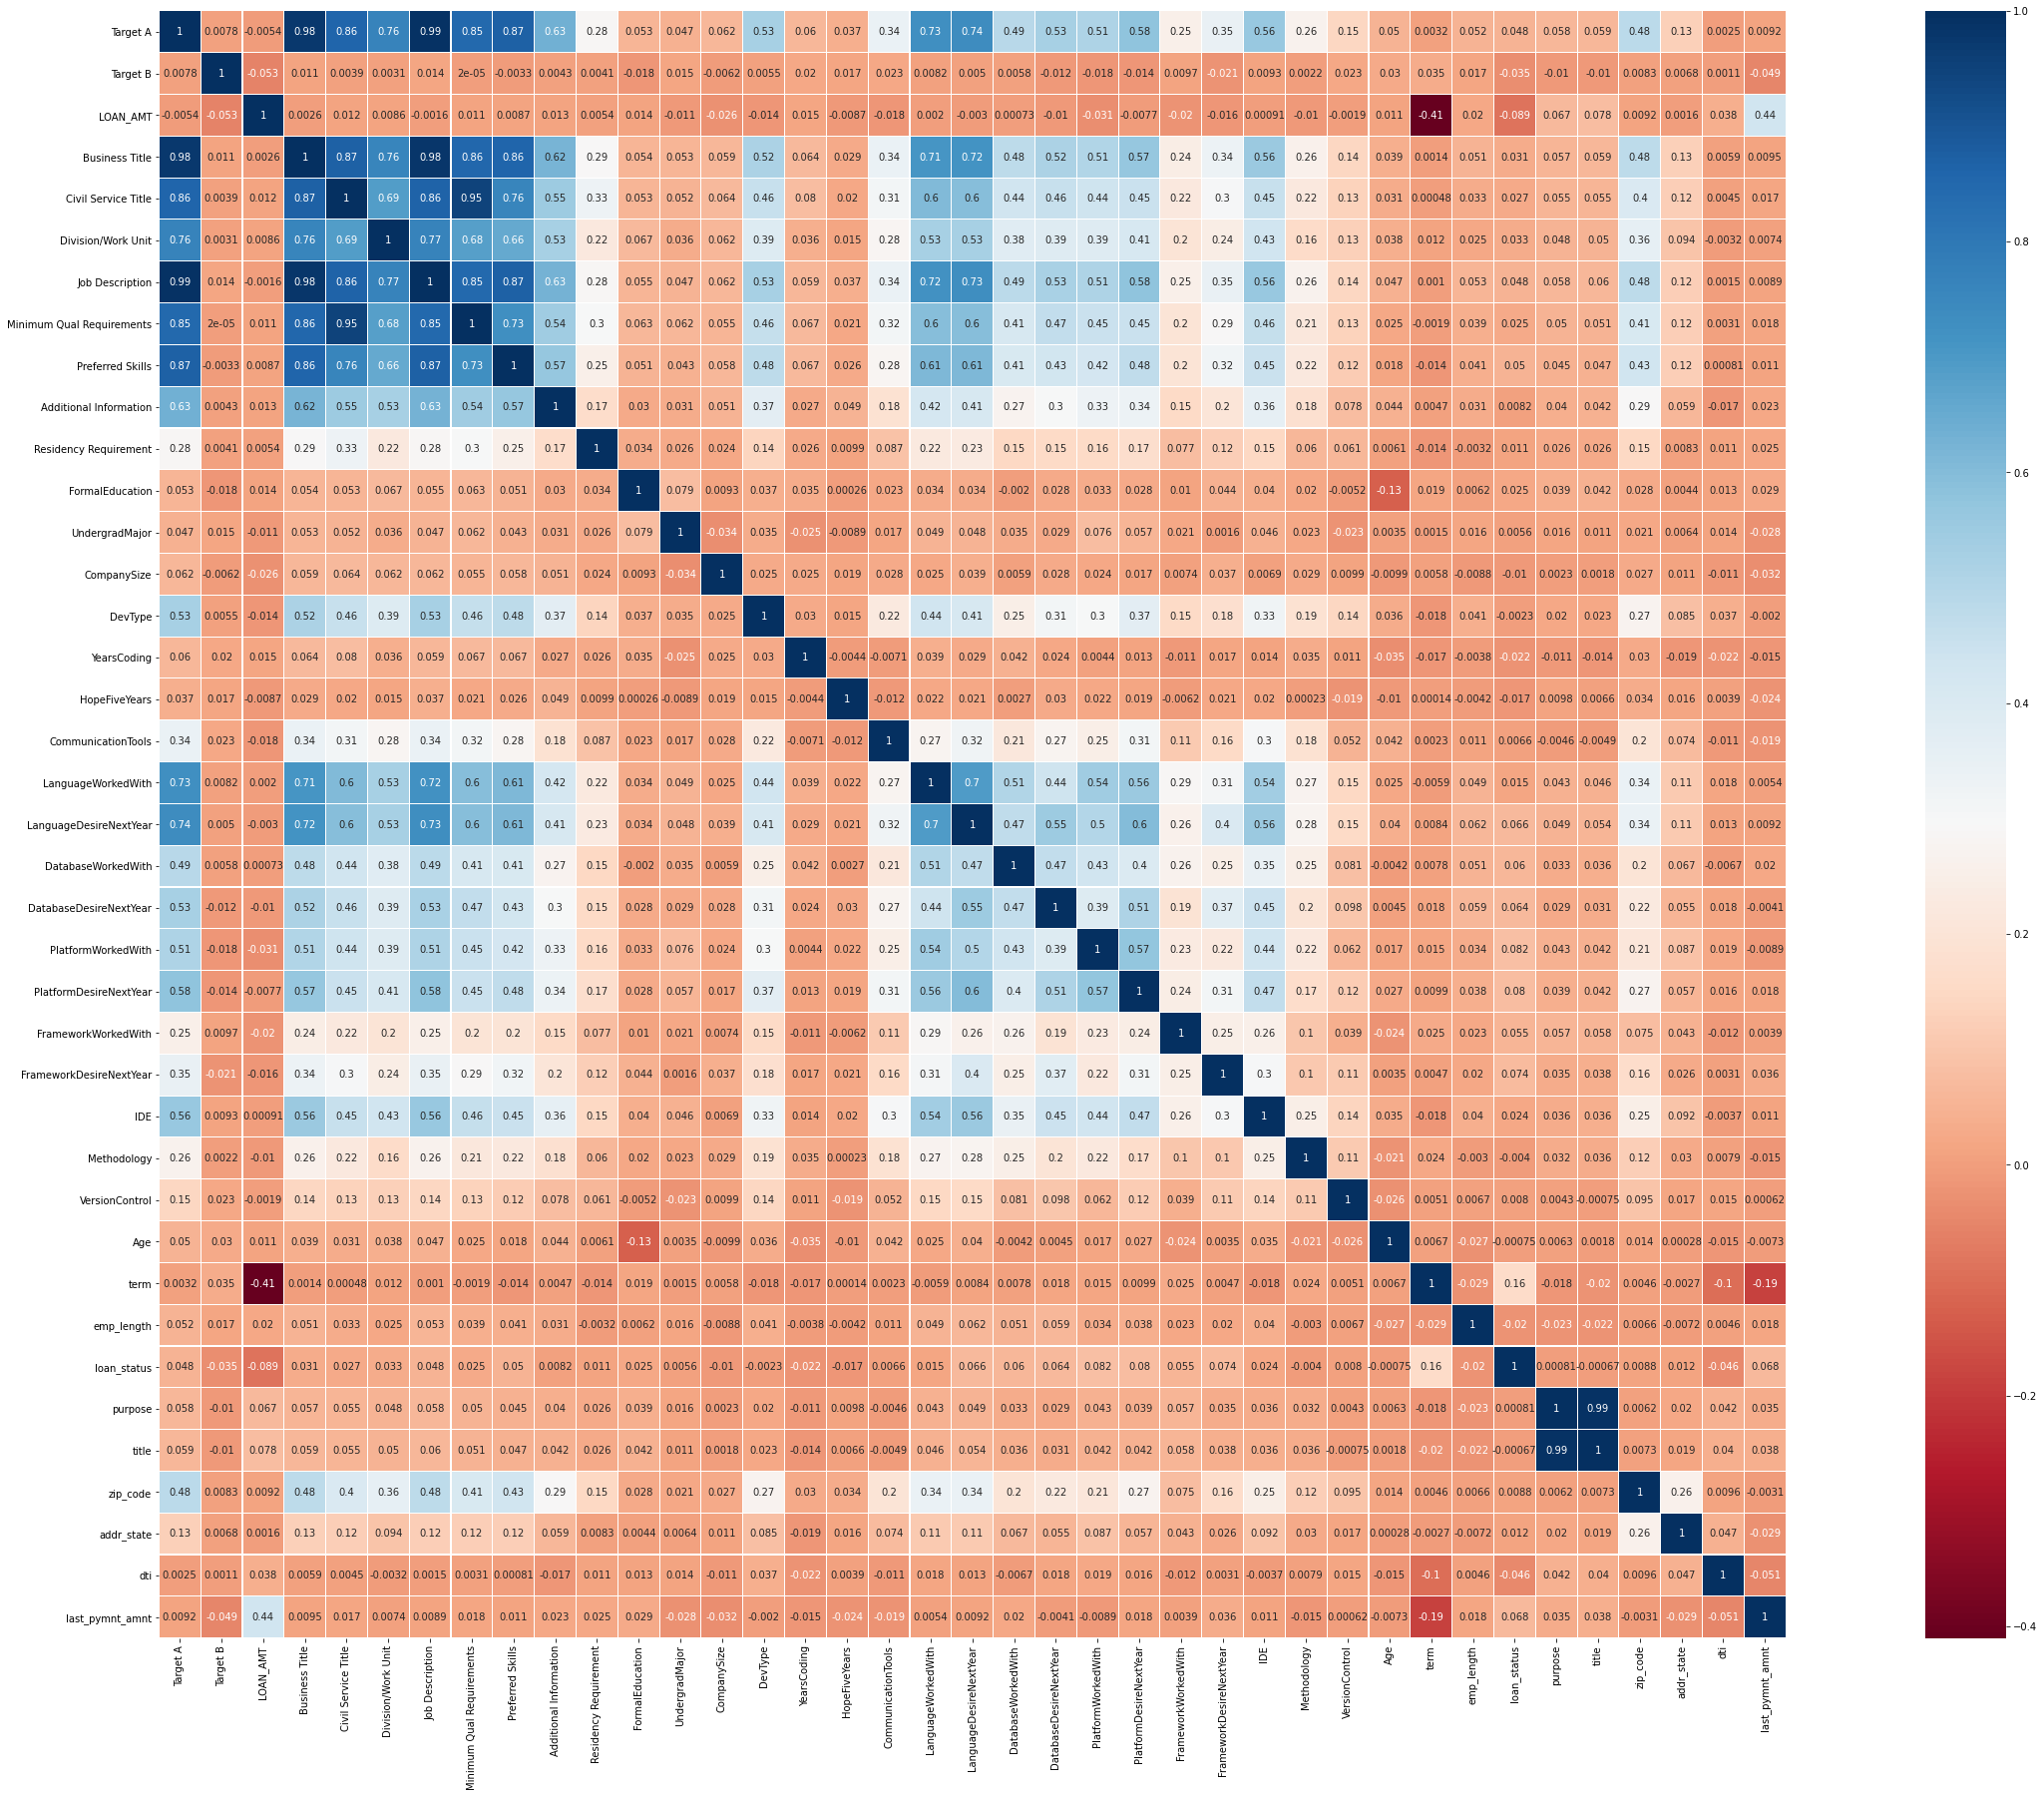

In [1001]:
import seaborn as sns
import matplotlib.pyplot as plt
colormap = plt.cm.RdBu
plt.figure(figsize=(50,30))
sns.heatmap(df.corr(),linewidths=0.1,square=True, cmap=colormap, linecolor='white', annot=True)

In [1002]:
df.columns

Index(['Target A', 'Target B', 'LOAN_AMT', 'Business Title',
       'Civil Service Title', 'Division/Work Unit', 'Job Description',
       'Minimum Qual Requirements', 'Preferred Skills',
       'Additional Information', 'Residency Requirement', 'FormalEducation',
       'UndergradMajor', 'CompanySize', 'DevType', 'YearsCoding',
       'HopeFiveYears', 'CommunicationTools', 'LanguageWorkedWith',
       'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'FrameworkWorkedWith',
       'FrameworkDesireNextYear', 'IDE', 'Methodology', 'VersionControl',
       'Age', 'term', 'emp_length', 'loan_status', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'last_pymnt_amnt'],
      dtype='object')

In [1003]:
x=df.drop(['Target A', 'Target B'], axis = 1)
y=df['Target A']
x.shape, y.shape

((2946, 37), (2946,))

In [1004]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.20, random_state = 120)

In [1005]:
from sklearn.ensemble import RandomForestRegressor
clf=RandomForestRegressor(n_estimators=200, criterion='mse', random_state=200)
clf.fit(x_train, y_train)
y_pred= clf.predict(x_test)

In [1006]:
from sklearn.metrics import r2_score, mean_squared_error
r2_score(y_test, y_pred)

0.9940528948913394

In [1007]:
from math import sqrt
rmse = sqrt(mean_squared_error(y_test,  y_pred))
rmse

2038.7599548418036